# Построение ML-продукта для оптимизации классификации заявок на оплату для сервиса Repetit.ru

Игорь Жуков, @Igor_A_Zhukov

# Описание задачи

- Сервис **Repetit.ru** работает с большим количеством заявок от клиентов с данными о предмете, желаемой стоимости, возрасте ученика, целью занятий и тд. К сожалению, 7 из 8 не доходят до оплаты, при этом обработка заявки консультантом увеличивает конверсию в оплату на 30%.
Проблема в том, что консультантов не хватает на все заявки и получается, что чем больше заявок — тем меньше конверсия из заявки в оплату и консультанты тратят время на бесперспективные заявки.

**Задача:**

- Разработать модель, которая по имеющейся информации о клиенте и заявке будет предсказывать вероятность оплаты заявки клиентом. Заказчик хочет понять, какие заявки будут оплачены, а какие нет, чтобы одни обрабатывать вручную консультантами, а другие нет.

**Метрика:**

- Оценка качества модели будет производиться с использованием `precision` и `ROC-AUC`.

**Описание исходных данных**



***Заявки*** (orders.feather)

- `order_date` - дата создания
- `subject_id` - предмет
- `purpose` - цель занятий
- `lesson_price` - цена
- `lesson_duration` - желаемая проодолжительность урока
- `home_metro_id` - ближайшее метро
- `add_info` - доп инфо
- `start_date`
- `working_teacher_id`
- `status_id` - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки) - **целевой признак**
- `comments`   
- `amount_to_pay`
- `planned_lesson_number` - клиент планирует N занятий
- `first_lesson_date` - дата 1 занятия
- `coef` - коэффициент
- `creator_id` - кто создал заявку (id сотрудника или клиента)
- `pupil_category_new_id` - возраст ученика
- `lessons_per_week` - занятий а неделю
- `minimal_price`
- `teacher_sex` - пол репетитора
- `teacher_experience_from` - опыт репетитора от
- `teacher_experience_to`- опыт репетитора до
- `lesson_place_new` - онлайн, у ученика, у учителя
- `pupil_knowledgelvl` -уровень знаний ученика
- `teacher_age_from` - желаемый возраст репеитора от
- `teacher_age_to` - желаемый возраст репеитора от
- `chosen_teachers_only` - не предлагать репетиторов кроме выбранных самостоятельно
- `no_teachers_available` - на заявку нет подходящих репов
- `source_id` - где создана заявка (какая часть сайта, не регион)
- `original_order_id` - дублем какой заявки является эта заявка
- `client_id` - айди клиента
- `additional_status_id` - **похоже как раз отметка, что есть оплата!**
- `max_metro_distance` - максимально готов ехать от метро
- `estimated_fee` - **похоже, расчетная сумма к оплате, когда уже известна, что оплата будет**
- `payment_date`
- `test_group` - аб тесты
- `is_display_to_teachers` - хочет ли клиент получать отклики репетиторов
  
***Репетиторы*** (teacher_info.feather)
- `date_update`
- `reg_date`
- `birth_date`
- `teaching_start_date`
- `user_id` - айди
- `is_email_confirmed`
- `is_home_lessons`
- `is_external_lessons`
- `external_comments`
- `lesson_duration` - продолжит урока
- `lesson_cost` - стоимость урока
- `status_id`
- `status_relevant_date`
- `status_school_id`
- `status_college_id`
- `status_display`
- `russian_level_id`
- `home_country_id`
- `education`
- `information`
- `is_confirmed`
- `is_display` - показывается в каталоге
- `rating_id`
- `rating` - рейтинг
- `comments`
- `rules_confirmed_date`
- `last_visited` - послеждний визит
- `is_pupils_needed` - открыт для заявок
- `is_cell_phone_confirmed`
- `effective_rating` - какой-то еще рейтинг
- `area_id`
- `registrar_id`
- `pupil_needed_date`
- `sex`
- `amount_to_pay` - долг
- `is_remote_lessons`
- `remote_comments`
- `show_on_map`
- `send_mailing`
- `send_suitable_orders`
- `rating_for_users` - рейтинг 2
- `rating_for_admin` - рейтинг 3
- `passport_id`
- `is_edited`
- `orders_allowed` - разрешено назначать на заявки
- `display_days`
- `verification_status_id`
- `is_individual`
- `partner_id`
- `star_rating` - рейтинг 4
- `rating_for_users_yesterday` - рейтинг вчера
- `review_num` - отзывы
- `relevance_date`
- `is_display_at_partners`
- `video_presentation_id` - есть видеопрезентация
- `status_institution_id`
- `Free_time_relevance_date`

**Подходящие по фильтру репетиторы** (suitable_teachers.feather)
- `tteacher_id` - id репетитора
- `order_id` - id заявки
- `contact_result`    
- `enable_auto_assign` - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)
- `enable_assign` - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)
    
**Желаемые репетиторы** (prefered_teachers_order_id.feather)
Репетиторы, которых клиент выбрал клиент
- `tteacher_id` - id репетитора
- `order_id` - id заявки


# План действий:
- загрузка данных
- первичный анализ данных
- обработка аномалий и пропусков
- отбор признаков для дальнейшего использования
- создание синтетических признаков и целевого признака
- удаление дубликатов заявок
- разделение выборки на обучающую и тестовую по **хронологическому** принципу - в тесте новые заявки

- изучение дисбаланса
- изучение распределения признаков в зависимости от значения целевого признака
- изучение корреляции
- изучение мультиколлинеарности


- построение пайплайна для линейной модели:
    - борьба с дисбалансом;
    - кодирование признаков;
    - подбор гиперпараметров методом кросс-валидации.


- построение пайплайна для классической ансамблевой модели:
    - борьба с дисбалансом;
    - кодирование признаков;
    - подбор гиперпараметров методом кросс-валидации.
    
- построение пайплайна для ансамблевой модели, использующей метод градиентного бустинга:
    - борьба с дисбалансом;
    - подбор гиперпараметров методом кросс-валидации.

    
- сравнение метрик моделей
- выбор модели
- изучение важности признаков для лучшей модели


- тестирование качества прогнозирования лучшей модели на тестовой выборке
- проверка модели на адекватность на тестовой выборке
- подробный анализ метрик, в т.ч. матрицы ошибок, F-меры, безошибочности, точности и охвата


- отчет и рекомендации

## Загрузим необходимые библиотеки и осуществим настройки вывода

### Установим свежие версии библиотек

### Загрузим библиотеки

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pyarrow.feather as feather

import re
import os
import phik
import joblib

from sklearn.preprocessing import (OneHotEncoder,
                                    OrdinalEncoder,
                                   StandardScaler,
                                   RobustScaler)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay


from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier

from sklearn.compose import (make_column_selector,
                             make_column_transformer,
                             ColumnTransformer)


from sklearn.model_selection import (train_test_split,
                                     GridSearchCV, 
                                    TimeSeriesSplit)

from sklearn.metrics import (classification_report,
                             roc_auc_score,
                             f1_score,
                             accuracy_score,
                             roc_curve,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

from imblearn.over_sampling import SMOTE, SMOTENC

from imblearn.pipeline import Pipeline, make_pipeline

### Настроим вывод данных на экран

In [120]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

### Определим значения констант

In [121]:
RANDOM_STATE = 53

## Загрузим и изучим данные

### Объявим функцию загрузки
с проверкой загрузки, заданием индекса и приведением наименований столбцов к общепринятому виду

In [122]:
def loader(path):
    loaded_data=[]
    if os.path.exists(path):
        loaded_data = pd.read_feather(path)#, index_col=[0])
        print('Загружен файл: ', path)
        loaded_data.columns = [re.sub(r'(?<!^)(?=[A-Z])',
                '_', i).lower() for i in loaded_data.columns]
    else:
        print('Проверьте путь')

    return loaded_data

#### Загрузим данные

In [123]:
path1 = '/home/beerbear/Projects/Teacher_payment_prediction/datasets/orders.feather'
path2 = '/home/beerbear/Projects/Teacher_payment_prediction/datasets/prefered_teachers_order_id.feather'
path3 = '/home/beerbear/Projects/Teacher_payment_prediction/datasets/suitable_teachers.feather'
path4 = '/home/beerbear/Projects/Teacher_payment_prediction/datasets/teachers_info.feather'

In [124]:
data = loader(path1)
prefered_teachers = loader(path2)
suitable_teachers = loader(path3)
teachers_info = loader(path4)

Загружен файл:  /home/beerbear/Projects/Teacher_payment_prediction/datasets/orders.feather
Загружен файл:  /home/beerbear/Projects/Teacher_payment_prediction/datasets/prefered_teachers_order_id.feather
Загружен файл:  /home/beerbear/Projects/Teacher_payment_prediction/datasets/suitable_teachers.feather
Загружен файл:  /home/beerbear/Projects/Teacher_payment_prediction/datasets/teachers_info.feather


### Объявим функцию description для первичного исследования данных

In [125]:
def description(data):

    print('\033[1m \nОбщая информация: \n\033[0m \n')
    data.info()
    display(data.head(2))

    print('\n\033[1m Количество дубликатов: \033[0m', data.duplicated().sum())
    print('\033[1m Пропущенных значений: \033[0m', data.isna().sum().sum())
    print('\033[1m Уникальных индексов: \033[0m', data.index.nunique())
    print('\n\033[1m  Статистические характеристики датасета: \033[0m')

    display(data.describe(include = 'all').T)

    print('\033[1m \nИзучим 5 минимальных и 5 максимальных значений каждого столбца: \033[0m \n')
    for column in data.columns:
        try:
            print(column)
            print(sorted(data[data[column].notna()][column].unique())[0:5], '.....',
                  sorted(data[data[column].notna()][column].unique())[-5:-1],
                  sorted(data[data[column].notna()][column].unique())[-1], '\n')
        except:
            print('столбец', column, 'не может быть показан')


## Изучим имеющиеся данные

### Изучим датасет `data`

In [126]:
description(data)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_teacher_id

id               order_date  subject_id purpose  lesson_price  \
0  2294054  2022-11-01 00:01:38.237         1.0    None             0   
1  2294055  2022-11-01 00:03:11.753         1.0    None             0   

   lesson_duration lesson_place  home_metro_id add_info start_date  \
0               60         None            NaN     None       None   
1               60         None            NaN     None       None   

   working_teacher_id  status_id  \
0                 NaN         16   
1                 NaN          7   

                                                                        comments  \
0                                                                           None   
1  \n01.11.2022 11:46 - "Заявка прикреплена к заявке № 2294000" (Алешина Марина)   

   prefered_teacher_id amount_to_pay  planned_lesson_number first_lesson_date  \
0                  NaN             0                      0              None   
1                  NaN             0                      0              None   

   creator_id  pupil_category_new_id  lessons_per_week  minimal_price  \
0         NaN                    NaN                 0              0   
1         NaN                    NaN                 0              0   

   teacher_sex  teacher_experience_from  teacher_experience_to  \
0            3                        0                      0   
1            3                        0                      0   

   lesson_place_new  pupil_knowledgelvl  teacher_age_from  teacher_age_to  \
0                 0                   0                 0               0   
1                 0                   0                 0               0   

   chosen_teachers_only  no_teachers_available  source_id  original_order_id  \
0                     0                      0         18          2294000.0   
1                     0                      0         18          2294000.0   

   client_id  additional_status_id  max_metro_distance estimated_fee  \
0     675960                   7.0                 NaN          None   
1     675960                   7.0                 NaN          None   

  payment_date  is_display_to_teachers  
0         None                       1  
1         None                       1


 Количество дубликатов:  900
 Пропущенных значений:  10320506
 Уникальных индексов:  437217

  Статистические характеристики датасета: 


count   unique  \
id                       1191861.0      NaN   
order_date                 1191861  1190749   
subject_id               1181529.0      NaN   
purpose                    1025351   294447   
lesson_price             1191861.0      NaN   
lesson_duration          1191861.0      NaN   
lesson_place                    31        4   
home_metro_id             642447.0      NaN   
add_info                   1044688   609437   
start_date                  705578   705033   
working_teacher_id        705988.0      NaN   
status_id                1191861.0      NaN   
comments                    341468    93505   
prefered_teacher_id            4.0      NaN   
amount_to_pay              1191861     1415   
planned_lesson_number    1191861.0      NaN   
first_lesson_date           166571      818   
creator_id                579698.0      NaN   
pupil_category_new_id    1032470.0      NaN   
lessons_per_week         1191861.0      NaN   
minimal_price            1191861.0      NaN   
teacher_sex              1191861.0      NaN   
teacher_experience_from  1191861.0      NaN   
teacher_experience_to    1191861.0      NaN   
lesson_place_new         1191861.0      NaN   
pupil_knowledgelvl       1191861.0      NaN   
teacher_age_from         1191861.0      NaN   
teacher_age_to           1191861.0      NaN   
chosen_teachers_only     1191861.0      NaN   
no_teachers_available    1191861.0      NaN   
source_id                1191861.0      NaN   
original_order_id         582588.0      NaN   
client_id                1191861.0      NaN   
additional_status_id     1042385.0      NaN   
max_metro_distance         13518.0      NaN   
estimated_fee               747152     1593   
payment_date                129665   124285   
is_display_to_teachers   1191861.0      NaN   

                                                                                                                                              top  \
id                                                                                                                                            NaN   
order_date                                                                                                                2021-09-16 03:58:15.883   
subject_id                                                                                                                                    NaN   
purpose                  Разделы:  школьный курс.\nДополнения: ОГЭ (ГИА).\nКатегория ученика: школьник 9 класса.\nЦель занятий: подготовка к ОГЭ.   
lesson_price                                                                                                                                  NaN   
lesson_duration                                                                                                                               NaN   
lesson_place                                                                                                                            у ученика   
home_metro_id                                                                                                                                 NaN   
add_info                                            Количество занятий в неделю: 1-2.\nВозраст репетитора: не важно.\nПол репетитора: Не важно.\n   
start_date                                                                                                                2023-01-07 20:00:43.073   
working_teacher_id                                                                                                                            NaN   
status_id                                                                                                                                     NaN   
comments                                                                                                             Тестовая группа : SplitTestB   
prefered_teacher_id                                                                                          

 
Изучим 5 минимальных и 5 максимальных значений каждого столбца:  

id
[1742636, 1742637, 1742638, 1742639, 1742640] ..... [2936684, 2936685, 3211265, 3342337] 3605505 

order_date
['0029-07-18 05:28:02.684', '0042-01-12 04:26:08.039', '0042-01-12 05:09:05.007', '2021-09-01 00:12:16.713', '2021-09-01 00:16:46.867'] ..... ['2023-11-05 23:58:07.547', '2023-11-05 23:58:26.597', '2023-11-05 23:58:31.963', '2023-11-05 23:59:09.900'] 2023-11-05 23:59:45.687 

subject_id
[1.0, 2.0, 3.0, 4.0, 5.0] ..... [33.0, 36.0, 3211265.0, 3342337.0] 3605505.0 

purpose
['\n\n\u200bКатегория ученика : Взрослый\u200a', '\n\n\u200bКатегория ученика : Взрослый\u200a\n\u200bРазделы : инвестиции\u200a', '\n\n\u200bКатегория ученика : школьники 6 класса\u200a', '\n\n\u200bКатегория ученика : школьники 9 класса\u200a', '\nМесто проведения занятий: у ученика (улица Ясеневая, 31 корпус 2). В перспективе возможны занятия удалённо. \nПредполагаемое число занятий два раза в неделю в выходные в любое время, будни дни 

[-110, -65, -60, -50, -10] ..... [25000, 99999, 3211265, 3342337] 3605505 

chosen_teachers_only
[0, 1] ..... [0] 1 

no_teachers_available
[0, 1] ..... [0] 1 

source_id
[0, 2, 3, 4, 5] ..... [25, 26, 3211265, 3342337] 3605505 

original_order_id
[263.0, 19367.0, 113952.0, 134851.0, 138178.0] ..... [2937205.0, 2938030.0, 3211265.0, 3342337.0] 3605505.0 

client_id
[1, 2021, 72451, 115368, 155290] ..... [1268631, 1268632, 3211265, 3342337] 3605505 

additional_status_id
[1.0, 2.0, 3.0, 4.0, 5.0] ..... [24.0, 25.0, 3211265.0, 3342337.0] 3605505.0 

max_metro_distance
[0.0, 1.0, 2.0, 3.0, 5.0] ..... [3000.0, 3211265.0, 3342337.0, 3605505.0] 5000000.0 

estimated_fee
['0', '100', '1000', '10000', '1005'] ..... ['995', '997,5', '9975', '999'] 9998 

payment_date
['0029-07-18 05:28:02.684', '0042-01-12 04:26:08.039', '0042-01-12 05:09:05.007', '2020-11-07 20:29:48.167', '2020-11-14 19:22:48.530'] ..... ['2023-11-07 20:28:42.993', '2023-11-07 20:32:39.500', '2023-11-07 20:33:25.767', '2023-1

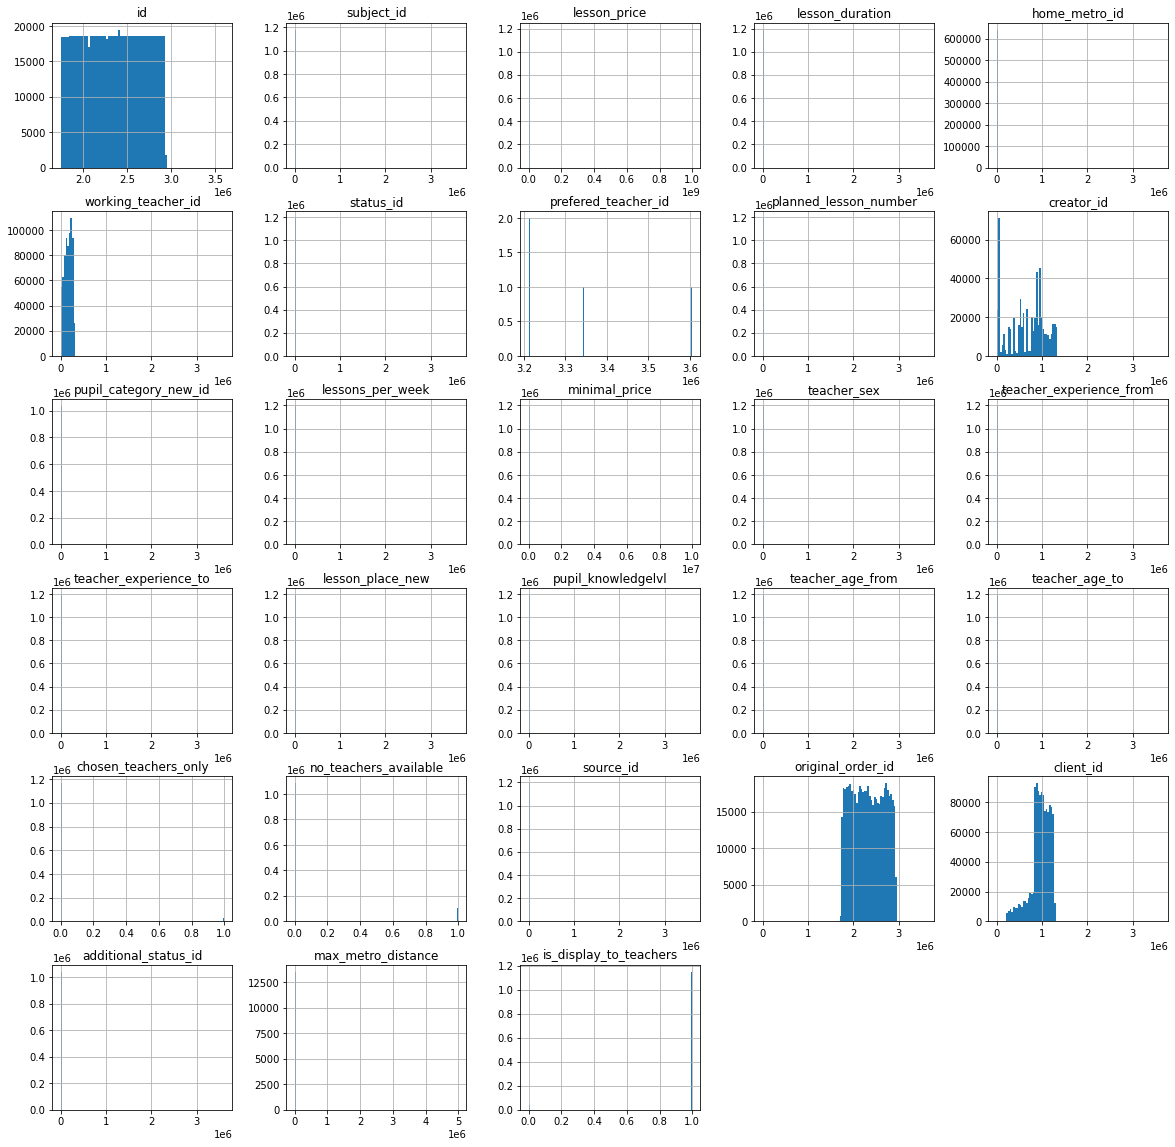

In [127]:
data.hist(figsize = (20, 20), bins = 100);

#### Проверим дубликаты в идентификаторах заявок

In [128]:
data.drop_duplicates()['id'].duplicated().sum()

0

#### В столбцах с датами имеется три нестандартных значения даты, изучим строки с этими значениями

In [129]:
data[(data['order_date'] == '0029-07-18 05:28:02.684') |
        (data['order_date'] == '0042-01-12 04:26:08.039') |
        (data['order_date'] == '0042-01-12 05:09:05.007')]

id               order_date  subject_id purpose  lesson_price  \
105390  3211265  0042-01-12 05:09:05.007   3211265.0    None       3211265   
109392  3342337  0042-01-12 04:26:08.039   3342337.0    None       3342337   
79972   3211265  0042-01-12 05:09:05.007   3211265.0    None       3211265   
437216  3605505  0029-07-18 05:28:02.684   3605505.0    None       3605505   

        lesson_duration lesson_place  home_metro_id add_info  \
105390          3211265         None      3211265.0     None   
109392          3342337         None      3342337.0     None   
79972           3211265         None      3211265.0     None   
437216          3605505         None      3605505.0     None   

                     start_date  working_teacher_id  status_id comments  \
105390  0042-01-12 05:09:05.007           3211265.0    3211265     None   
109392  0042-01-12 04:26:08.039           3342337.0    3342337     None   
79972   0042-01-12 05:09:05.007           3211265.0    3211265     None   
437216  0029-07-18 05:28:02.684           3605505.0    3605505     None   

        prefered_teacher_id           amount_to_pay  planned_lesson_number  \
105390            3211265.0  8,344264636103745E-308                3211265   
109392            3342337.0  8,344239172283769E-308                3342337   
79972             3211265.0  8,344264636103745E-308                3211265   
437216            3605505.0  4,450342944189884E-308                3605505   

              first_lesson_date  creator_id  pupil_category_new_id  \
105390  0042-01-12 05:09:05.007   3211265.0              3211265.0   
109392  0042-01-12 04:26:08.039   3342337.0              3342337.0   
79972   0042-01-12 05:09:05.007   3211265.0              3211265.0   
437216  0029-07-18 05:28:02.684   3605505.0              3605505.0   

        lessons_per_week  minimal_price  teacher_sex  teacher_experience_from  \
105390           3211265        3211265      3211265                  3211265   
109392           3342337        3342337      3342337                  3342337   
79972            3211265        3211265      3211265                  3211265   
437216           3605505        3605505      3605505                  3605505   

        teacher_experience_to  lesson_place_new  pupil_knowledgelvl  \
105390                3211265           3211265             3211265   
109392                3342337           3342337             3342337   
79972                 3211265           3211265             3211265   
437216                3605505           3605505             3605505   

        teacher_age_from  teacher_age_to  chosen_teachers_only  \
105390           3211265         3211265                     1   
109392           3342337         3342337                     1   
79972            3211265         3211265                     1   
437216           3605505         3605505                     1   

        no_teachers_available  source_id  original_order_id  client_id  \
105390                      1    3211265          3211265.0    3211265   
109392                      1    3342337          3342337.0    3342337   
79972                       1    3211265          3211265.0    3211265   
437216                      1    3605505          3605505.0    3605505   

        additional_status_id  max_metro_distance           estimated_fee  \
105390             3211265.0           3211265.0  8,344264636103745E-308   
109392             3342337.0           3342337.0  8,344239172283769E-308   
79972              3211265.0           3211265.0  8,344264636103745E-308   
437216             3605505.0           3605505.0  4,450342944189884E-308   

                   payment_date  is_display_to_teachers  
105390  0042-01-12 05:09:05.007                       1  
109392  0042-01-12 04:26:08.039                       1  
79972   0042-01-12 05:09:05.007                       1  
437216  0029-07-18 05:28:02.684                       1

#### Выводы по результатам предварительного изучения данных датасета `data`, содержащего информацию о заявках на обучение

- в датасете **1 191 861** строк, **38** столбцов
- уникальных индексов всего **437 217**, а строк **1 191 861**, требуется изучение и обработка
- огромное количество **пропусков данных**, требуется обработка
- **900** полных **дубликатов**, **удалим** их
- в **идентификаторах заявок** дубликаты отсутствуют, все заявки **уникальны**
- столбцы `order_date`, `start_date`, `first_lesson_date`, `payment_date` имеют тип `object`, нужно привести к типу `datetime`
- столбцы `max_metro_distance`, `lesson_price` и `minimal_price` содержат невозможные максимальные значения, требуется изучение и обработка
- столбцы `teacher_age_from` `teacher_age_to` содержат **невозможные минимальные и максимальные значения**
- имеется **4** строки с неверными значениями дат, в остальных столбцах этих строк находятся значения `3211265`, `3342337` и `3605505`, **удалим** их
- строки с неверными значениями даты содержат неверные значения и в других признаках, **удалим их**
- в признаках `max_metro_distance`, `lesson_place`, `prefered_teacher_id` слишком мало значений, **удалим** их
- столбец `original_order_id` содержит **невозможные** значения, например `263.0`, нужно изучить и обработать
- столбец `estimated_fee` имеет пропуски данных и из-за этого неверный тип `object` вместо `int64`
- столбец `teacher_sex` содержит 7 уникальных значений вместо двух
- столбцы `max_metro_distance`, `subject_id`, `home_metro_id`, `additional_status_id`, `original_order_id`, `creator_id`, `pupil_category_new_id`, `prefered_teacher_id`, `working_teacher_id` имеют неверный тип `float32`, видимо из-за пропущеных данных


- признаки `lesson_price`, `lesson_duration`, `amount_to_pay`, `planned_lesson_number`, `lessons_per_week`,`minimal_price`, `teacher_experience_from`, `teacher_experience_to`, `teacher_age_from`, `teacher_age_to`, `max_metro_distance`, `order_date`, `start_date`, `first_lesson_date`, `payment_date` - **количественные**, остальные **категориальные**


##### Выводы по результатам анализа сущности признаков

- столбец `status_id` содержит информацию для создания **целевого признака**
- столбцы `additional_status_id`, `amount_to_pay`, `client_id`, `estimated_fee`, `first_lesson_date`, `payment_date`, `start_date`, `working_teacher_id`, `comments` содержат информацию, которая дает **утечку** целевого признака, требуется их **удалить** до обучения модели
- признаки `id`, `creator_id`, `working_teacher_id`, `original_order_id`, `prefered_teacher_id` можно **использовать для соединения** с другими таблицами и создания синтетических признаков, а потом **удалить**
- признаки `purpose` и `add_info` содержат текстовые комментарии, нужно изучить на предмет создания **синтетических** признаков за счет текстового анализа

- значение `0` не используется в числовых категориальных переменных: можно **заполнить** пропуски значением `0`
- пропуски в текстовых переменных можно **заполнить** значением `unknown`

### Выделим из датасета `data` тестовый датасет по `хронологическому` принципу до обработки данных и создания признаков для чистоты эксперимента. Модель увидит тестовые данные в первый раз и в необработанном виде

#### Отсортируем датасет по возрастанию номера заявки `id`, так как по информации от заказчика номера присваиваются в `хронологическом` порядке

In [130]:
data = data.sort_values(by = 'id', ascending = True).reset_index(drop = True)

In [131]:
data.tail(2)

id               order_date  subject_id purpose  lesson_price  \
1191859  3342337  0042-01-12 04:26:08.039   3342337.0    None       3342337   
1191860  3605505  0029-07-18 05:28:02.684   3605505.0    None       3605505   

         lesson_duration lesson_place  home_metro_id add_info  \
1191859          3342337         None      3342337.0     None   
1191860          3605505         None      3605505.0     None   

                      start_date  working_teacher_id  status_id comments  \
1191859  0042-01-12 04:26:08.039           3342337.0    3342337     None   
1191860  0029-07-18 05:28:02.684           3605505.0    3605505     None   

         prefered_teacher_id           amount_to_pay  planned_lesson_number  \
1191859            3342337.0  8,344239172283769E-308                3342337   
1191860            3605505.0  4,450342944189884E-308                3605505   

               first_lesson_date  creator_id  pupil_category_new_id  \
1191859  0042-01-12 04:26:08.039   3342337.0              3342337.0   
1191860  0029-07-18 05:28:02.684   3605505.0              3605505.0   

         lessons_per_week  minimal_price  teacher_sex  \
1191859           3342337        3342337      3342337   
1191860           3605505        3605505      3605505   

         teacher_experience_from  teacher_experience_to  lesson_place_new  \
1191859                  3342337                3342337           3342337   
1191860                  3605505                3605505           3605505   

         pupil_knowledgelvl  teacher_age_from  teacher_age_to  \
1191859             3342337           3342337         3342337   
1191860             3605505           3605505         3605505   

         chosen_teachers_only  no_teachers_available  source_id  \
1191859                     1                      1    3342337   
1191860                     1                      1    3605505   

         original_order_id  client_id  additional_status_id  \
1191859          3342337.0    3342337             3342337.0   
1191860          3605505.0    3605505             3605505.0   

         max_metro_distance           estimated_fee             payment_date  \
1191859           3342337.0  8,344239172283769E-308  0042-01-12 04:26:08.039   
1191860           3605505.0  4,450342944189884E-308  0029-07-18 05:28:02.684   

         is_display_to_teachers  
1191859                       1  
1191860                       1

#### Определим подходящую заявку для  выделения 25% выборки для тестовой выборки (самые новые заявки) - заявка должна быть первичная


In [132]:
split_index = int(round(len(data)*0.75, 0))
split_index

893896

In [133]:
round(len(data[split_index: -1])/len(data), 2)

0.25

In [134]:
data.loc[split_index, 'original_order_id']

nan

- в столбце `original_order_id` пропуск, значит заявка `первичная`, можно сделать разделение по этому индексу

In [135]:
test_data = data[split_index: -1]

In [136]:
test_data['id'].head(1)

893896    2638721
Name: id, dtype: int32

In [137]:
train_data = data[0: split_index]
train_data['id'].tail(1)

893895    2638720
Name: id, dtype: int32

In [138]:
print(round(len(train_data)/(len(train_data)+len(test_data)), 2))

0.75


- датасет `data` разделен на **обучающую** и **тестовую** выборки в пропорции 75%/25% в `хронологическом` порядке - все заявки тестовой выборке **новее** заявок обучающей

### Обработаем датасет `data`

##### Объявим функцию для предобработки датасета, которая выполнит следующие действия:
- удалит лишние столбцы
- удалит дубликаты
- восстановит индекс
- приведет столбец с датами к формату `datetime`
- заполнит пропуски данных
- приведет столбцы с целочисленными значениями к типу `Int64`
- ограничит максимальную стоимость урока и всех уроков суммой 10000 руб.
- приведет возраст учителей в диапазон от 16 до 90 лет

In [139]:
def preprocessing(data):


    ##### Удалим дубликаты и восстановим индекс

    data = data.drop_duplicates().reset_index(drop = True)

    ##### Удалим лишние столбцы

    col_to_keep = [
     'add_info', # сделаем признаки
     #'additional_status_id', - утечка целевого признака
     #'amount_to_pay', - утечка целевого признака
     'chosen_teachers_only',
     #'client_id', #- утечка целевого признака
     #'comments', #- утечка целевого признака
     #'creator_id', #- утечка целевого признака,
     #'estimated_fee', - - утечка целевого признака
     #'first_lesson_date', - утечка целевого признака
     'home_metro_id',
     'id', # - пока нужен для слияния
     'is_display_to_teachers',
     'lesson_duration',
     #'lesson_place', - пустой
     'lesson_place_new',
     'lesson_price',
     'lessons_per_week',
     #'max_metro_distance', - слишком мало значений
     'minimal_price',
     'no_teachers_available',
     'order_date',
     'original_order_id', # пока нужен для слияния
     # 'payment_date', - утечка целевого признака
     'planned_lesson_number',
     #'prefered_teacher_id', - пустой
     'pupil_category_new_id',
     'pupil_knowledgelvl',
     'purpose', # сделаем признаки
     'source_id',
     #'start_date', - утечка целевого признака
     'status_id', # - целевой признак равен значениям 5,6,13,15 !!!, потом удалим
     'subject_id',
     'teacher_age_from',
     'teacher_age_to',
     'teacher_experience_from',
     'teacher_experience_to',
     'teacher_sex',
     'working_teacher_id' #- утечка целевого признака, но нужен для создания рейтинга учителей, потом удалим
    ]
    data = data[col_to_keep]

    # Удалим строки с неверными данными

    data = data[(data['order_date'] != '0029-07-18 05:28:02.684') &
                (data['order_date'] != '0042-01-12 04:26:08.039') &
                (data['order_date'] != '0042-01-12 05:09:05.007')]
    
     #### Приведем столбцы с датами к типу `datetime`

    data['order_date'] = pd.to_datetime(data['order_date'],
                                        format='%Y-%m-%d %H:%M:%S.%f').dt.round('1 min')

    #### Заполним пропуски данных
        
    data[['add_info','purpose']] = data[['add_info','purpose']].fillna('unknown')
    data = data.fillna(0)

    #### Приведем столбцы с ошибочным типом `float64` к типу `int64`,
    # поскольку у нас все числа в датасете целые

    for column in data.columns:
        if data[column].dtype == 'float32':
            data[column]= data[column].astype('int64')

    # Ограничим стоимость уроков
    data.loc[data['lesson_price'] > 10000, 'lesson_price'] = 10000
    data.loc[data['minimal_price'] > 10000, 'minimal_price'] = 10000


    # Ограничим возраст учителей диапазоном 16 - 90 лет и уберем отрицательные значения
    data.loc[data['teacher_age_from'] < 0,
         'teacher_age_from'] = abs(data.loc[data['teacher_age_from'] < 0,
                                            'teacher_age_from'])

    data.loc[data['teacher_age_from'] < 16, 'teacher_age_from'] = 16
    data.loc[data['teacher_age_from'] > 90, 'teacher_age_from'] = 90

    data.loc[data['teacher_age_to'] < 0,
         'teacher_age_to'] = abs(data.loc[data['teacher_age_to'] < 0,
                                          'teacher_age_to'])

    data.loc[data['teacher_age_to'] < 16, 'teacher_age_to'] = 16
    data.loc[data['teacher_age_to'] > 90, 'teacher_age_to'] = 90

     # Удалим строки, в которых дубликат имеет номер основной заявки,
    #так как это ошибка по информации от заказчика
    data = data[data['id'] != data['original_order_id']]

    # Заполним нулевые (пропущенные) значения столбца `original_order_id` значениями столбца `id`
    data.loc[data['original_order_id'] == 0,
             'original_order_id'] = data.loc[data['original_order_id'] == 0, 'id']
       
    # Создадим из столбца `status_id` столбец целевого признака `payment`,
    # где 1 означает факт оплаты, а ноль - ее отсутствие
    
    payment_markers = [5, 6, 13, 15]
    data.loc[:,'payment'] = 0
    data.loc[data['status_id'].isin(payment_markers),'payment'] = 1
    data = data.drop('status_id', axis = 1)



    return data

##### Обработаем датасет `data`

In [140]:
train_data = preprocessing(train_data)

In [141]:
train_data.tail(2)

add_info  \
892995                                                                                                                                                                                                                                Желаемое время для занятий: понедельник - 13.\nКоличество занятий в неделю: 1-2.\nВозраст репетитора: не важно.\nПол репетитора: Женский.\n   
892996  Район: Новая деревня село.\nМесто проведения занятий: у преподавателя (Новая деревня село).\nПредполагаемое число занятий в неделю: 1-2, понедельник - 15; вторник - 15; среда - 15; четверг - 15; пятница - 15..\nОпыт репетитора: не имеет значения.\nВозраст репетитора: не имеет значения.\nПол репетитора: не имеет значения.\nСтатус репетитора: не имеет значения.   

        chosen_teachers_only  home_metro_id       id  is_display_to_teachers  \
892995                     0              0  2638719                       1   
892996                     0           2178  2638720                       1   

        lesson_duration  lesson_place_new  lesson_price  lessons_per_week  \
892995               60                 4           500                 3   
892996               60                 2           500                 3   

        minimal_price  no_teachers_available          order_date  \
892995              0                      0 2023-06-16 13:49:00   
892996              0                      1 2023-06-16 13:50:00   

        original_order_id  planned_lesson_number  pupil_category_new_id  \
892995            2638711                     10                     14   
892996            2638720                     10                     10   

        pupil_knowledgelvl  \
892995                   2   
892996                   0   

                                                                                                                                                                                                purpose  \
892995  Цели: преодолеть языковой барьер.\nДополнения: DELF.\nКатегория ученика: Студенты.\nУровень знаний: начальный.\nУровень экзамена: B1.\nДо экзамена осталось: Год и больше.\nКурс студента: 2.\n   
892996                                                                                                     Разделы: черчение.\nКатегория ученика: школьник 9 класса.\nЦель занятий: помощь по предмету.   

        source_id  subject_id  teacher_age_from  teacher_age_to  \
892995         23           4                16              16   
892996         23          21                16              16   

        teacher_experience_from  teacher_experience_to  teacher_sex  \
892995                        0                      0            2   
892996                        0                      0            3   

        working_teacher_id  payment  
892995                   0        0  
892996                   0        0

В основном датасете `data`, содержащем информацию о заявках:
- исправлен `индекс`
- **удалены** столбцы с данными, ведущими к утечке целевого признака
-  **удалены** строки с ошибочными данными
- формат столбца с датами **приведены** к `datetime`
- значения возраста **приведены** к диапазону от 16 до 90 лет
- числовые данные **приведены** к `целочисленному` типу
- **cоздан** столбец с **целевым** признаком `payment`, в котором 1 означает, что оплата произведена, и **удален** столбец `status_id`, из которого был сформирован целевой признак

### Изучим датасет `suitable_teachers`

In [142]:
description(suitable_teachers)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271186 entries, 0 to 20271185
Data columns (total 5 columns):
 #   Column              Dtype   
---  ------              -----   
 0   teacher_id          int32   
 1   order_id            int32   
 2   contact_result      category
 3   enable_auto_assign  int8    
 4   enable_assign       int8    
dtypes: category(1), int32(2), int8(2)
memory usage: 232.3 MB


teacher_id  order_id                                       contact_result  \
0       82583   1742711                                 Репетитор согласился   
1      125057   1742713  Репетитор положил трубку, либо обрыв связи (Oktell)   

   enable_auto_assign  enable_assign  
0                   1              1  
1                   0              0


 Количество дубликатов:  49
 Пропущенных значений:  12824362
 Уникальных индексов:  20271186

  Статистические характеристики датасета: 


count unique  top     freq            mean  \
teacher_id          20271186.0    NaN  NaN      NaN   157810.805305   
order_id            20271186.0    NaN  NaN      NaN  2500198.295852   
contact_result         7446824  10866    .  1846839             NaN   
enable_auto_assign  20271186.0    NaN  NaN      NaN        0.129108   
enable_assign       20271186.0    NaN  NaN      NaN        0.027548   

                              std        min        25%        50%        75%  \
teacher_id           80246.764911       33.0    95420.0   159595.0   224173.0   
order_id            333894.032159  1742638.0  2265722.0  2571756.0  2779002.0   
contact_result                NaN        NaN        NaN        NaN        NaN   
enable_auto_assign        0.33532        0.0        0.0        0.0        0.0   
enable_assign            0.163674        0.0        0.0        0.0        0.0   

                          max  
teacher_id           312661.0  
order_id            2946699.0  
contact_result            NaN  
enable_auto_assign        1.0  
enable_assign             1.0

 
Изучим 5 минимальных и 5 максимальных значений каждого столбца:  

teacher_id
[33, 51, 52, 86, 87] ..... [312587, 312609, 312613, 312623] 312661 

order_id
[1742638, 1742639, 1742650, 1742651, 1742654] ..... [2946695, 2946696, 2946697, 2946698] 2946699 

contact_result
['\nРепетитор оставил запрос : ', '\nРепетитор оставил запрос : \nРепетитор оставил запрос : \nРепетитор оставил запрос : Прошу уменьшить коэффициент', '\nРепетитор оставил запрос : Договорились о занятиях, но еще не определились со временем.Завтра сообщу о начале занятий. Спасибо.', '\nРепетитор оставил запрос : О занятии договорились на 8 октября с оплатой 1000 рублей за час.\r\n', '!'] ..... ['ёё', '№', '№1 анкета понравилась, кл пока не хочет контакты', '№2 анкета не понравилась'] №3 анкета отправлена,  кл еще не смотрела 

enable_auto_assign
[0, 1] ..... [0] 1 

enable_assign
[0, 1] ..... [0] 1 



In [143]:
suitable_teachers[suitable_teachers['order_id'].duplicated()].head(5)

teacher_id  order_id                                       contact_result  \
2      231211   1742713  Репетитор положил трубку, либо обрыв связи (Oktell)   
3      128773   1742713  Репетитор положил трубку, либо обрыв связи (Oktell)   
4       63019   1742713                                 Репетитор согласился   
6      155227   1742714                                                    ,   
7        5244   1742714                                                    ,   

   enable_auto_assign  enable_assign  
2                   0              0  
3                   0              0  
4                   0              1  
6                   0              0  
7                   0              0

In [144]:
suitable_teachers[suitable_teachers['enable_auto_assign'] == 1].head(3)

teacher_id  order_id        contact_result  enable_auto_assign  \
0        82583   1742711  Репетитор согласился                   1   
46      101198   1742740                   NaN                   1   
48       61399   1742740                   NaN                   1   

    enable_assign  
0               1  
46              0  
48              0

In [145]:
suitable_teachers[suitable_teachers['enable_assign'] == 1].duplicated().sum()

0

- в датасете `suitable_teachers` **20 271 186** записей
- **49** полных дубликатов
- имеются пропуски данных в столбце `contact_result`, где описываются результаты переговоров сотрудников сервиса с репетитором
- в датасете присутствуют дубликаты в столбце `order_id`, так как одна заявка направляется нескольким подходящим репетиторам
- столбец `contact_result` не известен на момент создания заявки и не может быть использован, **удалим** его

#### Удалим ненужный столбец и полные дубликаты после удаления столбца с комментариями

In [146]:
suitable_teachers = suitable_teachers.drop('contact_result', axis = 1)

In [147]:
print('Полных дубликатов было:', suitable_teachers.duplicated().sum())
suitable_teachers = suitable_teachers.drop_duplicates().reset_index(drop = True)
print('Полных дубликатов осталось:', suitable_teachers.duplicated().sum())
suitable_teachers.info()

Полных дубликатов было: 141
Полных дубликатов осталось: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271045 entries, 0 to 20271044
Data columns (total 4 columns):
 #   Column              Dtype
---  ------              -----
 0   teacher_id          int32
 1   order_id            int32
 2   enable_auto_assign  int8 
 3   enable_assign       int8 
dtypes: int32(2), int8(2)
memory usage: 193.3 MB


- из датасета `suitable_teachers` **удалены** столбец `contact_result` и полные дубликаты

### Изучим датасет `prefered_teachers`

In [148]:
description(prefered_teachers)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135198 entries, 0 to 1135197
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   order_id    1135198 non-null  int32
 1   teacher_id  1135198 non-null  int32
dtypes: int32(2)
memory usage: 8.7 MB


order_id  teacher_id
0   2469225       19663
1   2470455       19663


 Количество дубликатов:  16
 Пропущенных значений:  0
 Уникальных индексов:  1135198

  Статистические характеристики датасета: 


count          mean            std        min        25%  \
order_id    1135198.0  2.267043e+06  331442.681054  1742638.0  1984395.0   
teacher_id  1135198.0  1.435985e+05   73975.348794       33.0    86423.0   

                  50%        75%        max  
order_id    2246181.0  2511700.0  2946594.0  
teacher_id   144398.0   204321.0   312232.0

 
Изучим 5 минимальных и 5 максимальных значений каждого столбца:  

order_id
[1742638, 1742639, 1742640, 1742641, 1742642] ..... [2946580, 2946585, 2946587, 2946593] 2946594 

teacher_id
[33, 51, 52, 86, 87] ..... [312015, 312065, 312193, 312215] 312232 



In [149]:
teachers_in_orders = pd.pivot_table(prefered_teachers, index = 'order_id',
                                    values = 'teacher_id', aggfunc = 'count')
teachers_in_orders.columns = ['prefered_teachers']
teachers_in_orders.sort_values(by = 'prefered_teachers', ascending = False).head()

prefered_teachers
order_id                   
2667992                 455
2039963                 445
2039667                 445
2626967                 297
2626971                 297

- в датасете `prefered_teachers` **1 135 198** записей
- **16** полных дубликатов, **удалим их**
- пропуски данных **отсутствуют**
- некорректных значений **не выявлено**
- некорректных форматов **не выявлено**
- на одну заявку может приходится до 455 предпочитаемых репетиторов

- датасет на первый взгляд представляется **бесполезным** для прогнозирования оплаты заявок

#### Удалим дубликаты

In [150]:
prefered_teachers = prefered_teachers.drop_duplicates()

In [151]:
prefered_teachers.duplicated().sum()

0

- удалены полные дубликаты из датасета `prefered_teachers`

### Изучим датасет `teachers_info`

In [152]:
description(teachers_info)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          307972 non-null  int32   
 1   date_update                 307972 non-null  category
 2   reg_date                    307972 non-null  category
 3   birth_date                  307972 non-null  category
 4   teaching_start_date         307972 non-null  category
 5   user_id                     307972 non-null  int32   
 6   is_email_confirmed          307972 non-null  int8    
 7   is_home_lessons             307972 non-null  int8    
 8   is_external_lessons         307972 non-null  int8    
 9   external_comments           90978 non-null   category
 10  lesson_duration             307972 non-null  int16   
 11  lesson_cost                 307972 non-null  int32   
 12  status_id                   307972

id              date_update                 reg_date  \
0  33  2023-11-07 14:20:28.323  2007-12-24 19:26:46.000   
1  46  2023-01-19 17:36:42.233  2007-12-24 19:26:46.000   

                birth_date      teaching_start_date  user_id  \
0  1983-06-05 00:00:00.000  1989-09-01 00:00:00.000       45   
1  1980-02-12 00:00:00.000  2003-09-01 00:00:00.000       63   

   is_email_confirmed  is_home_lessons  is_external_lessons external_comments  \
0                   0                0                    0               NaN   
1                   0                1                    1               NaN   

   lesson_duration  lesson_cost  status_id status_relevant_date  \
0               60         1000          4                  NaN   
1               60          500          5                  NaN   

   status_school_id  status_college_id  status_display  russian_level_id  \
0               NaN                NaN               0                 5   
1               NaN                NaN               1                 5   

   home_country_id  \
0                7   
1                7   

                                                                                                                                                                                                                          information  \
0  [p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 Как узнать сколько знаков написал, чтобы выйти на максимальный рейтинг по данному разделу? Нет счетчика количества знаков...[/p][p]&nbsp;[/p][p]родордророрлуот&nbsp;[/p][p]&nbsp;[/p]   
1                                                                                                                                                                                                                                 NaN   

   is_confirmed external_comments.1  lesson_duration.1  lesson_cost.1  \
0             1                 NaN                 60           1000   
1             1                 NaN                 60            500   

   status_id.1 status_relevant_date.1  status_school_id.1  \
0            4                    NaN                 NaN   
1            5                    NaN                 NaN   

   status_college_id.1  status_display.1  russian_level_id.1  \
0                  NaN                 0                   5   
1                  NaN                 1                   5   

   home_country_id.1  \
0                  7   
1                  7   

                                                                                                                                                                                                                        information.1  \
0  [p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 Как узнать сколько знаков написал, чтобы выйти на максимальный рейтинг по данному разделу? Нет счетчика количества знаков...[/p][p]&nbsp;[/p][p]родордророрлуот&nbsp;[/p][p]&nbsp;[/p]   
1                                                                                                                                                                                                                                 NaN   

   is_confirmed.1 external_comments.2  lesson_duration.2  lesson_cost.2  \
0               1                 NaN                 60           1000   
1               1                 NaN                 60            500   

   status_id.2 status_relevant_date.2  status_school_id.2  \
0            4                    NaN                 NaN   
1            5                    NaN                 NaN   

   status_college_id.2  status_display.2  russian_level_id.2  \
0                  NaN                 0                   5   
1                  NaN                 1                   5   

   home_country_id.2                           photo_path  \
0                  7   /teachers/33/photo/photo_small.jpg   
1                  7  /teachers/46/photo/photo_small.webp   

                                 


 Количество дубликатов:  0
 Пропущенных значений:  6464515
 Уникальных индексов:  307972

  Статистические характеристики датасета: 


count  unique                            top  \
id                          307972.0     NaN                            NaN   
date_update                   307972  307079        2023-01-18 20:08:30.657   
reg_date                      307972  307729        2007-12-24 19:26:46.000   
birth_date                    307972   22247        1989-01-01 00:00:00.000   
teaching_start_date           307972     776        2017-09-01 00:00:00.000   
user_id                     307972.0     NaN                            NaN   
is_email_confirmed          307972.0     NaN                            NaN   
is_home_lessons             307972.0     NaN                            NaN   
is_external_lessons         307972.0     NaN                            NaN   
external_comments              90978   26082  Ближайший район: Не указано.    
lesson_duration             307972.0     NaN                            NaN   
lesson_cost                 307972.0     NaN                            NaN   
status_id                   307972.0     NaN                            NaN   
status_relevant_date           46379    1575        2024-06-01 00:00:00.000   
status_school_id             14873.0     NaN                            NaN   
status_college_id             6543.0     NaN                            NaN   
status_display              307972.0     NaN                            NaN   
russian_level_id            307972.0     NaN                            NaN   
home_country_id             307972.0     NaN                            NaN   
information                   132972  121897  РЕГИСТРАЦИЯ НЕ БЫЛА ЗАКОНЧЕНА   
is_confirmed                307972.0     NaN                            NaN   
external_comments.1            90978   26082  Ближайший район: Не указано.    
lesson_duration.1           307972.0     NaN                            NaN   
lesson_cost.1               307972.0     NaN                            NaN   
status_id.1                 307972.0     NaN                            NaN   
status_relevant_date.1         46379    1575        2024-06-01 00:00:00.000   
status_school_id.1           14873.0     NaN                            NaN   
status_college_id.1           6543.0     NaN                            NaN   
status_display.1            307972.0     NaN                            NaN   
russian_level_id.1          307972.0     NaN                            NaN   
home_country_id.1           307972.0     NaN                            NaN   
information.1                 132972  121897  РЕГИСТРАЦИЯ НЕ БЫЛА ЗАКОНЧЕНА   
is_confirmed.1              307972.0     NaN                            NaN   
external_comments.2            90978   26082  Ближайший район: Не указано.    
lesson_duration.2           307972.0     NaN                            NaN   
lesson_cost.2               307972.0     NaN                            NaN   
status_id.2                 307972.0     NaN                            NaN   
status_relevant_date.2         46379    1575        2024-06-01 00:00:00.000   
status_school_id.2           14873.0     NaN                            NaN   
status_college_id.2           6543.0     NaN                            NaN   
status_display.2            307972.0     NaN                            NaN   
russian_level_id.2          307972.0     NaN                            NaN   
home_country_id.2           307972.0     NaN                            NaN   
photo_path                    185484  179958            /photo/no_photo.png   
information.2                 132972  121897  РЕГИСТРАЦИЯ НЕ БЫЛА ЗАКОНЧЕНА   
is_confirmed.2              307972.0     NaN                            NaN   
is_display                  307972.0     NaN                            NaN   
rating_id                   307972.0     NaN                            NaN   
rating                      307972.0     NaN                            NaN   
comments                       44940   36902             год окончания вуза   
ru

 
Изучим 5 минимальных и 5 максимальных значений каждого столбца:  

id
[33, 46, 51, 52, 54] ..... [312618, 312619, 312620, 312621] 312622 

date_update
['2020-11-05 13:52:08.960', '2021-11-06 22:52:20.260', '2021-11-07 09:01:49.563', '2021-11-11 15:27:51.903', '2022-05-31 19:23:42.860'] ..... ['2023-11-07 14:40:57.010', '2023-11-07 14:40:57.440', '2023-11-07 14:40:58.357', '2023-11-07 14:40:58.610'] 2023-11-07 14:40:59.987 

reg_date
['2007-12-24 19:26:46.000', '2007-12-24 19:26:46.687', '2007-12-24 20:10:51.000', '2007-12-25 02:30:17.000', '2007-12-25 23:33:51.000'] ..... ['2023-11-07 13:46:11.707', '2023-11-07 13:49:38.663', '2023-11-07 14:20:23.607', '2023-11-07 14:22:37.887'] 2023-11-07 14:32:36.847 

birth_date
['1775-02-01 00:00:00.000', '1833-05-08 00:00:00.000', '1843-10-05 00:00:00.000', '1858-05-29 00:00:00.000', '1860-04-12 00:00:00.000'] ..... ['2017-11-28 00:00:00.000', '2017-12-01 00:00:00.000', '2017-12-05 00:00:00.000', '2017-12-06 00:00:00.000'] 2017-12-22 00:00:00.00

[0, 1, 2, 3, 4] ..... [1, 2, 3, 4] 5 

home_country_id.1
[1, 2, 3, 4, 5] ..... [219, 220, 221, 223] 224 

information.1
['\tНоситель языка', '\n', '\n\n', '\n\n ', '\n\n  '] ..... ['•\t2007 — VIII Международный фестиваль-конкурс народной музыки им. В.А. Подгорного, Белгород, Федеральное агентство по культуре и кинематографии, Диплом\r\n•\t2007 — Общероссийский конкурс "Молодые дарования России", Москва, Федеральное агентство по культуре и кинематографии, Диплом\r\n•\t2007 — Творческая школа "Молодые дарования России", Санкт-Петербург, Федеральное агентство по культуре и кинематографии, Санкт-Петербургская государственная консерватория им. Н.А. Римского-Корсакова, Диплом за творческие достижения в музыкальном искусстве и участие в творческой школе\r\n•\t2006 — Российский конкурс "Самоцветы России" (Иваново), Администрация Ивановской области, Диплом концертмейстера за подготовку лауреата обладателя Гран-При\r\n•\t2006 — II Всероссийский конкурс исполнителей на народных инструментах (Прик

[0, 1] ..... [0] 1 

rating_id
[1, 2, 3, 4, 5] ..... [24, 25, 26, 27] 28 

rating
[-100500, -400, -300, -200, -100] ..... [0, 5, 6, 7] 10 

comments
['\n', '\n\n', '\n\n\n', '\n\n\r\nАверьянова Е.А. 07.08.2023 13:01 - В обращении 409010 гарантировал своевременную оплату заявок.', '\n\r\nКарамарина Е.М. 25.08.2023 15:54 - Заявка 2693701: коэф. 0, не платит\r\nАверьянова Е.А. 28.08.2023 17:08 - Заявка 2693701 репетитор сообщил, платные занятия начнутся с сентября.'] ..... ['этот номер уже принадлежит другому абоненту', 'я снимаю заявку на регистрацию', 'явно дату рождения скрыла, вуз в 12 лет окончила, отправлено письмо (Кузнецова. 17.07.20)', 'явно кто то пошутил, была вставлена фотка Бунина, и почта на другую фамилию (Кузнецова 21.04.21)'] явно шутник 

rules_confirmed_date
['2014-08-11 08:13:27.000', '2014-08-11 09:31:18.000', '2014-08-11 10:11:15.000', '2014-08-11 10:49:41.000', '2014-08-11 10:52:42.000'] ..... ['2023-11-07 13:46:11.707', '2023-11-07 13:49:38.663', '2023-11-07 14:20:

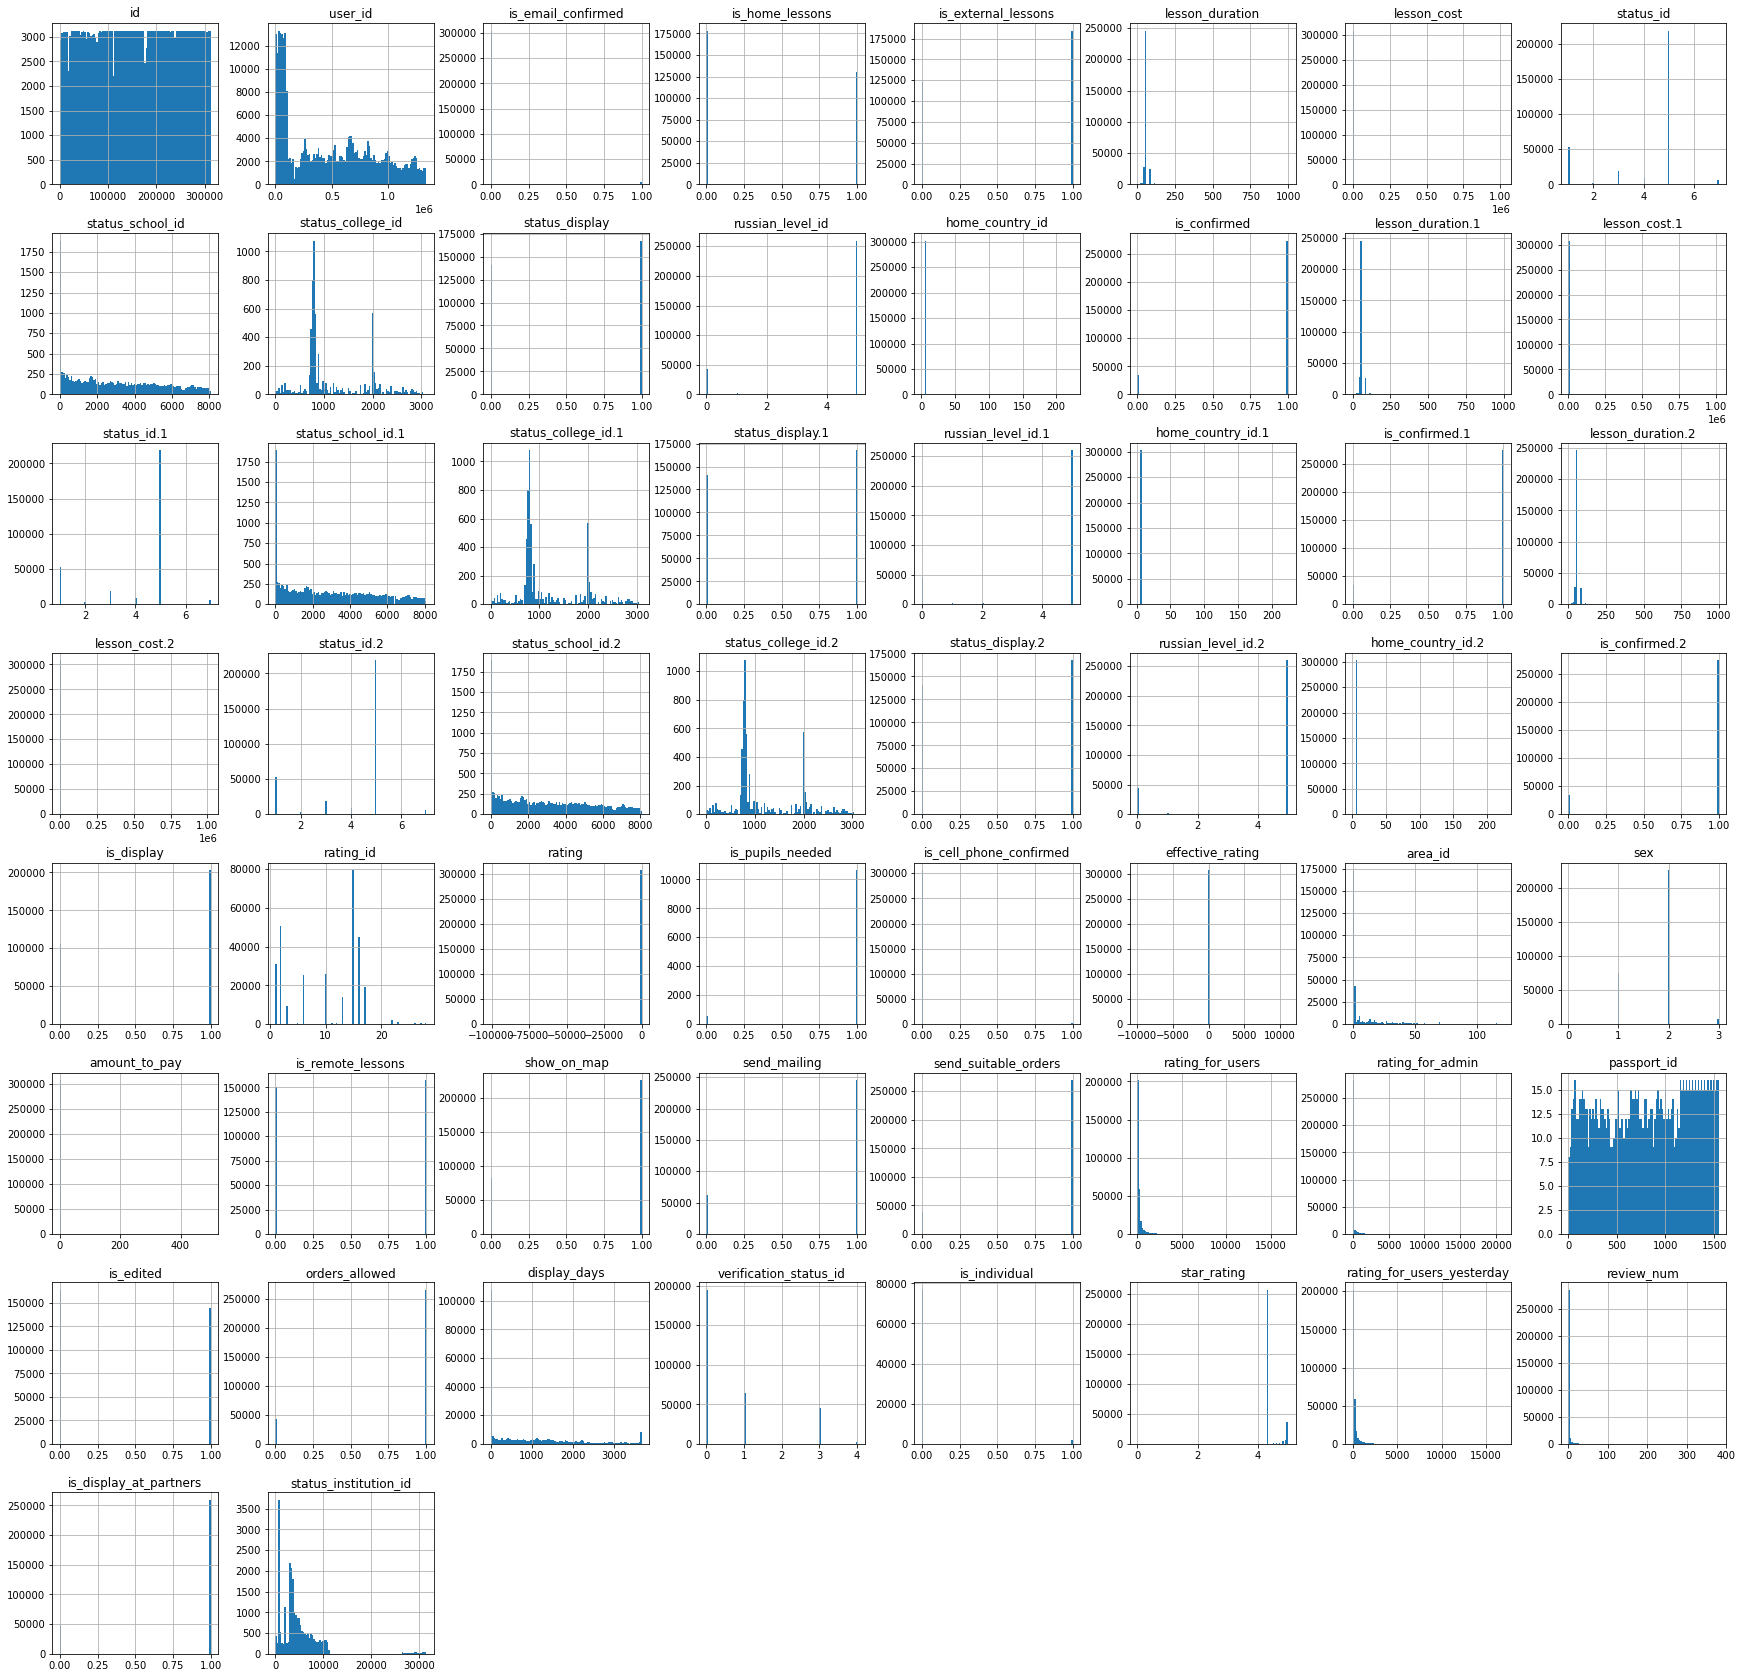

In [153]:
teachers_info.hist(figsize = (30, 30), bins = 100);

In [154]:
teachers_info['user_id'].duplicated().sum()

0

In [155]:
(teachers_info['rating_for_users_yesterday'] != teachers_info['rating_for_users']).sum()

6030

- в датасете `teachers_info` **307 972** строк, 80 столбцов
- дубликаты **отсутствуют**
- дубликаты идентификатора `user_id` **отсутствуют**
- пропуски в индексе **отсутствуют**
- имеются многочисленные **пропуски** данных
- столбцы `rating_for_users` и `rating_for_users_yesterday` практически идентичны, предлагается оставить только `rating_for_users`, как более долгосрочный
- основная часть данных представляется малополезной для прогнозирования, за исключением рейтингов: `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `star_rating`

#### Удалим лишние столбцы

In [156]:
teachers_info = teachers_info[['user_id', 'rating', 'rating_for_admin',
                              'rating_for_users',
                              'rating_id','star_rating']]
teachers_info.head(2)

user_id  rating  rating_for_admin  rating_for_users  rating_id  star_rating
0       45       5             237.5            1138.0         15     4.500000
1       63      -3               0.0              25.0          4     4.300781

- в датасете `teachers_info` оставлены только столбцы с рейтингами `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `star_rating`

## Создадим новые признаки

### Добавим в датасет `suitable_teachers` рейтинги учителей из  датасета `teachers_info` 

In [157]:
suitable_teachers = suitable_teachers.join(teachers_info.set_index('user_id'),
                                           on='teacher_id')

suitable_teachers = suitable_teachers.fillna(0)

In [158]:
suitable_teachers.head(3)

teacher_id  order_id  enable_auto_assign  enable_assign  rating  \
0       82583   1742711                   1              1     7.0   
1      125057   1742713                   0              0    -5.0   
2      231211   1742713                   0              0     0.0   

   rating_for_admin  rating_for_users  rating_id  star_rating  
0             882.0            1191.0       17.0          5.0  
1               0.0             210.0        6.0          5.0  
2               0.0               0.0        0.0          0.0

##### Проверим, что у учителей с одним идентификатором одинаковые параметры

In [159]:
suitable_teachers[suitable_teachers['teacher_id'] == 64342].head()

teacher_id  order_id  enable_auto_assign  enable_assign  rating  \
3641       64342   1743280                   0              0    -1.0   
3986       64342   1743134                   0              0    -1.0   
5274       64342   1743401                   0              0    -1.0   
8434       64342   1743679                   0              0    -1.0   
9878       64342   1744024                   0              0    -1.0   

      rating_for_admin  rating_for_users  rating_id  star_rating  
3641               0.0              25.0        2.0     4.300781  
3986               0.0              25.0        2.0     4.300781  
5274               0.0              25.0        2.0     4.300781  
8434               0.0              25.0        2.0     4.300781  
9878               0.0              25.0        2.0     4.300781

In [160]:
suitable_teachers.isna().sum().sum()

0

- в датасет `suitable_teachers` добавлены признаки рейтингов учителей из датасета `teachers_info`

### Выделим из признака `purpose` признак подготовки к экзаменам

- объявим функцию выделения цели занятий из признака `purpose`

In [56]:
def purpose_determination(text):

    result = 0

    purpose = {1 : ['ГИА', 'ЕГЭ', 'ОГЭ', 'ВПР', 'ДВИ', 'экзамен'],
               2: ['HSK', 'DELE', 'Никонгу', 'иероглифика', 'каллиграфия',
                     'A-level', 'BEC', 'CAE', 'CPE', 'ESOL Pitman', 'FCE', 'GMAT', 'GRE',
                     'IELTS', 'ILEC', 'KET', 'PET', 'SAT', 'TKT', 'TOEFL', 'TOEIC', 'YLE',
                     'DSD', 'DSH', 'Goete-Zertifikat', 'KDS', 'Sprachtest', 'TestDAF', 'ZDaF', 'ZMP',
                     'CELI', 'CILS', 'PLIDA','язык', 'барьер'],
               3: ['олимпиада', 'углубленное', 'школьн', 'объяснить', 'помощь', 'уровень',
                         'успеваемость', 'нагнать'],
               4: ['бизнес'],
               5: ['другое']
              }
    for goal in purpose:
        for item in purpose[goal]:
            if item in text:
                result = goal

    return result

##### Проверим работу функции

In [57]:
data['purpose'][3]

'Разделы: общий курс.\nКатегория ученика: студентка 4 курса медицинского Вуза.\nУровень знаний: начинающий.\nЦель занятий: повысить уровень.'

In [58]:
purpose_determination(data['purpose'].values[3])

3

- объявлена функция выделения цели занятий из признака `purpose`

### Объявим функцию, которая создаст новые признаки

In [187]:
def new_features_creator(data, teacher_train_payability, 
                         suitable_teachers, teachers_info):

    # Введем признак длины имени
    data.loc[:, 'purpose_len'] = data.loc[:,
                'purpose'].apply(len)
    
    # Введем признак длины доп. информаци
    data.loc[:, 'add_info_len'] = data.loc[:,
                'add_info'].apply(len)
   
    # Введем признак цели занятий
    data.loc[:, 'purpose_code'] = data.loc[:,
                'purpose'].apply(purpose_determination)
    
    #Введем признаки времени

    data['year'] = data['order_date'].dt.year
    data['month'] = data['order_date'].dt.month
    data['day'] = data['order_date'].dt.day
    data['dayofweek'] = data['order_date'].dt.dayofweek
    data['hour'] = data['order_date'].dt.hour

    # Создадим признаки обеспеченности каждой заявки учителями и их средних рейтингов 
    
    
    agg_ratings = pd.pivot_table(suitable_teachers, index = 'order_id',
                  values = sorted(suitable_teachers.drop(['order_id', 'teacher_id'], axis = 1)),
                                 aggfunc = 'mean').reset_index(drop = False)
    
    agg_ratings['suitable_teachers'] = pd.pivot_table(suitable_teachers, index = 'order_id',
                  values = 'teacher_id',
                aggfunc = ('count')).reset_index(drop = False)['teacher_id']
    
    # Присоединим к основному датасету

    data = data.join(agg_ratings.set_index('order_id'), on='id')
    
    # Если у заявки нет какого-то рейтинга, проставим рейтинг 0
    data = data.fillna(0)


    return data

#### Объявим функцию, которая обработает дубликаты заявок: пометит первичные заявки, хотя бы один дубликат которой оказался оплачен, как оплаченные, и удалим дубликаты

In [188]:
def dup_orders_processing(data):

   
    # Унифицируем значение столбца `payment` для первичных заявок и дубликатов заявок
    # - если где-то есть `1`, то везде проставим `1`
    
    columns_to_agg = ['payment']                     

    sorted_order = pd.pivot_table(data, index = 'original_order_id',
    values = (columns_to_agg), aggfunc = ('max'))

    #sorted_order[sorted_order['payment'] >0] = 1

    data_index = data.index
    data.index = data['original_order_id']
    data.loc[sorted_order.index, columns_to_agg] = \
             sorted_order[columns_to_agg]
    data.index = data_index


    # Удалим все дубликаты заявок, так как нам нужно определить вероятность оплаты первичной заявки

    data = data.loc[data['original_order_id'] == data['id'], :]

    data = data.reset_index(drop = True)

   
    return data

#### Объявим функцию, которая удалит лишние столбцы

In [190]:
def columns_remover(data):
    
    # Удалим столбцы с информацией, несущей утечку целевого признака или лишней для модели
    
    columns_to_drop = ['working_teacher_id', 
                       #'add_info', 'purpose',
                       'order_date', 'id', 'original_order_id', 
                       'payment'
                      ]
        
    for column in columns_to_drop:
        try:
            data = data.drop(column, axis = 1)
        except:
            pass
    
    return data

## Подготовим данные для машинного обучения

#### Объявим функцию, которая создаст массив признаков и вектор целевого признака

In [191]:
def features_creation(data, teacher_train_payability, 
                         suitable_teachers, teachers_info):
    
    
    # Создадим новые признаки
    data = new_features_creator(data, teacher_train_payability, 
                         suitable_teachers, teachers_info)
    
    # Обработаем дубликаты заявок
    data = dup_orders_processing(data)
    
    # Выделим вектор целевого признака
    target = data['payment']
    
    # Удалим лишние столбцы
    features = columns_remover(data)
    
    
    return features, target

### Создадим на базе массива `train_data` на массив признаков `features_train` и вектор целевого признака `target_train`

In [192]:
features_train, target_train = features_creation(train_data, teacher_train_payability, 
                         suitable_teachers, teachers_info)

In [193]:
print('Размерность обучающей выборки:', features_train.shape, '\n')
print('Состав признаков: \n', sorted(features_train.columns), '\n')
print('Распределение значений в векторе целевого признака:')
print(target_train.value_counts())

Размерность обучающей выборки: (454992, 37) 

Состав признаков: 
 ['add_info', 'add_info_len', 'chosen_teachers_only', 'day', 'dayofweek', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lesson_price', 'lessons_per_week', 'minimal_price', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose', 'purpose_code', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'source_id', 'star_rating', 'subject_id', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year'] 

Распределение значений в векторе целевого признака:
0    356137
1     98855
Name: payment, dtype: int64


- создан массив признаков `features_train` и вектор целевого признака `target_train`, в котором:
    - удалены дубликаты заявок
    - в случае, если хотя бы один из дубликатов был оплачен, первичной заявке присваивается статус `оплачена` (**целевой признак** = 1)
    - созданы новые признаки длины полей `purpose_len` и `add_info_len`, содержащие длину признаков `purpose` и `add_info`
    - создан новый признак цели занятий `purpose_code`, содержащий цель занятий
    - созданы новые признаки `года`, `месяца`, `дня`, `дня недели` и `часа` создания заявки
    - созданы новые признаки `suitable_teachers` (количество подходящих к заявке учителей), `enable_assign` (средняя возможность назначиться), `enable_auto_assign` (средняя возможность автоматического назначения)
    - созданы новые признаки `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `source_id`, `star_rating`, содержащие **средние** рейтинги учителей, подходящих к заявке
    - из массива признаков удалены столбцы `order_date`, `client_id`, `creator_id`, `id`, `original_order_id`, `working_teacher_id` и `payment`, содержащие **утечку целевого признака**

## Проведем исследовательский анализ признаков

#### Создадим массив признаков для исследования путем добавления вектора целевого признака в массив признаков

In [194]:
transformed_features = features_train.copy(deep=True)
transformed_features['payment'] = target_train

In [195]:
transformed_features.head(2)

add_info  \
0  Район: м. Академическая.\nМесто проведения занятий: у ученика (Гражданский переулок, д. 36), у преподавателя (м. Академическая).\nПредполагаемое число занятий в неделю: 1-2, дни и время по согласованию.\nОпыт репетитора: не имеет значения.\nВозраст репетитора: от 18 лет до 80 лет.\nПол репетитора: не имеет значения.\nСтатус репетитора: не имеет значения.   
1                                                                                                                                                                                                                                                                                                                                                               unknown   

   chosen_teachers_only  home_metro_id  is_display_to_teachers  \
0                     0            259                       1   
1                     0              0                       1   

   lesson_duration  lesson_place_new  lesson_price  lessons_per_week  \
0               60                 3          1500                 3   
1               60                 0             0                 0   

   minimal_price  no_teachers_available  planned_lesson_number  \
0            900                      0                     10   
1              0                      0                      0   

   pupil_category_new_id  pupil_knowledgelvl  \
0                      9                   0   
1                      0                   0   

                                                                                                                                                                                         purpose  \
0  Разделы:  школьный курс, алгебра, алгебра логики, геометрия.\nКатегория ученика: школьник 8 класса.\nЦель занятий: помощь по школьной программе, повысить уровень знаний. Восполнить пробелы.   
1                                                                                                                                                                                        unknown   

   source_id  subject_id  teacher_age_from  teacher_age_to  \
0         16           8                18              80   
1         13           1                16              16   

   teacher_experience_from  teacher_experience_to  teacher_sex  purpose_len  \
0                        0                      0            3          187   
1                        0                      0            3            7   

   add_info_len  purpose_code  year  month  day  dayofweek  hour  \
0           350             3  2021      9    1          2     0   
1             7             0  2021      9    1          2     0   

   enable_assign  enable_auto_assign  rating  rating_for_admin  \
0            0.0                 0.0     0.0               0.0   
1            0.0                 0.0     0.0               0.0   

   rating_for_users  rating_id  star_rating  suitable_teachers  payment  
0               0.0        0.0          0.0                0.0        1  
1               0.0        0.0          0.0                0.0        0

### Изучим распределение признаков и целевого признака

#### Проверим дисбаланс классов

Количество значений каждого класса в выборке:

0    356137
1     98855
Name: payment, dtype: int64 

Доля значений каждого класса в выборке:

0    0.78
1    0.22
Name: payment, dtype: float64


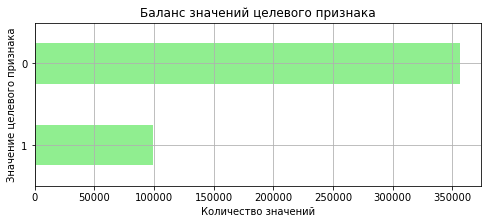

In [196]:
print('Количество значений каждого класса в выборке:\n')
print(target_train.value_counts(), '\n')
print('Доля значений каждого класса в выборке:\n')
print(round(target_train.value_counts()/target_train.count(),2))

target_train.value_counts(ascending = True).plot(
                              kind = 'barh',
                              grid = True,
                              color = 'lightgreen',
                              figsize = (8, 3));
plt.title('Баланс значений целевого признака');
plt.xlabel('Количество значений');
plt.ylabel('Значение целевого признака');

- имеется **сильный** дисбаланс классов: в векторе **целевого признака**  22% значений единичного класса (оплачено) и 78% нулевых значений (не оплачено), что необходимо учесть при обучении моделей (нужна балансировка)

#### Изучим распределение категориальных признаков в зависимости от значения целевого признака

##### Объявим функцию `interval_categorical_text`, которая определяет, какие признаки являются количественными, категориальными и текстовыми

In [197]:
def interval_categorical_text(data):
    interval_cols = []
    categorical_cols = []
    text_cols = []
    
    for column in data.columns:
        if data[column].dtype == 'object':
            text_cols.append(column)
        
        elif data[column].nunique() >36:
            interval_cols.append(column)
            
        else:
            categorical_cols.append(column)
            
            
    print('\ninterval_cols\n', sorted(interval_cols))
    print('\ncategorical_cols\n', sorted(categorical_cols))
    print('\ntext_cols\n', sorted(text_cols))
    
    return interval_cols, categorical_cols, text_cols

In [198]:
interval_cols, categorical_cols, text_cols = interval_categorical_text(transformed_features)


interval_cols
 ['add_info_len', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'lesson_price', 'minimal_price', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'star_rating', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to']

categorical_cols
 ['chosen_teachers_only', 'day', 'dayofweek', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lessons_per_week', 'month', 'no_teachers_available', 'payment', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose_code', 'source_id', 'subject_id', 'teacher_sex', 'year']

text_cols
 ['add_info', 'purpose']


#### Выделим для анализа попарного распределения категориальных признаков в зависимости от значений целевого признака категориальные признаки с небольшим количеством категорий

In [199]:
cols_to_explore = transformed_features[categorical_cols].nunique().sort_values(ascending = False).tail(10).index

In [200]:
cols_to_explore

Index(['lesson_duration', 'purpose_code', 'planned_lesson_number',
       'pupil_knowledgelvl', 'teacher_sex', 'year', 'chosen_teachers_only',
       'is_display_to_teachers', 'no_teachers_available', 'payment'],
      dtype='object')

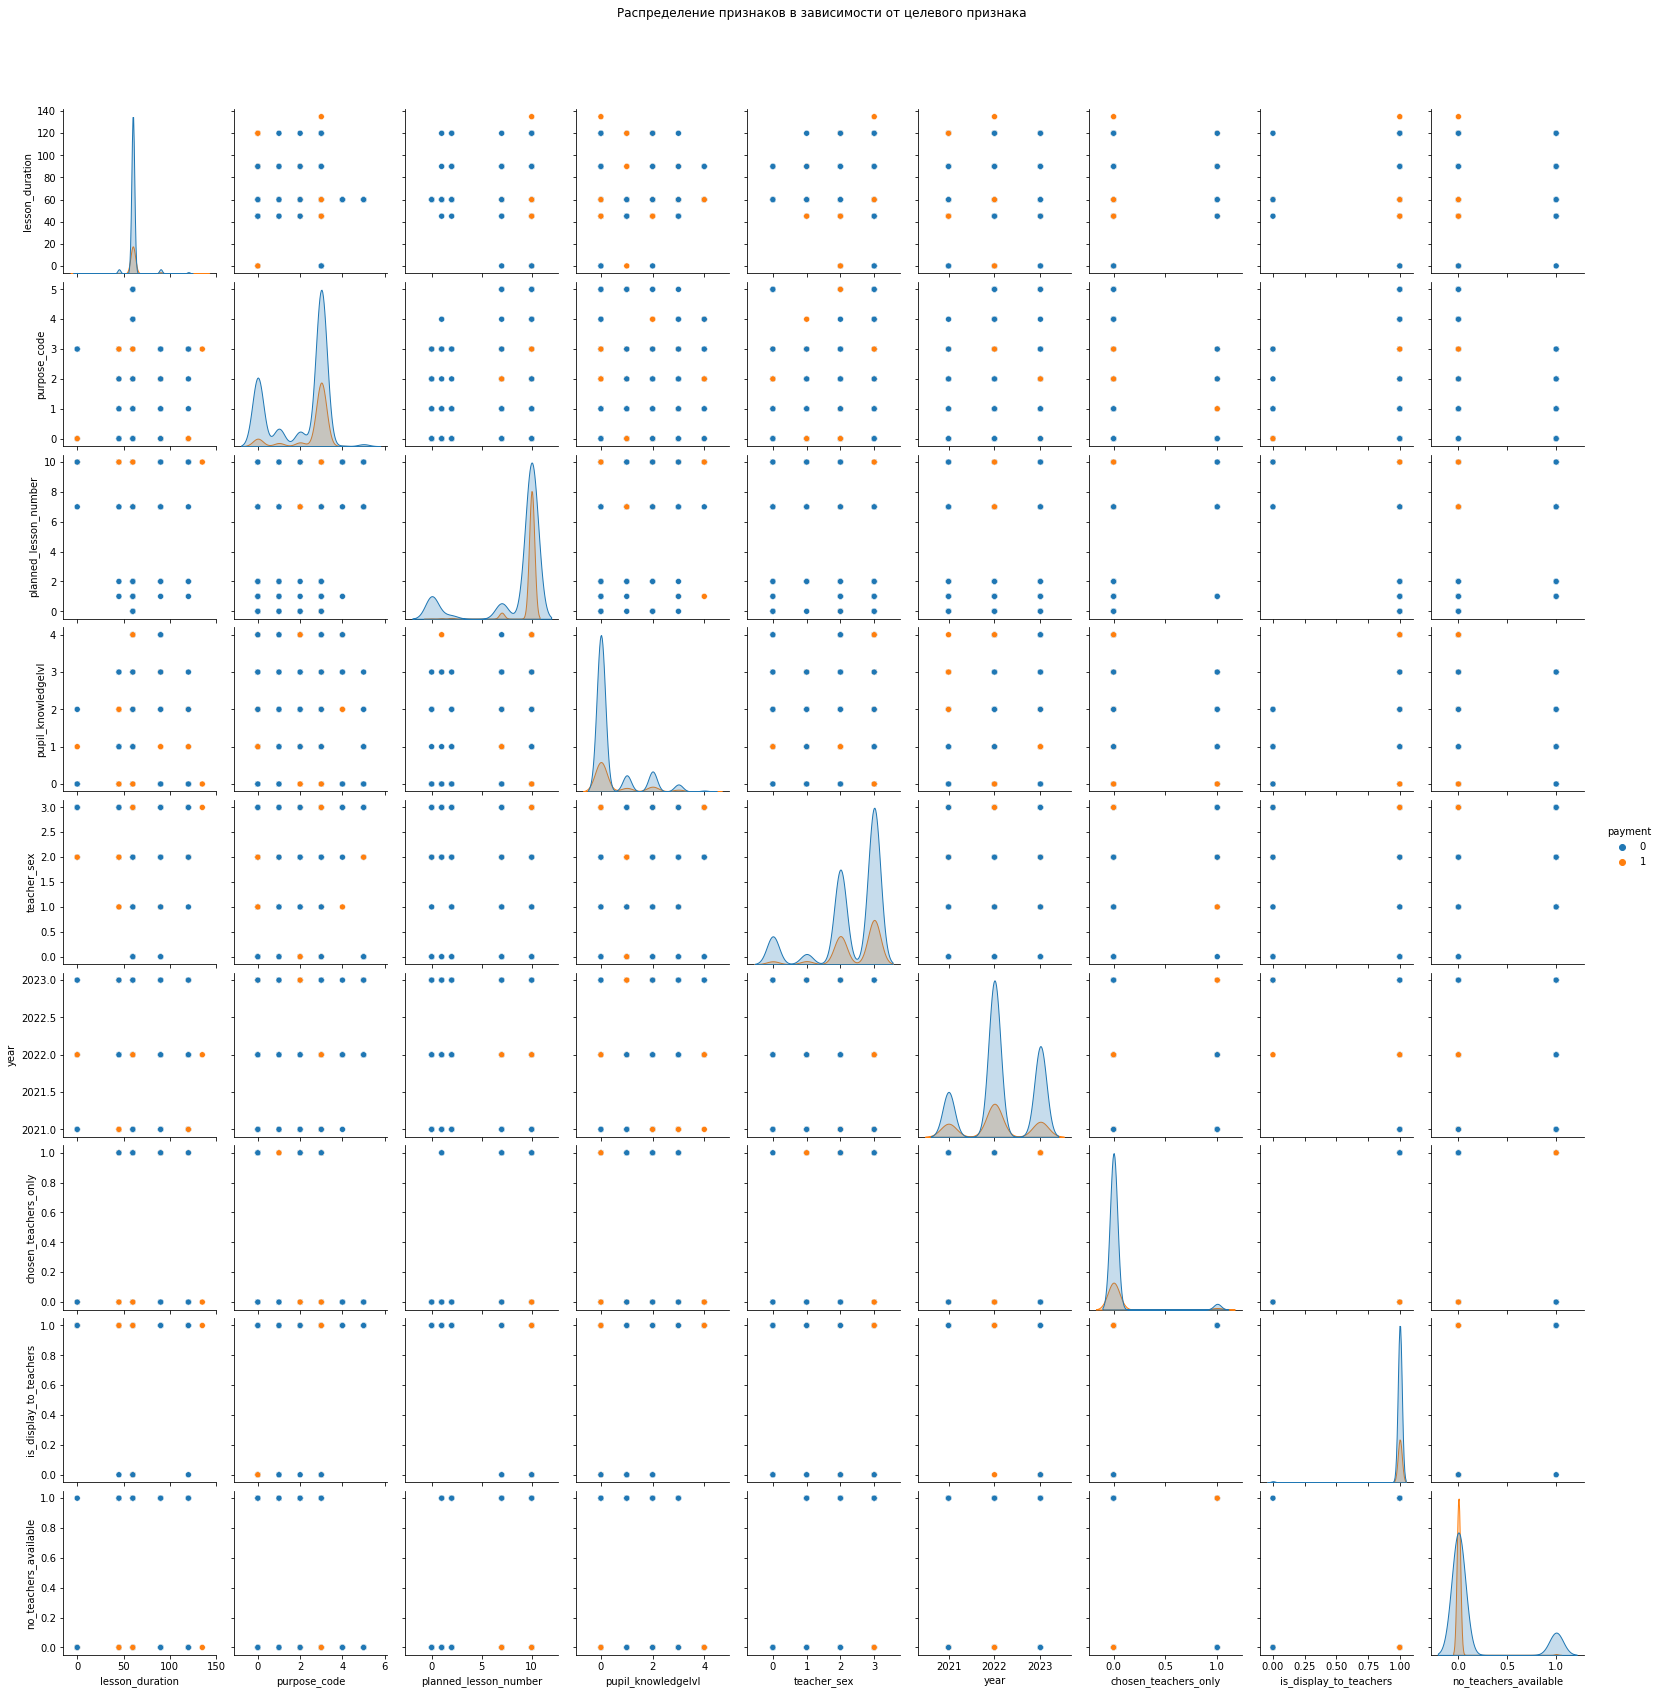

In [202]:
g = sns.pairplot(transformed_features[cols_to_explore].sample(frac = 0.01,
                 random_state=RANDOM_STATE), hue='payment');

g.fig.suptitle('Распределение признаков в зависимости \
от целевого признака', y=1.05);

- **Анализ распределения категориальных признаков в зависимости от целевого признака** показывает практически идентичное распределение значений категориальных признаков в оплаченных и не оплаченных заявках, в поправкой на дисбаланс классов, за исключением признаков `no_teachers_available` - в оплаченных заявках удельный вес нулевого значения признака (есть доступные учителя) значительно превышает удельный вес признака в неоплаченных заявках, а также `planned_lesson_number` - в оплаченных заявках доля количества уроков = 10 значительно больше доли этого количества уроков в неоплаченных заявках

#### Изучим распределение количественных признаков в зависимости от значения целевого признака

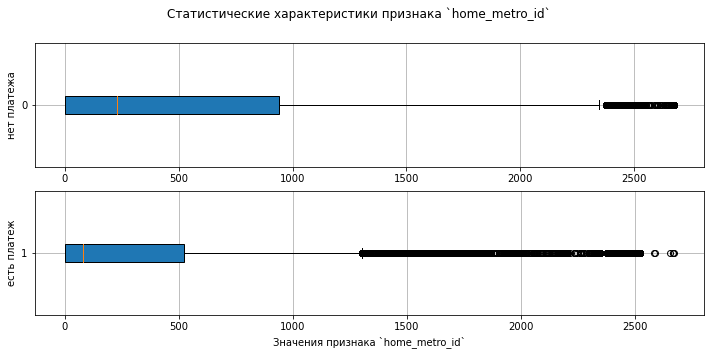

count        mean         std  min  25%    50%    75%     max
нет платежа  356137.0  533.845857  664.913287  0.0  0.0  228.0  939.0  2674.0
есть платеж   98855.0  384.614364  606.074956  0.0  0.0   81.0  520.5  2669.0

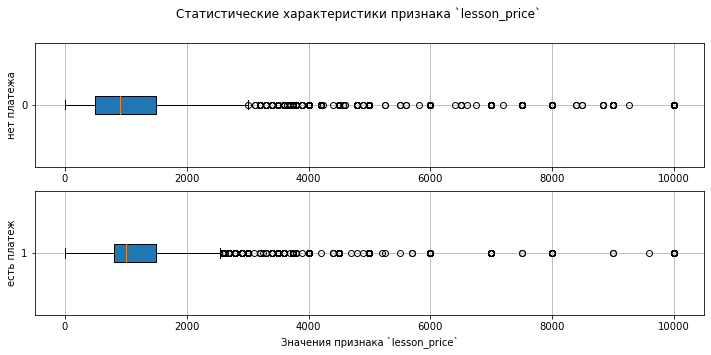

count         mean         std  min    25%     50%     75%  \
нет платежа  356137.0  1013.239301  862.431161  0.0  500.0   900.0  1500.0   
есть платеж   98855.0  1296.955450  751.876032  0.0  800.0  1000.0  1500.0   

                 max  
нет платежа  10000.0  
есть платеж  10000.0

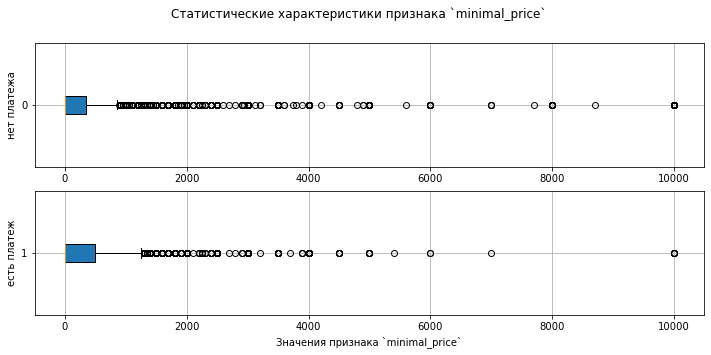

count        mean         std  min  25%  50%    75%      max
нет платежа  356137.0  191.868691  406.535804  0.0  0.0  0.0  350.0  10000.0
есть платеж   98855.0  326.936827  462.410860  0.0  0.0  0.0  500.0  10000.0

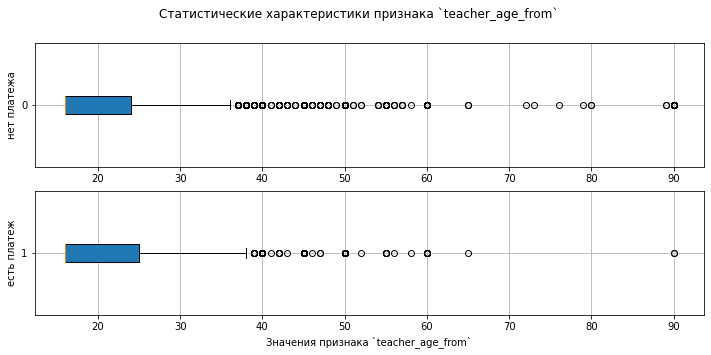

count       mean       std   min   25%   50%   75%   max
нет платежа  356137.0  19.290683  5.484751  16.0  16.0  16.0  24.0  90.0
есть платеж   98855.0  20.216833  5.930338  16.0  16.0  16.0  25.0  90.0

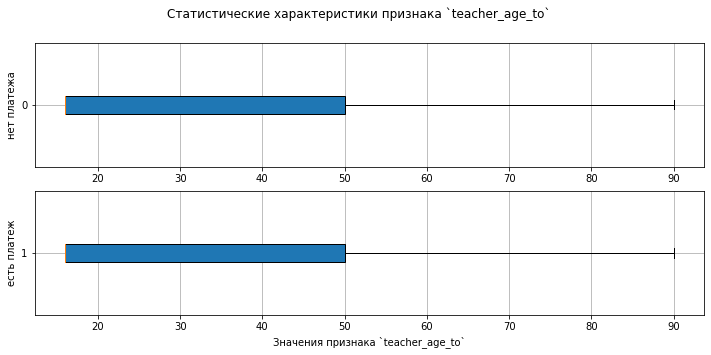

count       mean        std   min   25%   50%   75%   max
нет платежа  356137.0  31.022174  22.594839  16.0  16.0  16.0  50.0  90.0
есть платеж   98855.0  31.993071  22.426837  16.0  16.0  16.0  50.0  90.0

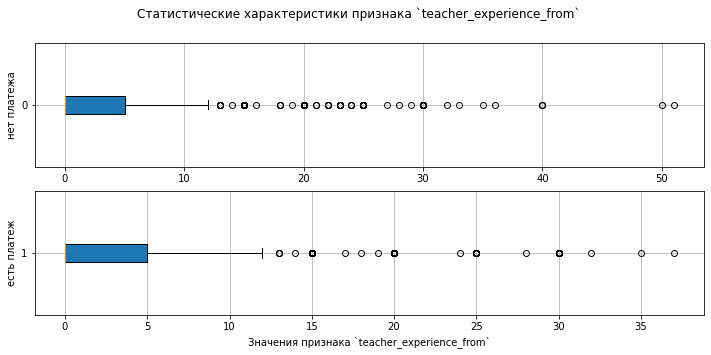

count      mean       std  min  25%  50%  75%   max
нет платежа  356137.0  1.858212  3.006629  0.0  0.0  0.0  5.0  51.0
есть платеж   98855.0  1.923099  3.055925  0.0  0.0  0.0  5.0  37.0

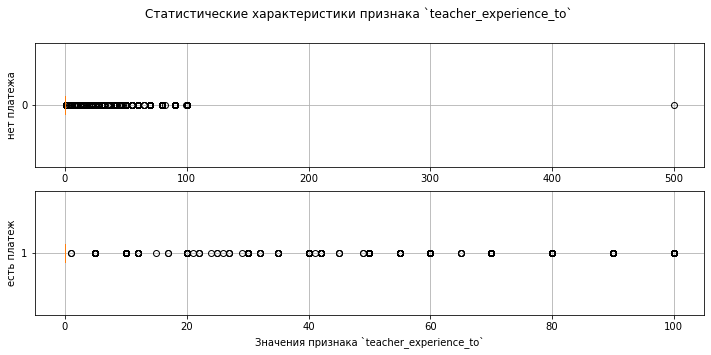

count      mean       std  min  25%  50%  75%    max
нет платежа  356137.0  0.632675  6.796016  0.0  0.0  0.0  0.0  500.0
есть платеж   98855.0  0.807617  7.723461  0.0  0.0  0.0  0.0  100.0

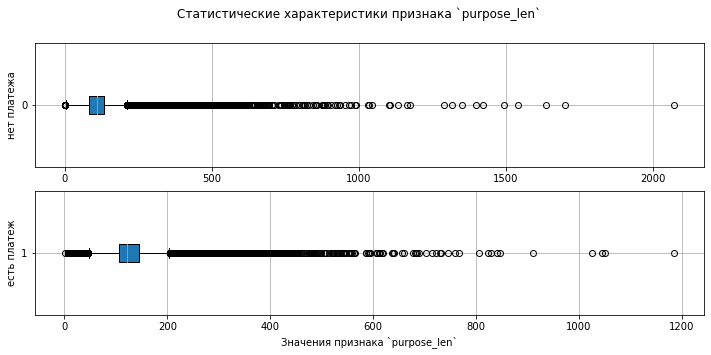

count        mean        std  min    25%    50%    75%     max
нет платежа  356137.0  106.521047  59.052739  1.0   81.0  110.0  133.0  2070.0
есть платеж   98855.0  130.231470  45.084162  1.0  106.0  121.0  145.5  1184.0

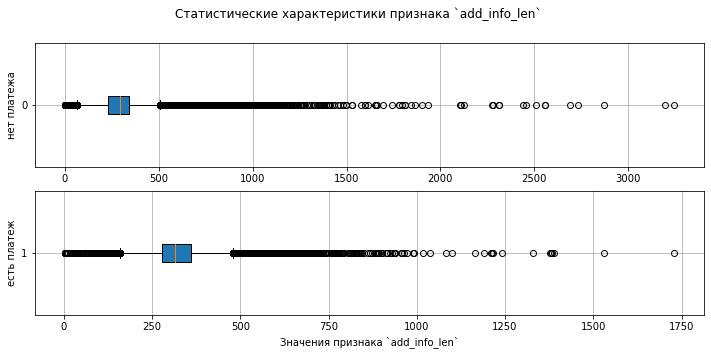

count        mean         std  min    25%    50%    75%  \
нет платежа  356137.0  267.958171  131.750442  1.0  230.0  294.0  340.0   
есть платеж   98855.0  321.253917   71.799877  3.0  279.0  316.0  359.0   

                max  
нет платежа  3242.0  
есть платеж  1728.0

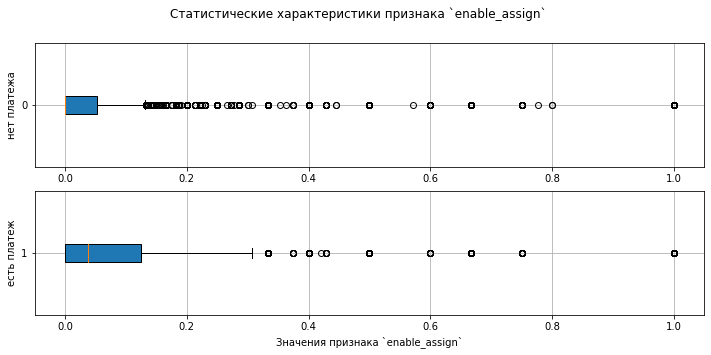

count      mean       std  min  25%       50%       75%  max
нет платежа  356137.0  0.087412  0.216986  0.0  0.0  0.000000  0.052632  1.0
есть платеж   98855.0  0.154742  0.281440  0.0  0.0  0.037037  0.125000  1.0

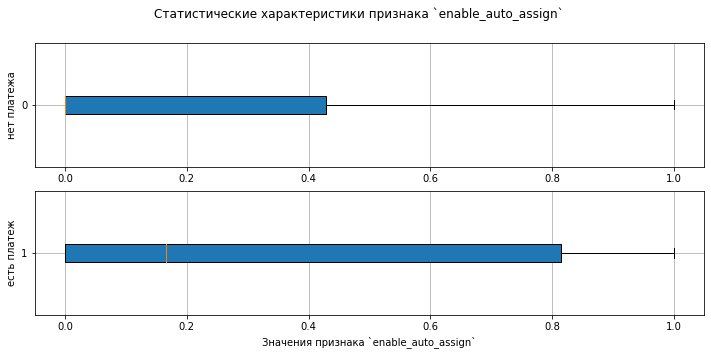

count      mean       std  min  25%       50%       75%  max
нет платежа  356137.0  0.244057  0.371066  0.0  0.0  0.000000  0.428571  1.0
есть платеж   98855.0  0.370903  0.403721  0.0  0.0  0.166667  0.814815  1.0

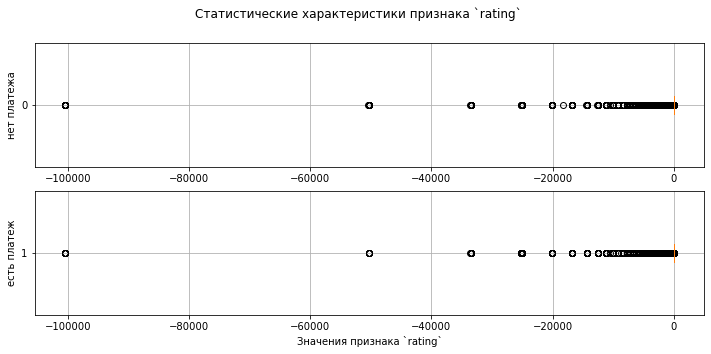

count       mean          std       min       25%       50%  \
нет платежа  356137.0 -38.650744  1033.045954 -100500.0 -0.478261  0.000000   
есть платеж   98855.0 -71.074694  1328.758789 -100500.0 -1.095238 -0.136364   

                  75%   max  
нет платежа  0.000000  10.0  
есть платеж  0.230769  10.0

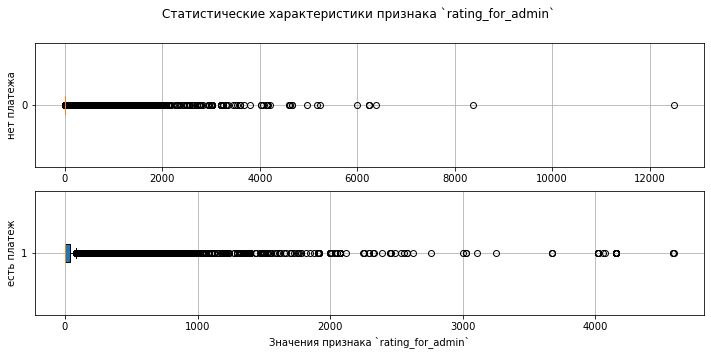

count  mean  std  min  25%  50%       75%      max
нет платежа  356137.0   NaN  NaN  0.0  0.0  0.0   0.00000  12496.0
есть платеж   98855.0   NaN  NaN  0.0  0.0  0.0  34.09375   4592.0

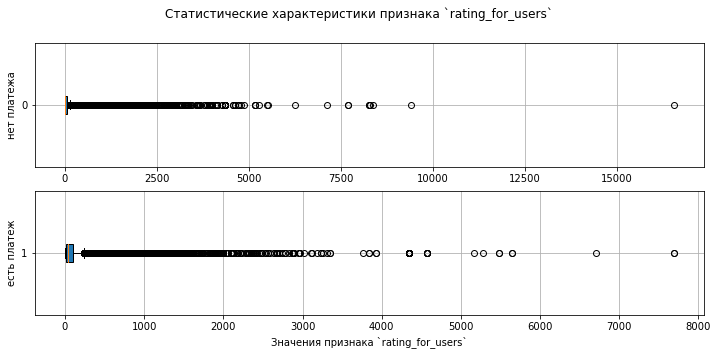

count  mean  std  min   25%        50%       75%      max
нет платежа  356137.0   NaN  NaN  0.0   0.0   2.941406   55.5000  16544.0
есть платеж   98855.0   NaN  NaN  0.0  10.5  43.750000  100.8125   7688.0

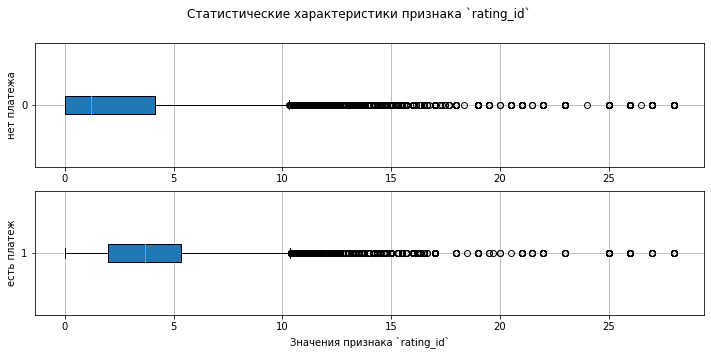

count      mean       std  min  25%  50%       75%   max
нет платежа  356137.0  2.401610  3.109932  0.0  0.0  1.2  4.125000  28.0
есть платеж   98855.0  3.924825  3.099905  0.0  2.0  3.7  5.346154  28.0

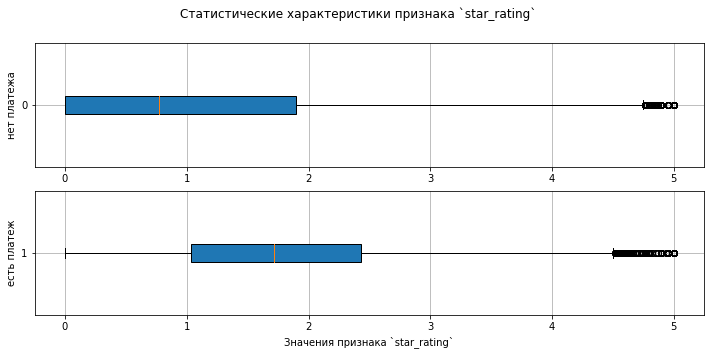

count  mean  std  min       25%       50%       75%  max
нет платежа  356137.0   NaN  0.0  0.0  0.000000  0.774902  1.900391  5.0
есть платеж   98855.0   NaN  0.0  0.0  1.038086  1.720703  2.427734  5.0

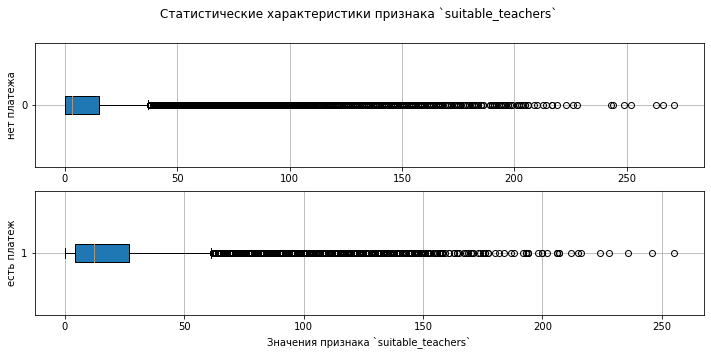

count       mean        std  min  25%   50%   75%    max
нет платежа  356137.0  11.151526  18.451680  0.0  0.0   3.0  15.0  271.0
есть платеж   98855.0  18.705812  20.115193  0.0  4.0  12.0  27.0  255.0

In [203]:
for feature in interval_cols:
    print('\n')
    fig, ax = plt.subplots(2, 1, figsize = (12, 5));
    plt.suptitle("Статистические характеристики \
признака `" + feature + "`");

    box_0 = transformed_features[transformed_features['payment'] == 0][[feature]]
    ax[0].boxplot(box_0, vert = False,
                  patch_artist = True,
                  labels = '0');

    ax[0].grid(True);
    ax[0].set_ylabel('нет платежа');


    box_1 = transformed_features[transformed_features['payment'] == 1][[feature]]
    ax[1].boxplot(box_1, vert = False,
                 patch_artist = True,
                 labels = '1');
    ax[1].grid(True)
    ax[1].set_ylabel('есть платеж')


    plt.xlabel('Значения признака `' + feature + '`');
    plt.show();
    feature_descript = pd.DataFrame(box_0.describe())
    feature_descript['1'] = box_1.describe()

    feature_descript.columns = ['нет платежа', 'есть платеж']
    display(feature_descript.T)

- **Анализ распределения количественных признаков в зависимости от значения целевого признака показывает следующее:**

    - имеются многочисленные выбросы, при использовании линейных моделей нужно будет использовать **RobustScaler**
    
    - в распределении признаков `teacher_age_from`, `teacher_age_to`, `teacher_experience_from`, `teacher_experience_to` **отсутствуют** различия между оплаченными и неоплаченными заявками
    - наиболее заметным различия между оплаченными и неоплаченными заявками в распределениях следующих признаков:
        - `suitable_teachers` - 50% не оплаченных заявок имеют значение этого рейтинга менее 3, в то же время как 75% оплаченных имеет значение рейтинга более 4
        - `star_rating` - половина не оплаченных заявок имеет значение этого рейтинга менее 0.7, в то же время более 75% оплаченных заявок имеет значение этого рейтинга более 1
       - `rating_id` - половина не оплаченных заявок имеет значение этого рейтинга менее 1, при этом 75% оплаченных заявок имеет значение рейтинга более 2
       - `rating for users`- половина не оплаченных заявок имеет значение этого рейтинга менее 2, при этом 75% оплаченных заявок имеет значение рейтинга более 10       

       
- **Можно нарисовать следующий портрет потенциально оплаченной заявки**:
    - `suitable_teachers` более 3
    - `stars_rating` более 1
    - `rating_id` более 1
    - `rating for users` более 2

### Изучим корреляцию признаков с целевым признаком и мультиколлинеарность

In [204]:
corr_matrix = transformed_features[interval_cols+categorical_cols].sample(frac=0.01,
                        random_state = RANDOM_STATE).phik_matrix(
    interval_cols = interval_cols)

In [205]:
corr_matrix['payment'].sort_values(ascending = False).head(20)

payment                  1.000000
star_rating              0.355048
no_teachers_available    0.288880
lesson_place_new         0.286450
add_info_len             0.278947
purpose_code             0.260006
rating_id                0.232389
enable_auto_assign       0.231333
lessons_per_week         0.210497
pupil_category_new_id    0.188882
suitable_teachers        0.188675
lesson_price             0.175172
enable_assign            0.162221
home_metro_id            0.150994
planned_lesson_number    0.146916
source_id                0.141346
teacher_sex              0.129991
subject_id               0.123880
teacher_age_from         0.109972
teacher_age_to           0.092090
Name: payment, dtype: float64

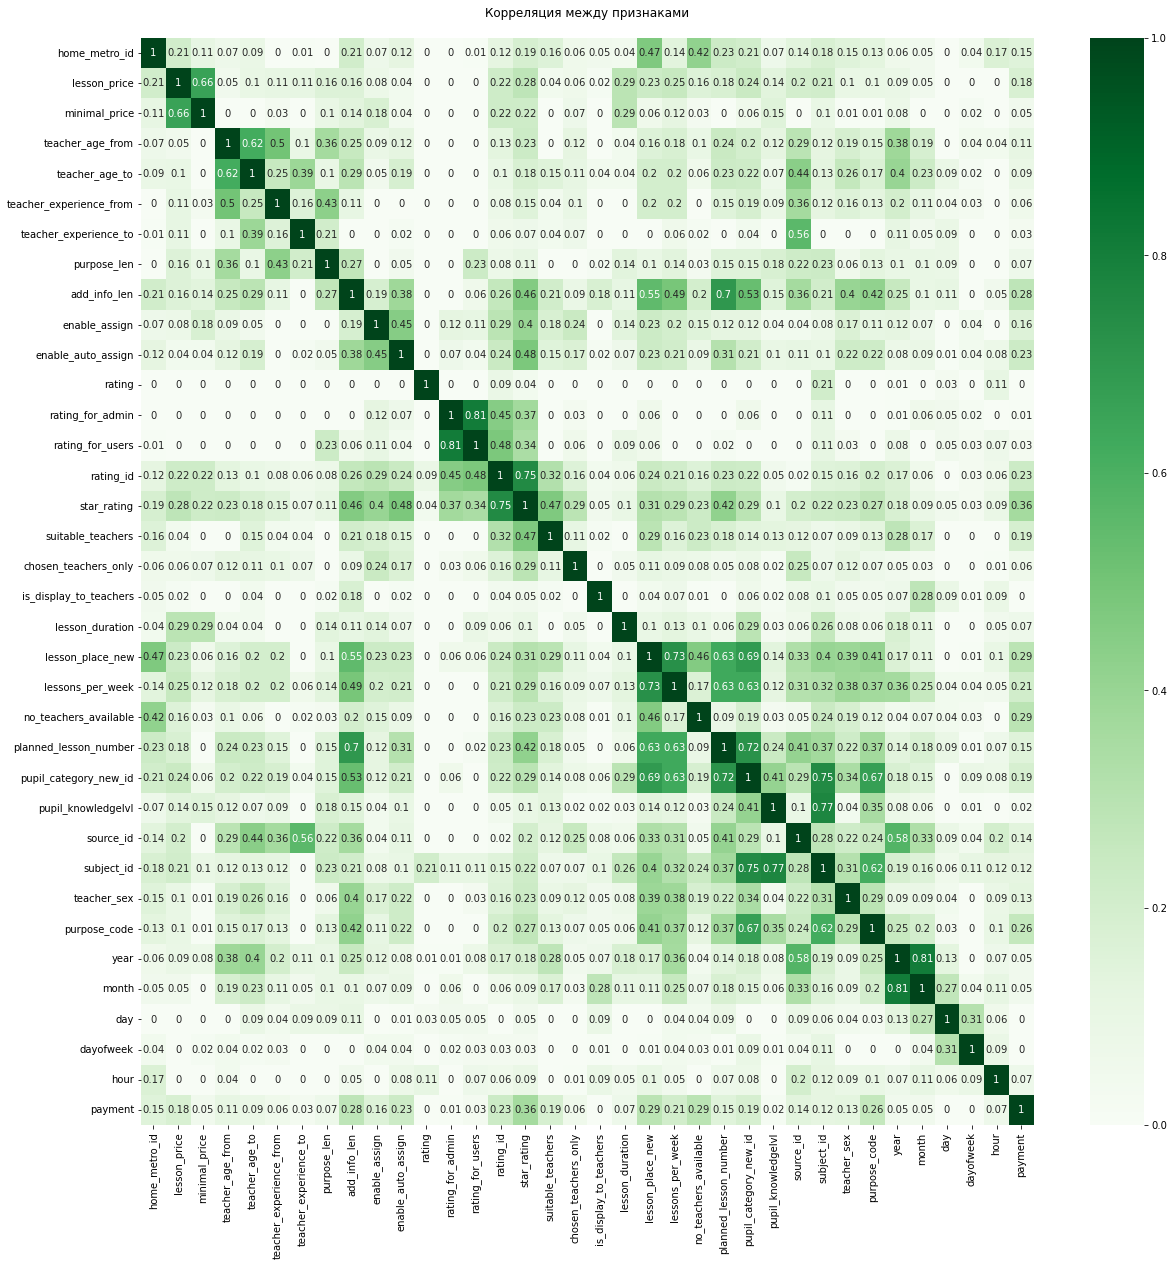

In [206]:
plt.figure(figsize = (20, 20))
plt.title('Корреляция между признаками\n');
sns.heatmap(round(abs(corr_matrix), 2),
            annot = True,
           cmap = 'Greens');
plt.show()

- наблюдается **умеренная корреляция** целевого признака со следующими признаками: `star_rating`, `no_teachers_available`, `lesson_place_new`, `add_info_len`, `purpose_code`,
- наблюдается **слабая корреляция** целевого признака со следующими признаками: `rating_id`, `enable_auto_assign`, `lessons_per_week`, `pupil_category_new_id`, `suitable_teachers`, `lesson_price`, `enable_assign`,   `home_metro_id`, `planned_lesson_number`, `source_id`,  `teacher_sex`,  `teacher_age_from`
- с остальными признаками корреляция **отсутствует**
- наблюдается **сильная мультиколлинеарность** между признаками `rating_for_admin` и `rating_for_users`, что необходимо учесть при обучении в случае использования линейных моделей

## Обучим и протестируем модели методом кросс-валидации

### Обучим и протестируем модель `RandomForestClassifier` методом `кросс-валидации`

#### Зададим неизменяемые гиперпараметры модели

In [207]:
rfc = RandomForestClassifier(
    random_state = RANDOM_STATE,
    n_jobs = -1,
    verbose = 100
    )

In [208]:
balancer = SMOTE(random_state=RANDOM_STATE)

#### Зададим трансформер столбцов  и упакуем в него кодировщики количественных и категориальных признаков

In [209]:
rfc_column_transformer = make_column_transformer(

    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
     make_column_selector(dtype_include='object')),

    remainder='passthrough')

#### Сконструируем конвейер для предобработки данных и обучения модели

In [210]:
rfc_pipe = Pipeline(steps=[

    ("rfc_column_transformer", rfc_column_transformer),
    ("balancer", balancer),
    ("rfc", rfc)])
print(rfc_pipe)

Pipeline(steps=[('rfc_column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e63d40070>)])),
                ('balancer', SMOTE(random_state=53)),
                ('rfc',
                 RandomForestClassifier(n_jobs=-1, random_state=53,
                                        verbose=100))])


#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `AUC-ROC` методом `кросс-валидации`

In [211]:
rfc_param_grid = {

    "rfc__n_estimators" : [350], #[276]
    "rfc__max_depth" : [29], # [31]
    "rfc__min_samples_leaf" : [13]
}

#### Объявим функцию поиска оптимальных гиперпараметров

In [216]:
rfc_search = GridSearchCV(
    rfc_pipe,
    rfc_param_grid,
    scoring = 'roc_auc',
    cv = TimeSeriesSplit(n_splits=10),
    verbose = 1000
)

#### Проведем поиск оптимальных гиперпараметров

In [217]:
rfc_search.fit(features_train, target_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 350
building tree 2 of 350
building tree 3 of 350
building tree 4 of 350
building tree 5 of 350
building tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
building tree 10 of 350[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s


building tree 11 of 350[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.3s

building tree 12 of 350[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s

building tree 13 of 350[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s

building tree 14 of 350[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s

building tree 15 of 350[Parallel(n_jobs=-1)]: Done   7 tasks      | ela

building tree 104 of 350[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.4s

building tree 105 of 350[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    3.5s

building tree 106 of 350[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.5s

building tree 107 of 350[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:    3.5s

building tree 108 of 350[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    3.6s
building tree 109 of 350
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:    3.6s

building tree 110 of 350[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    3.6s

building tree 111 of 350[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:    3.6s

building tree 112 of 350[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    3.6s

building tree 113 of 350[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.7s

building tree 114 of 350[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    3.7s

building tree 115 of 350[Parallel(n_jobs=-1

building tree 200 of 350[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.6s

building tree 201 of 350[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:    6.7s
building tree 202 of 350
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    6.7s

building tree 203 of 350[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:    6.7s

building tree 204 of 350[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    6.7s

building tree 205 of 350[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:    6.8s

building tree 206 of 350[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:    6.8s

building tree 207 of 350[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:    6.8s

building tree 208 of 350[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    6.8s

building tree 209 of 350[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:    6.9s

building tree 210 of 350[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    7.0s

building tree 211 of 350[Parallel(n_jobs=-1

building tree 300 of 350[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   10.0s

building tree 301 of 350
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   10.1s
building tree 302 of 350[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   10.1s

building tree 303 of 350[Parallel(n_jobs=-1)]: Done 295 tasks      | elapsed:   10.1s

building tree 304 of 350[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   10.1s

building tree 305 of 350
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:   10.1s
building tree 306 of 350[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:   10.2s

building tree 307 of 350[Parallel(n_jobs=-1)]: Done 299 tasks      | elapsed:   10.2s

building tree 308 of 350[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.3s

building tree 309 of 350[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   10.3s

building tree 310 of 350[Parallel(n_jobs=-1)]: Done 302 tasks      | elapsed:   10.3s

building tree 311 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 179 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 180 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 181 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 182 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 183 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 185 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 186 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 187 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 188 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 189 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 190 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 191 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 193 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[CV 1/10; 1/1] END rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350;, score=0.796 total time=  13.2s
[CV 2/10; 1/1] START rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 350
building tree 2 of 350
building tree 3 of 350
building tree 4 of 350
building tree 5 of 350
building tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
building tree 10 of 350
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s

building tree 11 of 350[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.8s

building tree 12 of 350[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s

building tree 13 of 350[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s

building tree 14 of 350[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s

building tree

building tree 100 of 350[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    9.4s

building tree 101 of 350[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    9.4s

building tree 102 of 350[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    9.7s

building tree 103 of 350[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    9.7s

building tree 104 of 350[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    9.8s

building tree 105 of 350[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   10.0s

building tree 106 of 350[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   10.1s

building tree 107 of 350[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   10.1s

building tree 108 of 350
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   10.1s
building tree 109 of 350[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   10.1s

building tree 110 of 350[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:   10.4s

building tree 111 of 350[Parallel(n_jobs=-1

building tree 195 of 350[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:   18.3s

building tree 196 of 350[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   18.5s

building tree 197 of 350[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   18.7s

building tree 198 of 350[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   18.8s

building tree 199 of 350[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:   18.9s

building tree 200 of 350[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s

building tree 201 of 350[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:   19.0s

building tree 202 of 350[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   19.1s

building tree 203 of 350
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:   19.1s
building tree 204 of 350[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   19.3s

building tree 205 of 350[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   19.5s

building tree 206 of 350[Parallel(n_jobs=-1

building tree 291 of 350[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:   27.8s

building tree 292 of 350[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   27.8s

building tree 293 of 350[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   27.9s

building tree 294 of 350[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:   28.1s

building tree 295 of 350[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:   28.2s

building tree 296 of 350[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   28.2s

building tree 297 of 350[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   28.3s

building tree 298 of 350[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   28.3s

building tree 299 of 350[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:   28.5s

building tree 300 of 350[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   28.5s

building tree 301 of 350[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   28.5s

building tree 302 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 162 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 163 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 164 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 166 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 167 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 169 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 171 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 172 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 173 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 174 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 175 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 310 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 311 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 312 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 313 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 314 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 315 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 316 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 317 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 318 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 319 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 320 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 321 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 322 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 323 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 324 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 325 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Do

building tree 77 of 350[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   10.5s

building tree 78 of 350[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   10.7s

building tree 79 of 350[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:   10.7s

building tree 80 of 350[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   10.7s

building tree 81 of 350[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   11.2s

building tree 82 of 350[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   11.3s

building tree 83 of 350[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:   11.3s

building tree 84 of 350
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:   11.3s
building tree 85 of 350[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   11.6s

building tree 86 of 350[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:   11.8s

building tree 87 of 350[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed:   11.8s

building tree 88 of 350[Parallel(n_jobs=-1)]: Done  80

building tree 173 of 350[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   24.5s

building tree 174 of 350[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:   24.5s

building tree 175 of 350[Parallel(n_jobs=-1)]: Done 167 tasks      | elapsed:   24.6s

building tree 176 of 350[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   24.8s

building tree 177 of 350[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:   24.8s

building tree 178 of 350[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   25.0s

building tree 179 of 350[Parallel(n_jobs=-1)]: Done 171 tasks      | elapsed:   25.2s

building tree 180 of 350[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   25.4s

building tree 181 of 350[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   25.6s

building tree 182 of 350[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   25.6s

building tree 183 of 350[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:   25.7s

building tree 184 of 350[Parallel(n_jobs=-1

building tree 268 of 350[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:   37.5s

building tree 269 of 350[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:   38.0s

building tree 270 of 350[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   38.2s

building tree 271 of 350[Parallel(n_jobs=-1)]: Done 263 tasks      | elapsed:   38.4s

building tree 272 of 350[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   38.5s

building tree 273 of 350[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   38.5s

building tree 274 of 350[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   38.5s

building tree 275 of 350[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   38.6s

building tree 276 of 350[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   38.6s

building tree 277 of 350[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   39.3s

building tree 278 of 350[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   39.3s

building tree 279 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 163 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 164 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 166 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 167 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 168 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 169 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 170 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 171 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 172 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 173 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 174 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 175 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 177 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 178 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 321 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 322 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 323 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 324 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 325 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 326 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 327 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 328 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 329 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 330 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 331 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 332 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 333 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 334 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 335 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 339 out of 350 | elapsed:    0.4s remaining:    0.0s
[Para

building tree 88 of 350[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:   17.1s

building tree 89 of 350[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   17.3s

building tree 90 of 350[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   17.3s

building tree 91 of 350[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:   17.3s

building tree 92 of 350[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   17.4s

building tree 93 of 350[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   17.6s

building tree 94 of 350[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   17.6s

building tree 95 of 350[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:   17.9s

building tree 96 of 350[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   18.6s

building tree 97 of 350[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   18.6s

building tree 98 of 350[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   19.0s

building tree 99 of 350[Parallel(n_jobs=-1)]: Done  91

building tree 184 of 350[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   36.3s

building tree 185 of 350[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:   36.4s

building tree 186 of 350[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   36.5s

building tree 187 of 350[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed:   36.7s

building tree 188 of 350[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   36.8s

building tree 189 of 350[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   37.4s

building tree 190 of 350[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:   37.6s

building tree 191 of 350[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:   37.7s

building tree 192 of 350[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.7s

building tree 193 of 350
[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:   37.8s
building tree 194 of 350[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   38.1s

building tree 195 of 350[Parallel(n_jobs=-1

building tree 280 of 350[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   55.9s

building tree 281 of 350[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   56.0s

building tree 282 of 350[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   56.1s

building tree 283 of 350[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   56.3s

building tree 284 of 350[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   57.1s

building tree 285 of 350[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   57.2s

building tree 286 of 350[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   57.2s

building tree 287 of 350[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   57.2s

building tree 288 of 350[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   57.6s

building tree 289 of 350[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:   57.6s

building tree 290 of 350[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:   57.8s

building tree 291 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 141 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 142 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 143 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 145 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 147 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 148 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 149 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 150 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 152 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 153 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 155 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 156 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 280 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 281 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 282 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 283 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 284 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 285 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 286 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 287 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 289 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 290 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 291 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 292 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 293 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 294 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 295 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Do

building tree 56 of 350[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   13.7s

building tree 57 of 350[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   14.3s

building tree 58 of 350[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   14.4s

building tree 59 of 350[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   14.6s

building tree 60 of 350[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   15.2s

building tree 61 of 350[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   15.5s

building tree 62 of 350[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   15.5s

building tree 63 of 350[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:   15.8s

building tree 64 of 350[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   16.0s

building tree 65 of 350[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   16.5s

building tree 66 of 350[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   16.6s

building tree 67 of 350[Parallel(n_jobs=-1)]: Done  59

building tree 153 of 350[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   40.2s

building tree 154 of 350[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.5s

building tree 155 of 350[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   40.5s

building tree 156 of 350[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   41.1s

building tree 157 of 350[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   41.6s

building tree 158 of 350[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   41.8s

building tree 159 of 350[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:   41.8s

building tree 160 of 350[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   42.1s

building tree 161 of 350[Parallel(n_jobs=-1)]: Done 153 tasks      | elapsed:   42.4s

building tree 162 of 350[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.7s

building tree 163 of 350[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:   42.8s

building tree 164 of 350[Parallel(n_jobs=-1

building tree 248 of 350[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min

building tree 249 of 350[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:  1.1min

building tree 250 of 350[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:  1.1min

building tree 251 of 350[Parallel(n_jobs=-1)]: Done 243 tasks      | elapsed:  1.1min

building tree 252 of 350[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:  1.1min

building tree 253 of 350[Parallel(n_jobs=-1)]: Done 245 tasks      | elapsed:  1.1min

building tree 254 of 350[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:  1.1min

building tree 255 of 350[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:  1.1min

building tree 256 of 350[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  1.1min

building tree 257 of 350[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:  1.1min

building tree 258 of 350[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed:  1.1min

building tree 259 of 350[Parallel(n_jobs=-1

building tree 345 of 350
building tree 346 of 350
building tree 347 of 350[Parallel(n_jobs=-1)]: Done 339 out of 350 | elapsed:  1.5min remaining:    3.0s

building tree 348 of 350
building tree 349 of 350
building tree 350 of 350
[Parallel(n_jobs=-1)]: Done 343 out of 350 | elapsed:  1.6min remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 347 out of 350 | elapsed:  1.6min remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   

[Parallel(n_jobs=8)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 131 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 132 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 133 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 134 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 135 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 137 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 138 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 139 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 140 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 141 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 142 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 143 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 145 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 350
building tree 2 of 350
building tree 3 of 350
building tree 4 of 350
building tree 5 of 350
building tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s

building tree 10 of 350[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s

building tree 11 of 350[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.7s

building tree 12 of 350[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s

building tree 13 of 350[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s

building tree 14 of 350[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.1s

building tree 15 of 350[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.4s

building tree 16 of 350[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.4s

building tree 17 of 350[Parallel(n_jobs=-1)]: Do

building tree 103 of 350[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   34.6s

building tree 104 of 350[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   35.1s

building tree 105 of 350[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   35.1s

building tree 106 of 350[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   35.2s

building tree 107 of 350[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   35.4s

building tree 108 of 350[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   35.5s

building tree 109 of 350[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   35.6s

building tree 110 of 350[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:   35.7s

building tree 111 of 350[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:   37.3s

building tree 112 of 350[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   37.4s

building tree 113 of 350[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   37.4s

building tree 114 of 350[Parallel(n_jobs=-1

building tree 199 of 350[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:  1.1min

building tree 200 of 350[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min

building tree 201 of 350[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:  1.1min

building tree 202 of 350[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  1.1min

building tree 203 of 350[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:  1.1min

building tree 204 of 350[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min

building tree 205 of 350[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  1.1min

building tree 206 of 350[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  1.2min

building tree 207 of 350[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:  1.2min

building tree 208 of 350[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  1.2min

building tree 209 of 350[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:  1.2min

building tree 210 of 350[Parallel(n_jobs=-1

building tree 294 of 350[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  1.6min

building tree 295 of 350[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:  1.6min

building tree 296 of 350[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  1.6min

building tree 297 of 350[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  1.6min

building tree 298 of 350[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  1.7min

building tree 299 of 350[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:  1.7min

building tree 300 of 350[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:  1.7min

building tree 301 of 350[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  1.7min

building tree 302 of 350[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:  1.7min

building tree 303 of 350[Parallel(n_jobs=-1)]: Done 295 tasks      | elapsed:  1.7min

building tree 304 of 350[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:  1.7min

building tree 305 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 125 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 127 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 131 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 132 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 133 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 134 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 135 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 137 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 138 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 139 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[CV 6/10; 1/1] END rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350;, score=0.793 total time= 2.2min
[CV 7/10; 1/1] START rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 350
building tree 2 of 350
building tree 3 of 350
building tree 4 of 350
building tree 5 of 350
building tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s

building tree 10 of 350[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.8s

building tree 11 of 350[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.2s

building tree 12 of 350[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.5s

building tree 13 of 350[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s

building tree 14 of 350[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.6s

building tree

building tree 99 of 350[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:   39.9s

building tree 100 of 350[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   40.3s

building tree 101 of 350[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   40.6s

building tree 102 of 350[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   41.0s

building tree 103 of 350[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   41.1s

building tree 104 of 350[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   41.6s

building tree 105 of 350[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   41.9s

building tree 106 of 350[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   42.1s

building tree 107 of 350[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   43.3s

building tree 108 of 350[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   43.4s

building tree 109 of 350[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   43.5s

building tree 110 of 350[Parallel(n_jobs=-1)

building tree 194 of 350[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:  1.3min

building tree 195 of 350[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:  1.3min

building tree 196 of 350[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.3min

building tree 197 of 350[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.3min

building tree 198 of 350[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  1.3min

building tree 199 of 350[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:  1.3min

building tree 200 of 350[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min

building tree 201 of 350[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:  1.3min

building tree 202 of 350[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  1.4min

building tree 203 of 350[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:  1.4min

building tree 204 of 350[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min

building tree 205 of 350[Parallel(n_jobs=-1

building tree 290 of 350[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  2.0min

building tree 291 of 350[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  2.0min

building tree 292 of 350[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.0min

building tree 293 of 350[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  2.0min

building tree 294 of 350[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  2.0min

building tree 295 of 350[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:  2.0min

building tree 296 of 350[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  2.0min

building tree 297 of 350[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  2.0min

building tree 298 of 350[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  2.0min

building tree 299 of 350[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:  2.0min

building tree 300 of 350[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:  2.0min

building tree 301 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 121 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 122 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 123 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 125 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 127 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 131 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 132 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 133 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 134 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 135 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[CV 7/10; 1/1] END rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350;, score=0.775 total time= 2.6min
[CV 8/10; 1/1] START rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 350
building tree 2 of 350
building tree 3 of 350
building tree 4 of 350
building tree 5 of 350
building tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s

building tree 10 of 350[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s

building tree 11 of 350[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.8s

building tree 12 of 350[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.8s

building tree 13 of 350
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.0s
building tree 14 of 350[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.1s

building tree

building tree 99 of 350[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:   47.3s

building tree 100 of 350[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   47.4s

building tree 101 of 350[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   47.9s

building tree 102 of 350[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   48.2s

building tree 103 of 350[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   48.4s

building tree 104 of 350
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   49.9s
building tree 105 of 350[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   50.5s

building tree 106 of 350[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   50.7s

building tree 107 of 350[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   50.9s

building tree 108 of 350[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   51.0s

building tree 109 of 350[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   51.7s

building tree 110 of 350[Parallel(n_jobs=-1)

building tree 195 of 350[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:  1.5min

building tree 196 of 350[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.6min

building tree 197 of 350[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.6min

building tree 198 of 350[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  1.6min

building tree 199 of 350[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:  1.6min

building tree 200 of 350[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min

building tree 201 of 350[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:  1.6min

building tree 202 of 350[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  1.6min

building tree 203 of 350[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:  1.6min

building tree 204 of 350[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min

building tree 205 of 350[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  1.6min

building tree 206 of 350[Parallel(n_jobs=-1

building tree 290 of 350[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  2.3min

building tree 291 of 350[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  2.3min

building tree 292 of 350[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.3min

building tree 293 of 350[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  2.3min

building tree 294 of 350[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  2.3min

building tree 295 of 350[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:  2.4min

building tree 296 of 350[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  2.4min

building tree 297 of 350[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  2.4min

building tree 298 of 350[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  2.4min

building tree 299 of 350[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:  2.4min

building tree 300 of 350[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:  2.4min

building tree 301 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 116 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 117 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 118 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 119 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 121 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 122 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 123 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 125 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 127 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 131 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 343 out of 350 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 347 out of 350 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 350 out of 350 | elapsed:    0.6s finished
[CV 8/10; 1/1] END rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350;, score=0.746 total time= 3.1min
[CV 9/10; 1/1] START rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 350
building tree 2 of 350building tree 3 of 350
building tree 4 of 350

building tree 5 of 350
building tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.8s

building tree 10 of 350[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s

building tree 11 of 350[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.4s

building tree 12 of 350[Parallel(n_jobs=-

building tree 97 of 350[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   54.2s

building tree 98 of 350[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   55.9s

building tree 99 of 350[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:   57.7s

building tree 100 of 350[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   57.9s

building tree 101 of 350[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   58.1s

building tree 102 of 350[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   58.3s

building tree 103 of 350[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   58.5s

building tree 104 of 350[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   58.7s

building tree 105 of 350[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   58.7s

building tree 106 of 350[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  1.0min

building tree 107 of 350[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:  1.0min

building tree 108 of 350[Parallel(n_jobs=-1)]:

building tree 192 of 350[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min

building tree 193 of 350[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:  1.9min

building tree 194 of 350[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:  1.9min

building tree 195 of 350[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:  1.9min

building tree 196 of 350[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.9min

building tree 197 of 350[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  1.9min

building tree 198 of 350[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  1.9min

building tree 199 of 350[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:  1.9min

building tree 200 of 350[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min

building tree 201 of 350[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:  2.0min

building tree 202 of 350[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  2.0min

building tree 203 of 350[Parallel(n_jobs=-1

building tree 288 of 350[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.8min

building tree 289 of 350[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:  2.8min

building tree 290 of 350[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:  2.8min

building tree 291 of 350[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  2.9min

building tree 292 of 350[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.9min

building tree 293 of 350[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  2.9min

building tree 294 of 350[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  2.9min

building tree 295 of 350[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:  2.9min

building tree 296 of 350[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  2.9min

building tree 297 of 350[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  2.9min

building tree 298 of 350[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  2.9min

building tree 299 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 127 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 131 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 132 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 133 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 134 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 135 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 137 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 138 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 139 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 140 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 141 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 142 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[CV 10/10; 1/1] START rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 350
building tree 2 of 350building tree 3 of 350
building tree 4 of 350
building tree 5 of 350
building tree 6 of 350

building tree 7 of 350
building tree 8 of 350
building tree 9 of 350[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.9s

building tree 10 of 350[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.9s

building tree 11 of 350[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.5s

building tree 12 of 350[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s

building tree 13 of 350[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s

building tree 14 of 350[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.7s

building tree 15 of 350[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.8s

building tree 16 of 350[Parallel(n_jobs=-1)]:

building tree 101 of 350[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:  1.1min

building tree 102 of 350[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.1min

building tree 103 of 350[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:  1.1min

building tree 104 of 350[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.1min

building tree 105 of 350[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.1min

building tree 106 of 350[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  1.1min

building tree 107 of 350[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:  1.2min

building tree 108 of 350[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:  1.2min

building tree 109 of 350[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:  1.2min

building tree 110 of 350[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:  1.2min

building tree 111 of 350[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:  1.2min

building tree 112 of 350[Parallel(n_jobs=-1

building tree 196 of 350[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.2min

building tree 197 of 350[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  2.2min

building tree 198 of 350[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  2.2min

building tree 199 of 350[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:  2.2min

building tree 200 of 350[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min

building tree 201 of 350[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:  2.2min

building tree 202 of 350[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  2.2min

building tree 203 of 350[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:  2.2min

building tree 204 of 350[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min

building tree 205 of 350[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  2.2min

building tree 206 of 350[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  2.3min

building tree 207 of 350[Parallel(n_jobs=-1

building tree 291 of 350[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  3.2min

building tree 292 of 350[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.2min

building tree 293 of 350[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  3.2min

building tree 294 of 350[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  3.3min

building tree 295 of 350[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:  3.3min

building tree 296 of 350[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  3.3min

building tree 297 of 350[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  3.3min

building tree 298 of 350[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  3.3min

building tree 299 of 350[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:  3.3min

building tree 300 of 350[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:  3.3min

building tree 301 of 350[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  3.3min

building tree 302 of 350[Parallel(n_jobs=-1

[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 121 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 122 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 123 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 125 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 126 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 127 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 130 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 131 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 132 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 133 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 134 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 135 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Do

[CV 10/10; 1/1] END rfc__max_depth=29, rfc__min_samples_leaf=13, rfc__n_estimators=350;, score=0.704 total time= 4.3min
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
building tree 1 of 350
building tree 2 of 350
building tree 3 of 350
building tree 4 of 350building tree 5 of 350

building tree 6 of 350
building tree 7 of 350
building tree 8 of 350
building tree 9 of 350[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.4s

building tree 10 of 350[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.1s

building tree 11 of 350[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.3s

building tree 12 of 350[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.3s

building tree 13 of 350[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.5s

building tree 14 of 350[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    6.7s

building tree 15 of 350[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    7.2s

building tree 

building tree 100 of 350[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:  1.3min

building tree 101 of 350[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:  1.3min

building tree 102 of 350[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.3min

building tree 103 of 350[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:  1.3min

building tree 104 of 350[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.4min

building tree 105 of 350[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.4min

building tree 106 of 350[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  1.4min

building tree 107 of 350[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:  1.4min

building tree 108 of 350[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:  1.4min

building tree 109 of 350[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:  1.4min

building tree 110 of 350[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:  1.4min

building tree 111 of 350[Parallel(n_jobs=-1

building tree 195 of 350[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:  2.5min

building tree 196 of 350[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.5min

building tree 197 of 350[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  2.6min

building tree 198 of 350[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  2.6min

building tree 199 of 350[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:  2.6min

building tree 200 of 350[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min

building tree 201 of 350[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:  2.6min

building tree 202 of 350[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  2.6min

building tree 203 of 350[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:  2.6min

building tree 204 of 350[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.6min

building tree 205 of 350[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  2.6min

building tree 206 of 350[Parallel(n_jobs=-1

building tree 291 of 350[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:  3.7min

building tree 292 of 350[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.8min

building tree 293 of 350[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:  3.8min

building tree 294 of 350[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:  3.8min

building tree 295 of 350[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:  3.8min

building tree 296 of 350[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  3.8min

building tree 297 of 350[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:  3.8min

building tree 298 of 350[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  3.8min

building tree 299 of 350[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:  3.8min

building tree 300 of 350[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:  3.9min

building tree 301 of 350[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  3.9min

building tree 302 of 350[Parallel(n_jobs=-1

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=Pipeline(steps=[('rfc_column_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e63d40070>)])),
                                       ('balancer', SMOTE(random_state=53)),
                                       ('rfc',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=53,
                                                               verbose=100))]),
             param_grid={'rfc__max_depth': [29], 'rfc__min_samples_leaf': [13],
                         'rfc__n_estimators': [350]},
             scoring='roc_auc', verbose=1000)

In [218]:
print("\nЛучшее полученное методом кросс-валидации \n \
значение метрики ROC-AUC = %0.4f:" % rfc_search.best_score_,
"найдено при следующих параметрах")
print(rfc_search.best_params_)


Лучшее полученное методом кросс-валидации 
 значение метрики ROC-AUC = 0.7699: найдено при следующих параметрах
{'rfc__max_depth': 29, 'rfc__min_samples_leaf': 13, 'rfc__n_estimators': 350}


#### Выводы по результатам обучения и тестирования модели `RandomForestClassifier`

- лучшее полученное методом кросс-валидации значение метрики **AUC_ROC = 0.77**

### Обучим модель `CatBoost`

In [219]:
interval_cols, categorical_cols, text_cols = interval_categorical_text(features_train)


interval_cols
 ['add_info_len', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'lesson_price', 'minimal_price', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'star_rating', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to']

categorical_cols
 ['chosen_teachers_only', 'day', 'dayofweek', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lessons_per_week', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose_code', 'source_id', 'subject_id', 'teacher_sex', 'year']

text_cols
 ['add_info', 'purpose']


In [220]:
features_train[categorical_cols] = features_train[categorical_cols].astype('int64')

#### Зададим неизменяемые гиперпараметры модели

In [221]:
cb = CatBoostClassifier(
    random_seed = RANDOM_STATE,
    cat_features = categorical_cols,
    text_features = text_cols,
    auto_class_weights = 'Balanced',
    verbose=True)

#### Зададим функцию, балансирующую классы

In [222]:
balancer = SMOTENC(random_state=RANDOM_STATE,
                   categorical_features = categorical_cols)

#### Сконструируем конвейер для балансировки данных и обучения модели

In [223]:
cb_pipe = Pipeline(steps=[
    #("balancer", balancer), - собственный балансировщик CatBoost дает метрику лучше
    ("cb", cb)])
print(cb_pipe)

Pipeline(steps=[('cb',
                 <catboost.core.CatBoostClassifier object at 0x7f2e723c95d0>)])


#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `AUC-ROC` методом `кросс-валидации`

In [224]:
cb_param_grid = {

    #'cb__learning_rate': [0.1], #0.5, 0.3, 0.2, 0.4, 0.6, 0.7, 0.8], #, 0.11, 0.12],
    #[0.5, 0.3, 0.2, 0.4, 0.6, 0.7, 0.8, 0.1],
   #'cb__iterations': [430], #300, 400, 500], #501, 499, 450, 550, 600, 700],
         # 20, 50, 200, 300, 400],

   #'cb__depth': [5] #[1, 2, 3, 4, 5, 6, 7, 8], 9] #, 10, 11, 12, 13, 14]
}

#### Объявим функцию `GridSearchCV` для поиска оптимальных гиперпараметров

In [226]:
cb_search = GridSearchCV(
                 cb_pipe,
                 cb_param_grid,
                 cv = TimeSeriesSplit(n_splits=10),
                 scoring = 'roc_auc',
                 verbose = 10)

#### Проведем поиск оптимальных гиперпараметров

In [227]:
cb_search.fit(features_train, target_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START ...........................................................
Learning rate set to 0.050497
0:	learn: 0.6708112	total: 317ms	remaining: 5m 16s
1:	learn: 0.6516582	total: 522ms	remaining: 4m 20s
2:	learn: 0.6345345	total: 759ms	remaining: 4m 12s
3:	learn: 0.6199330	total: 929ms	remaining: 3m 51s
4:	learn: 0.6081602	total: 1.12s	remaining: 3m 42s
5:	learn: 0.5973227	total: 1.3s	remaining: 3m 34s
6:	learn: 0.5895674	total: 1.48s	remaining: 3m 29s
7:	learn: 0.5828634	total: 1.65s	remaining: 3m 25s
8:	learn: 0.5758327	total: 1.85s	remaining: 3m 23s
9:	learn: 0.5731380	total: 2.03s	remaining: 3m 20s
10:	learn: 0.5670132	total: 2.23s	remaining: 3m 21s
11:	learn: 0.5627061	total: 2.44s	remaining: 3m 20s
12:	learn: 0.5599065	total: 2.62s	remaining: 3m 18s
13:	learn: 0.5549405	total: 2.85s	remaining: 3m 20s
14:	learn: 0.5520475	total: 3.04s	remaining: 3m 19s
15:	learn: 0.5496906	total: 3.21s	remaining: 3m 17s
16:	lea

155:	learn: 0.5046073	total: 29.6s	remaining: 2m 39s
156:	learn: 0.5045405	total: 29.7s	remaining: 2m 39s
157:	learn: 0.5044821	total: 29.9s	remaining: 2m 39s
158:	learn: 0.5044076	total: 30.1s	remaining: 2m 39s
159:	learn: 0.5043429	total: 30.3s	remaining: 2m 39s
160:	learn: 0.5042485	total: 30.5s	remaining: 2m 38s
161:	learn: 0.5041821	total: 30.7s	remaining: 2m 38s
162:	learn: 0.5041119	total: 30.9s	remaining: 2m 38s
163:	learn: 0.5040572	total: 31.1s	remaining: 2m 38s
164:	learn: 0.5039874	total: 31.3s	remaining: 2m 38s
165:	learn: 0.5039370	total: 31.5s	remaining: 2m 38s
166:	learn: 0.5038713	total: 31.8s	remaining: 2m 38s
167:	learn: 0.5038408	total: 32s	remaining: 2m 38s
168:	learn: 0.5037935	total: 32.1s	remaining: 2m 38s
169:	learn: 0.5036980	total: 32.3s	remaining: 2m 37s
170:	learn: 0.5036416	total: 32.5s	remaining: 2m 37s
171:	learn: 0.5035703	total: 32.7s	remaining: 2m 37s
172:	learn: 0.5035320	total: 32.9s	remaining: 2m 37s
173:	learn: 0.5034923	total: 33.1s	remaining: 2m

312:	learn: 0.4889177	total: 1m 1s	remaining: 2m 15s
313:	learn: 0.4888327	total: 1m 1s	remaining: 2m 15s
314:	learn: 0.4887036	total: 1m 2s	remaining: 2m 14s
315:	learn: 0.4885584	total: 1m 2s	remaining: 2m 14s
316:	learn: 0.4884540	total: 1m 2s	remaining: 2m 14s
317:	learn: 0.4883338	total: 1m 2s	remaining: 2m 14s
318:	learn: 0.4882560	total: 1m 2s	remaining: 2m 14s
319:	learn: 0.4881444	total: 1m 3s	remaining: 2m 13s
320:	learn: 0.4880447	total: 1m 3s	remaining: 2m 13s
321:	learn: 0.4879346	total: 1m 3s	remaining: 2m 13s
322:	learn: 0.4878487	total: 1m 3s	remaining: 2m 13s
323:	learn: 0.4877426	total: 1m 3s	remaining: 2m 13s
324:	learn: 0.4876367	total: 1m 4s	remaining: 2m 12s
325:	learn: 0.4875146	total: 1m 4s	remaining: 2m 12s
326:	learn: 0.4874072	total: 1m 4s	remaining: 2m 12s
327:	learn: 0.4873219	total: 1m 4s	remaining: 2m 12s
328:	learn: 0.4871801	total: 1m 4s	remaining: 2m 12s
329:	learn: 0.4870073	total: 1m 5s	remaining: 2m 12s
330:	learn: 0.4869200	total: 1m 5s	remaining: 

467:	learn: 0.4725617	total: 1m 32s	remaining: 1m 45s
468:	learn: 0.4725003	total: 1m 32s	remaining: 1m 45s
469:	learn: 0.4724311	total: 1m 33s	remaining: 1m 45s
470:	learn: 0.4723561	total: 1m 33s	remaining: 1m 44s
471:	learn: 0.4722491	total: 1m 33s	remaining: 1m 44s
472:	learn: 0.4721541	total: 1m 33s	remaining: 1m 44s
473:	learn: 0.4720464	total: 1m 33s	remaining: 1m 44s
474:	learn: 0.4719613	total: 1m 34s	remaining: 1m 43s
475:	learn: 0.4719115	total: 1m 34s	remaining: 1m 43s
476:	learn: 0.4718313	total: 1m 34s	remaining: 1m 43s
477:	learn: 0.4717656	total: 1m 34s	remaining: 1m 43s
478:	learn: 0.4716702	total: 1m 34s	remaining: 1m 43s
479:	learn: 0.4715900	total: 1m 35s	remaining: 1m 42s
480:	learn: 0.4714694	total: 1m 35s	remaining: 1m 42s
481:	learn: 0.4714116	total: 1m 35s	remaining: 1m 42s
482:	learn: 0.4713515	total: 1m 35s	remaining: 1m 42s
483:	learn: 0.4712329	total: 1m 35s	remaining: 1m 42s
484:	learn: 0.4711122	total: 1m 36s	remaining: 1m 41s
485:	learn: 0.4710240	total:

620:	learn: 0.4584922	total: 2m 4s	remaining: 1m 16s
621:	learn: 0.4584144	total: 2m 5s	remaining: 1m 16s
622:	learn: 0.4583363	total: 2m 5s	remaining: 1m 15s
623:	learn: 0.4582086	total: 2m 5s	remaining: 1m 15s
624:	learn: 0.4581515	total: 2m 5s	remaining: 1m 15s
625:	learn: 0.4580395	total: 2m 5s	remaining: 1m 15s
626:	learn: 0.4579448	total: 2m 6s	remaining: 1m 15s
627:	learn: 0.4578738	total: 2m 6s	remaining: 1m 14s
628:	learn: 0.4577979	total: 2m 6s	remaining: 1m 14s
629:	learn: 0.4577028	total: 2m 6s	remaining: 1m 14s
630:	learn: 0.4576027	total: 2m 6s	remaining: 1m 14s
631:	learn: 0.4575251	total: 2m 7s	remaining: 1m 14s
632:	learn: 0.4574341	total: 2m 7s	remaining: 1m 13s
633:	learn: 0.4573501	total: 2m 7s	remaining: 1m 13s
634:	learn: 0.4573196	total: 2m 7s	remaining: 1m 13s
635:	learn: 0.4571999	total: 2m 7s	remaining: 1m 13s
636:	learn: 0.4571198	total: 2m 8s	remaining: 1m 13s
637:	learn: 0.4570020	total: 2m 8s	remaining: 1m 12s
638:	learn: 0.4569247	total: 2m 8s	remaining: 

776:	learn: 0.4458349	total: 2m 36s	remaining: 45s
777:	learn: 0.4457221	total: 2m 37s	remaining: 44.8s
778:	learn: 0.4456716	total: 2m 37s	remaining: 44.6s
779:	learn: 0.4456315	total: 2m 37s	remaining: 44.4s
780:	learn: 0.4455367	total: 2m 37s	remaining: 44.2s
781:	learn: 0.4454548	total: 2m 38s	remaining: 44.1s
782:	learn: 0.4454105	total: 2m 38s	remaining: 43.9s
783:	learn: 0.4453952	total: 2m 38s	remaining: 43.7s
784:	learn: 0.4453083	total: 2m 38s	remaining: 43.5s
785:	learn: 0.4451898	total: 2m 38s	remaining: 43.3s
786:	learn: 0.4451632	total: 2m 39s	remaining: 43.1s
787:	learn: 0.4451136	total: 2m 39s	remaining: 42.9s
788:	learn: 0.4450530	total: 2m 39s	remaining: 42.7s
789:	learn: 0.4449751	total: 2m 39s	remaining: 42.5s
790:	learn: 0.4449136	total: 2m 40s	remaining: 42.3s
791:	learn: 0.4448396	total: 2m 40s	remaining: 42.1s
792:	learn: 0.4447629	total: 2m 40s	remaining: 41.9s
793:	learn: 0.4446706	total: 2m 40s	remaining: 41.7s
794:	learn: 0.4445753	total: 2m 40s	remaining: 4

934:	learn: 0.4337403	total: 3m 8s	remaining: 13.1s
935:	learn: 0.4336773	total: 3m 8s	remaining: 12.9s
936:	learn: 0.4335896	total: 3m 9s	remaining: 12.7s
937:	learn: 0.4335087	total: 3m 9s	remaining: 12.5s
938:	learn: 0.4334194	total: 3m 9s	remaining: 12.3s
939:	learn: 0.4333353	total: 3m 9s	remaining: 12.1s
940:	learn: 0.4332744	total: 3m 9s	remaining: 11.9s
941:	learn: 0.4331931	total: 3m 10s	remaining: 11.7s
942:	learn: 0.4331082	total: 3m 10s	remaining: 11.5s
943:	learn: 0.4330137	total: 3m 10s	remaining: 11.3s
944:	learn: 0.4329506	total: 3m 10s	remaining: 11.1s
945:	learn: 0.4328904	total: 3m 10s	remaining: 10.9s
946:	learn: 0.4328143	total: 3m 11s	remaining: 10.7s
947:	learn: 0.4327348	total: 3m 11s	remaining: 10.5s
948:	learn: 0.4326331	total: 3m 11s	remaining: 10.3s
949:	learn: 0.4325546	total: 3m 11s	remaining: 10.1s
950:	learn: 0.4324688	total: 3m 11s	remaining: 9.89s
951:	learn: 0.4323848	total: 3m 12s	remaining: 9.69s
952:	learn: 0.4322905	total: 3m 12s	remaining: 9.48s


88:	learn: 0.4958057	total: 25.5s	remaining: 4m 21s
89:	learn: 0.4956807	total: 25.8s	remaining: 4m 20s
90:	learn: 0.4956051	total: 26.1s	remaining: 4m 20s
91:	learn: 0.4955546	total: 26.3s	remaining: 4m 19s
92:	learn: 0.4954907	total: 26.5s	remaining: 4m 18s
93:	learn: 0.4954384	total: 26.8s	remaining: 4m 17s
94:	learn: 0.4953694	total: 27s	remaining: 4m 17s
95:	learn: 0.4952729	total: 27.2s	remaining: 4m 16s
96:	learn: 0.4952107	total: 27.5s	remaining: 4m 15s
97:	learn: 0.4951032	total: 27.7s	remaining: 4m 15s
98:	learn: 0.4950506	total: 28s	remaining: 4m 14s
99:	learn: 0.4949381	total: 28.2s	remaining: 4m 14s
100:	learn: 0.4948075	total: 28.5s	remaining: 4m 13s
101:	learn: 0.4947419	total: 28.7s	remaining: 4m 12s
102:	learn: 0.4946908	total: 29s	remaining: 4m 12s
103:	learn: 0.4946210	total: 29.2s	remaining: 4m 11s
104:	learn: 0.4946026	total: 29.3s	remaining: 4m 10s
105:	learn: 0.4945528	total: 29.6s	remaining: 4m 9s
106:	learn: 0.4944678	total: 29.8s	remaining: 4m 9s
107:	learn: 0

245:	learn: 0.4818274	total: 1m 5s	remaining: 3m 20s
246:	learn: 0.4817441	total: 1m 5s	remaining: 3m 20s
247:	learn: 0.4816182	total: 1m 5s	remaining: 3m 19s
248:	learn: 0.4815761	total: 1m 6s	remaining: 3m 19s
249:	learn: 0.4814878	total: 1m 6s	remaining: 3m 19s
250:	learn: 0.4813722	total: 1m 6s	remaining: 3m 18s
251:	learn: 0.4812189	total: 1m 6s	remaining: 3m 18s
252:	learn: 0.4811209	total: 1m 7s	remaining: 3m 18s
253:	learn: 0.4810299	total: 1m 7s	remaining: 3m 18s
254:	learn: 0.4809549	total: 1m 7s	remaining: 3m 17s
255:	learn: 0.4808557	total: 1m 7s	remaining: 3m 17s
256:	learn: 0.4807578	total: 1m 8s	remaining: 3m 17s
257:	learn: 0.4806926	total: 1m 8s	remaining: 3m 16s
258:	learn: 0.4806205	total: 1m 8s	remaining: 3m 16s
259:	learn: 0.4805489	total: 1m 8s	remaining: 3m 16s
260:	learn: 0.4804484	total: 1m 9s	remaining: 3m 15s
261:	learn: 0.4803583	total: 1m 9s	remaining: 3m 15s
262:	learn: 0.4802525	total: 1m 9s	remaining: 3m 15s
263:	learn: 0.4801717	total: 1m 9s	remaining: 

398:	learn: 0.4691111	total: 1m 45s	remaining: 2m 38s
399:	learn: 0.4690540	total: 1m 45s	remaining: 2m 38s
400:	learn: 0.4689737	total: 1m 45s	remaining: 2m 37s
401:	learn: 0.4688819	total: 1m 46s	remaining: 2m 37s
402:	learn: 0.4688038	total: 1m 46s	remaining: 2m 37s
403:	learn: 0.4687229	total: 1m 46s	remaining: 2m 37s
404:	learn: 0.4686242	total: 1m 46s	remaining: 2m 36s
405:	learn: 0.4685350	total: 1m 47s	remaining: 2m 36s
406:	learn: 0.4685100	total: 1m 47s	remaining: 2m 36s
407:	learn: 0.4684314	total: 1m 47s	remaining: 2m 36s
408:	learn: 0.4683606	total: 1m 47s	remaining: 2m 35s
409:	learn: 0.4682902	total: 1m 48s	remaining: 2m 35s
410:	learn: 0.4681603	total: 1m 48s	remaining: 2m 35s
411:	learn: 0.4680940	total: 1m 48s	remaining: 2m 35s
412:	learn: 0.4680162	total: 1m 48s	remaining: 2m 34s
413:	learn: 0.4679514	total: 1m 49s	remaining: 2m 34s
414:	learn: 0.4678729	total: 1m 49s	remaining: 2m 34s
415:	learn: 0.4677822	total: 1m 49s	remaining: 2m 33s
416:	learn: 0.4677138	total:

552:	learn: 0.4584177	total: 2m 24s	remaining: 1m 56s
553:	learn: 0.4583411	total: 2m 24s	remaining: 1m 56s
554:	learn: 0.4582627	total: 2m 24s	remaining: 1m 56s
555:	learn: 0.4582121	total: 2m 25s	remaining: 1m 55s
556:	learn: 0.4581049	total: 2m 25s	remaining: 1m 55s
557:	learn: 0.4580281	total: 2m 25s	remaining: 1m 55s
558:	learn: 0.4579489	total: 2m 25s	remaining: 1m 55s
559:	learn: 0.4578881	total: 2m 26s	remaining: 1m 54s
560:	learn: 0.4578261	total: 2m 26s	remaining: 1m 54s
561:	learn: 0.4577591	total: 2m 26s	remaining: 1m 54s
562:	learn: 0.4577004	total: 2m 26s	remaining: 1m 54s
563:	learn: 0.4576328	total: 2m 27s	remaining: 1m 53s
564:	learn: 0.4575263	total: 2m 27s	remaining: 1m 53s
565:	learn: 0.4574864	total: 2m 27s	remaining: 1m 53s
566:	learn: 0.4574176	total: 2m 27s	remaining: 1m 53s
567:	learn: 0.4573207	total: 2m 28s	remaining: 1m 52s
568:	learn: 0.4572415	total: 2m 28s	remaining: 1m 52s
569:	learn: 0.4571576	total: 2m 28s	remaining: 1m 52s
570:	learn: 0.4571156	total:

705:	learn: 0.4485772	total: 3m 3s	remaining: 1m 16s
706:	learn: 0.4484971	total: 3m 3s	remaining: 1m 16s
707:	learn: 0.4484210	total: 3m 4s	remaining: 1m 15s
708:	learn: 0.4483768	total: 3m 4s	remaining: 1m 15s
709:	learn: 0.4483089	total: 3m 4s	remaining: 1m 15s
710:	learn: 0.4482505	total: 3m 4s	remaining: 1m 15s
711:	learn: 0.4481959	total: 3m 5s	remaining: 1m 14s
712:	learn: 0.4481048	total: 3m 5s	remaining: 1m 14s
713:	learn: 0.4480516	total: 3m 5s	remaining: 1m 14s
714:	learn: 0.4480057	total: 3m 5s	remaining: 1m 14s
715:	learn: 0.4479503	total: 3m 6s	remaining: 1m 13s
716:	learn: 0.4478773	total: 3m 6s	remaining: 1m 13s
717:	learn: 0.4478087	total: 3m 6s	remaining: 1m 13s
718:	learn: 0.4477383	total: 3m 6s	remaining: 1m 13s
719:	learn: 0.4476795	total: 3m 7s	remaining: 1m 12s
720:	learn: 0.4476508	total: 3m 7s	remaining: 1m 12s
721:	learn: 0.4475979	total: 3m 7s	remaining: 1m 12s
722:	learn: 0.4475168	total: 3m 8s	remaining: 1m 12s
723:	learn: 0.4474467	total: 3m 8s	remaining: 

861:	learn: 0.4392829	total: 3m 43s	remaining: 35.8s
862:	learn: 0.4392051	total: 3m 43s	remaining: 35.5s
863:	learn: 0.4391436	total: 3m 44s	remaining: 35.3s
864:	learn: 0.4390773	total: 3m 44s	remaining: 35s
865:	learn: 0.4390222	total: 3m 44s	remaining: 34.8s
866:	learn: 0.4389878	total: 3m 44s	remaining: 34.5s
867:	learn: 0.4389261	total: 3m 45s	remaining: 34.2s
868:	learn: 0.4388501	total: 3m 45s	remaining: 34s
869:	learn: 0.4388354	total: 3m 45s	remaining: 33.7s
870:	learn: 0.4388175	total: 3m 45s	remaining: 33.5s
871:	learn: 0.4387643	total: 3m 46s	remaining: 33.2s
872:	learn: 0.4387279	total: 3m 46s	remaining: 32.9s
873:	learn: 0.4386582	total: 3m 46s	remaining: 32.7s
874:	learn: 0.4386056	total: 3m 46s	remaining: 32.4s
875:	learn: 0.4385826	total: 3m 47s	remaining: 32.2s
876:	learn: 0.4385135	total: 3m 47s	remaining: 31.9s
877:	learn: 0.4384377	total: 3m 47s	remaining: 31.6s
878:	learn: 0.4383851	total: 3m 48s	remaining: 31.4s
879:	learn: 0.4383257	total: 3m 48s	remaining: 31.

14:	learn: 0.5114035	total: 5.99s	remaining: 6m 33s
15:	learn: 0.5096553	total: 6.42s	remaining: 6m 34s
16:	learn: 0.5081007	total: 6.86s	remaining: 6m 36s
17:	learn: 0.5056160	total: 7.3s	remaining: 6m 38s
18:	learn: 0.5046207	total: 7.71s	remaining: 6m 38s
19:	learn: 0.5029136	total: 8.14s	remaining: 6m 38s
20:	learn: 0.5015300	total: 8.47s	remaining: 6m 34s
21:	learn: 0.5008968	total: 8.82s	remaining: 6m 32s
22:	learn: 0.5001605	total: 9.28s	remaining: 6m 34s
23:	learn: 0.4994882	total: 9.83s	remaining: 6m 39s
24:	learn: 0.4987734	total: 10.2s	remaining: 6m 39s
25:	learn: 0.4981924	total: 10.6s	remaining: 6m 37s
26:	learn: 0.4975710	total: 11s	remaining: 6m 37s
27:	learn: 0.4970917	total: 11.4s	remaining: 6m 35s
28:	learn: 0.4965170	total: 11.8s	remaining: 6m 36s
29:	learn: 0.4960714	total: 12.2s	remaining: 6m 35s
30:	learn: 0.4960100	total: 12.6s	remaining: 6m 32s
31:	learn: 0.4955812	total: 12.9s	remaining: 6m 30s
32:	learn: 0.4941983	total: 13.4s	remaining: 6m 31s
33:	learn: 0.49

172:	learn: 0.4780178	total: 59.8s	remaining: 4m 45s
173:	learn: 0.4779346	total: 1m	remaining: 4m 45s
174:	learn: 0.4777214	total: 1m	remaining: 4m 45s
175:	learn: 0.4776417	total: 1m	remaining: 4m 44s
176:	learn: 0.4775412	total: 1m 1s	remaining: 4m 44s
177:	learn: 0.4774751	total: 1m 1s	remaining: 4m 43s
178:	learn: 0.4773739	total: 1m 1s	remaining: 4m 43s
179:	learn: 0.4773018	total: 1m 2s	remaining: 4m 42s
180:	learn: 0.4771887	total: 1m 2s	remaining: 4m 42s
181:	learn: 0.4770597	total: 1m 2s	remaining: 4m 41s
182:	learn: 0.4769925	total: 1m 2s	remaining: 4m 41s
183:	learn: 0.4769096	total: 1m 3s	remaining: 4m 40s
184:	learn: 0.4768429	total: 1m 3s	remaining: 4m 40s
185:	learn: 0.4767291	total: 1m 4s	remaining: 4m 40s
186:	learn: 0.4766342	total: 1m 4s	remaining: 4m 40s
187:	learn: 0.4765499	total: 1m 4s	remaining: 4m 39s
188:	learn: 0.4764661	total: 1m 5s	remaining: 4m 39s
189:	learn: 0.4763663	total: 1m 5s	remaining: 4m 38s
190:	learn: 0.4762839	total: 1m 5s	remaining: 4m 38s
19

326:	learn: 0.4655981	total: 1m 50s	remaining: 3m 47s
327:	learn: 0.4655374	total: 1m 51s	remaining: 3m 47s
328:	learn: 0.4654657	total: 1m 51s	remaining: 3m 47s
329:	learn: 0.4653836	total: 1m 51s	remaining: 3m 46s
330:	learn: 0.4653265	total: 1m 52s	remaining: 3m 46s
331:	learn: 0.4652802	total: 1m 52s	remaining: 3m 46s
332:	learn: 0.4651997	total: 1m 52s	remaining: 3m 45s
333:	learn: 0.4651041	total: 1m 53s	remaining: 3m 45s
334:	learn: 0.4650391	total: 1m 53s	remaining: 3m 45s
335:	learn: 0.4649677	total: 1m 53s	remaining: 3m 44s
336:	learn: 0.4648930	total: 1m 54s	remaining: 3m 44s
337:	learn: 0.4648470	total: 1m 54s	remaining: 3m 44s
338:	learn: 0.4647728	total: 1m 54s	remaining: 3m 43s
339:	learn: 0.4647389	total: 1m 54s	remaining: 3m 43s
340:	learn: 0.4646702	total: 1m 55s	remaining: 3m 42s
341:	learn: 0.4646217	total: 1m 55s	remaining: 3m 42s
342:	learn: 0.4645397	total: 1m 55s	remaining: 3m 42s
343:	learn: 0.4644657	total: 1m 56s	remaining: 3m 41s
344:	learn: 0.4644015	total:

480:	learn: 0.4558969	total: 2m 39s	remaining: 2m 51s
481:	learn: 0.4558357	total: 2m 39s	remaining: 2m 51s
482:	learn: 0.4557884	total: 2m 39s	remaining: 2m 51s
483:	learn: 0.4557479	total: 2m 40s	remaining: 2m 50s
484:	learn: 0.4556904	total: 2m 40s	remaining: 2m 50s
485:	learn: 0.4556467	total: 2m 40s	remaining: 2m 50s
486:	learn: 0.4555810	total: 2m 41s	remaining: 2m 49s
487:	learn: 0.4555084	total: 2m 41s	remaining: 2m 49s
488:	learn: 0.4554530	total: 2m 41s	remaining: 2m 49s
489:	learn: 0.4553831	total: 2m 42s	remaining: 2m 48s
490:	learn: 0.4553034	total: 2m 42s	remaining: 2m 48s
491:	learn: 0.4552293	total: 2m 42s	remaining: 2m 48s
492:	learn: 0.4551613	total: 2m 43s	remaining: 2m 47s
493:	learn: 0.4550912	total: 2m 43s	remaining: 2m 47s
494:	learn: 0.4550294	total: 2m 43s	remaining: 2m 47s
495:	learn: 0.4549679	total: 2m 43s	remaining: 2m 46s
496:	learn: 0.4549173	total: 2m 44s	remaining: 2m 46s
497:	learn: 0.4548634	total: 2m 44s	remaining: 2m 45s
498:	learn: 0.4547909	total:

633:	learn: 0.4469566	total: 3m 28s	remaining: 2m
634:	learn: 0.4469093	total: 3m 28s	remaining: 1m 59s
635:	learn: 0.4468735	total: 3m 28s	remaining: 1m 59s
636:	learn: 0.4468104	total: 3m 29s	remaining: 1m 59s
637:	learn: 0.4467379	total: 3m 29s	remaining: 1m 58s
638:	learn: 0.4466907	total: 3m 29s	remaining: 1m 58s
639:	learn: 0.4466274	total: 3m 30s	remaining: 1m 58s
640:	learn: 0.4465680	total: 3m 30s	remaining: 1m 57s
641:	learn: 0.4465086	total: 3m 30s	remaining: 1m 57s
642:	learn: 0.4464503	total: 3m 31s	remaining: 1m 57s
643:	learn: 0.4464087	total: 3m 31s	remaining: 1m 56s
644:	learn: 0.4463729	total: 3m 31s	remaining: 1m 56s
645:	learn: 0.4463200	total: 3m 32s	remaining: 1m 56s
646:	learn: 0.4462625	total: 3m 32s	remaining: 1m 55s
647:	learn: 0.4462019	total: 3m 32s	remaining: 1m 55s
648:	learn: 0.4461803	total: 3m 33s	remaining: 1m 55s
649:	learn: 0.4461051	total: 3m 33s	remaining: 1m 54s
650:	learn: 0.4460472	total: 3m 33s	remaining: 1m 54s
651:	learn: 0.4459775	total: 3m 

786:	learn: 0.4389021	total: 4m 17s	remaining: 1m 9s
787:	learn: 0.4388675	total: 4m 17s	remaining: 1m 9s
788:	learn: 0.4388060	total: 4m 17s	remaining: 1m 8s
789:	learn: 0.4387757	total: 4m 17s	remaining: 1m 8s
790:	learn: 0.4387011	total: 4m 18s	remaining: 1m 8s
791:	learn: 0.4386301	total: 4m 18s	remaining: 1m 7s
792:	learn: 0.4385693	total: 4m 18s	remaining: 1m 7s
793:	learn: 0.4384957	total: 4m 19s	remaining: 1m 7s
794:	learn: 0.4384311	total: 4m 19s	remaining: 1m 6s
795:	learn: 0.4383777	total: 4m 19s	remaining: 1m 6s
796:	learn: 0.4383417	total: 4m 20s	remaining: 1m 6s
797:	learn: 0.4382873	total: 4m 20s	remaining: 1m 5s
798:	learn: 0.4382219	total: 4m 20s	remaining: 1m 5s
799:	learn: 0.4381579	total: 4m 21s	remaining: 1m 5s
800:	learn: 0.4381425	total: 4m 21s	remaining: 1m 4s
801:	learn: 0.4380752	total: 4m 21s	remaining: 1m 4s
802:	learn: 0.4380363	total: 4m 22s	remaining: 1m 4s
803:	learn: 0.4379686	total: 4m 22s	remaining: 1m 4s
804:	learn: 0.4379269	total: 4m 22s	remaining:

942:	learn: 0.4307412	total: 5m 8s	remaining: 18.7s
943:	learn: 0.4306971	total: 5m 9s	remaining: 18.3s
944:	learn: 0.4306277	total: 5m 9s	remaining: 18s
945:	learn: 0.4305806	total: 5m 9s	remaining: 17.7s
946:	learn: 0.4305343	total: 5m 9s	remaining: 17.3s
947:	learn: 0.4304974	total: 5m 10s	remaining: 17s
948:	learn: 0.4304496	total: 5m 10s	remaining: 16.7s
949:	learn: 0.4303923	total: 5m 10s	remaining: 16.4s
950:	learn: 0.4303446	total: 5m 11s	remaining: 16s
951:	learn: 0.4302887	total: 5m 11s	remaining: 15.7s
952:	learn: 0.4302442	total: 5m 11s	remaining: 15.4s
953:	learn: 0.4301998	total: 5m 12s	remaining: 15s
954:	learn: 0.4301536	total: 5m 12s	remaining: 14.7s
955:	learn: 0.4301074	total: 5m 12s	remaining: 14.4s
956:	learn: 0.4300616	total: 5m 12s	remaining: 14.1s
957:	learn: 0.4300163	total: 5m 13s	remaining: 13.7s
958:	learn: 0.4299669	total: 5m 13s	remaining: 13.4s
959:	learn: 0.4299150	total: 5m 13s	remaining: 13.1s
960:	learn: 0.4298688	total: 5m 14s	remaining: 12.7s
961:	l

97:	learn: 0.4791112	total: 46.5s	remaining: 7m 7s
98:	learn: 0.4789932	total: 46.9s	remaining: 7m 6s
99:	learn: 0.4789464	total: 47.2s	remaining: 7m 4s
100:	learn: 0.4788694	total: 47.6s	remaining: 7m 3s
101:	learn: 0.4788139	total: 48s	remaining: 7m 2s
102:	learn: 0.4787727	total: 48.4s	remaining: 7m 1s
103:	learn: 0.4787305	total: 48.7s	remaining: 6m 59s
104:	learn: 0.4786920	total: 49.1s	remaining: 6m 58s
105:	learn: 0.4786537	total: 49.4s	remaining: 6m 56s
106:	learn: 0.4785767	total: 49.9s	remaining: 6m 56s
107:	learn: 0.4785376	total: 50.3s	remaining: 6m 55s
108:	learn: 0.4784704	total: 50.6s	remaining: 6m 53s
109:	learn: 0.4784269	total: 50.9s	remaining: 6m 52s
110:	learn: 0.4783683	total: 51.3s	remaining: 6m 50s
111:	learn: 0.4783342	total: 51.7s	remaining: 6m 49s
112:	learn: 0.4782679	total: 52.1s	remaining: 6m 49s
113:	learn: 0.4782199	total: 52.5s	remaining: 6m 47s
114:	learn: 0.4781314	total: 52.9s	remaining: 6m 46s
115:	learn: 0.4780198	total: 53.4s	remaining: 6m 46s
116:

251:	learn: 0.4656814	total: 1m 53s	remaining: 5m 37s
252:	learn: 0.4656029	total: 1m 54s	remaining: 5m 37s
253:	learn: 0.4655442	total: 1m 54s	remaining: 5m 36s
254:	learn: 0.4654510	total: 1m 54s	remaining: 5m 35s
255:	learn: 0.4653905	total: 1m 55s	remaining: 5m 35s
256:	learn: 0.4653276	total: 1m 55s	remaining: 5m 34s
257:	learn: 0.4652567	total: 1m 56s	remaining: 5m 33s
258:	learn: 0.4651706	total: 1m 56s	remaining: 5m 33s
259:	learn: 0.4650804	total: 1m 57s	remaining: 5m 33s
260:	learn: 0.4650087	total: 1m 57s	remaining: 5m 32s
261:	learn: 0.4648756	total: 1m 57s	remaining: 5m 32s
262:	learn: 0.4648033	total: 1m 58s	remaining: 5m 31s
263:	learn: 0.4647226	total: 1m 58s	remaining: 5m 31s
264:	learn: 0.4646669	total: 1m 59s	remaining: 5m 30s
265:	learn: 0.4646189	total: 1m 59s	remaining: 5m 30s
266:	learn: 0.4645539	total: 2m	remaining: 5m 29s
267:	learn: 0.4645118	total: 2m	remaining: 5m 29s
268:	learn: 0.4644477	total: 2m	remaining: 5m 28s
269:	learn: 0.4643998	total: 2m 1s	remai

404:	learn: 0.4565900	total: 2m 52s	remaining: 4m 14s
405:	learn: 0.4565481	total: 2m 53s	remaining: 4m 13s
406:	learn: 0.4564784	total: 2m 53s	remaining: 4m 12s
407:	learn: 0.4564109	total: 2m 54s	remaining: 4m 12s
408:	learn: 0.4563541	total: 2m 54s	remaining: 4m 11s
409:	learn: 0.4563009	total: 2m 54s	remaining: 4m 11s
410:	learn: 0.4562567	total: 2m 55s	remaining: 4m 10s
411:	learn: 0.4562050	total: 2m 55s	remaining: 4m 10s
412:	learn: 0.4561694	total: 2m 55s	remaining: 4m 9s
413:	learn: 0.4561237	total: 2m 56s	remaining: 4m 9s
414:	learn: 0.4560803	total: 2m 56s	remaining: 4m 8s
415:	learn: 0.4560242	total: 2m 56s	remaining: 4m 8s
416:	learn: 0.4559623	total: 2m 57s	remaining: 4m 7s
417:	learn: 0.4559036	total: 2m 57s	remaining: 4m 7s
418:	learn: 0.4558514	total: 2m 57s	remaining: 4m 6s
419:	learn: 0.4558003	total: 2m 58s	remaining: 4m 6s
420:	learn: 0.4557461	total: 2m 58s	remaining: 4m 5s
421:	learn: 0.4556907	total: 2m 58s	remaining: 4m 4s
422:	learn: 0.4556540	total: 2m 59s	re

558:	learn: 0.4480410	total: 3m 50s	remaining: 3m 1s
559:	learn: 0.4479863	total: 3m 50s	remaining: 3m 1s
560:	learn: 0.4479405	total: 3m 50s	remaining: 3m
561:	learn: 0.4478907	total: 3m 51s	remaining: 3m
562:	learn: 0.4478401	total: 3m 51s	remaining: 2m 59s
563:	learn: 0.4477838	total: 3m 52s	remaining: 2m 59s
564:	learn: 0.4477261	total: 3m 52s	remaining: 2m 58s
565:	learn: 0.4476666	total: 3m 52s	remaining: 2m 58s
566:	learn: 0.4476214	total: 3m 53s	remaining: 2m 58s
567:	learn: 0.4475939	total: 3m 53s	remaining: 2m 57s
568:	learn: 0.4475041	total: 3m 54s	remaining: 2m 57s
569:	learn: 0.4474615	total: 3m 54s	remaining: 2m 56s
570:	learn: 0.4473996	total: 3m 54s	remaining: 2m 56s
571:	learn: 0.4473587	total: 3m 55s	remaining: 2m 56s
572:	learn: 0.4473116	total: 3m 55s	remaining: 2m 55s
573:	learn: 0.4472539	total: 3m 55s	remaining: 2m 55s
574:	learn: 0.4472132	total: 3m 56s	remaining: 2m 54s
575:	learn: 0.4471517	total: 3m 56s	remaining: 2m 54s
576:	learn: 0.4470931	total: 3m 57s	re

712:	learn: 0.4402952	total: 4m 48s	remaining: 1m 56s
713:	learn: 0.4402529	total: 4m 49s	remaining: 1m 55s
714:	learn: 0.4401892	total: 4m 49s	remaining: 1m 55s
715:	learn: 0.4401409	total: 4m 49s	remaining: 1m 54s
716:	learn: 0.4400775	total: 4m 50s	remaining: 1m 54s
717:	learn: 0.4400485	total: 4m 50s	remaining: 1m 54s
718:	learn: 0.4399950	total: 4m 50s	remaining: 1m 53s
719:	learn: 0.4399427	total: 4m 51s	remaining: 1m 53s
720:	learn: 0.4399207	total: 4m 51s	remaining: 1m 52s
721:	learn: 0.4398706	total: 4m 51s	remaining: 1m 52s
722:	learn: 0.4398131	total: 4m 52s	remaining: 1m 52s
723:	learn: 0.4397418	total: 4m 52s	remaining: 1m 51s
724:	learn: 0.4396943	total: 4m 53s	remaining: 1m 51s
725:	learn: 0.4396362	total: 4m 53s	remaining: 1m 50s
726:	learn: 0.4395876	total: 4m 53s	remaining: 1m 50s
727:	learn: 0.4395261	total: 4m 54s	remaining: 1m 50s
728:	learn: 0.4394730	total: 4m 54s	remaining: 1m 49s
729:	learn: 0.4394380	total: 4m 55s	remaining: 1m 49s
730:	learn: 0.4393686	total:

866:	learn: 0.4329755	total: 5m 50s	remaining: 53.8s
867:	learn: 0.4329064	total: 5m 51s	remaining: 53.4s
868:	learn: 0.4328592	total: 5m 51s	remaining: 53s
869:	learn: 0.4328254	total: 5m 51s	remaining: 52.6s
870:	learn: 0.4327710	total: 5m 52s	remaining: 52.2s
871:	learn: 0.4327292	total: 5m 52s	remaining: 51.8s
872:	learn: 0.4326722	total: 5m 53s	remaining: 51.4s
873:	learn: 0.4326259	total: 5m 53s	remaining: 50.9s
874:	learn: 0.4325848	total: 5m 53s	remaining: 50.5s
875:	learn: 0.4325276	total: 5m 54s	remaining: 50.2s
876:	learn: 0.4324825	total: 5m 54s	remaining: 49.7s
877:	learn: 0.4324348	total: 5m 55s	remaining: 49.3s
878:	learn: 0.4324103	total: 5m 55s	remaining: 48.9s
879:	learn: 0.4323886	total: 5m 56s	remaining: 48.6s
880:	learn: 0.4323427	total: 5m 56s	remaining: 48.1s
881:	learn: 0.4322832	total: 5m 56s	remaining: 47.7s
882:	learn: 0.4322485	total: 5m 57s	remaining: 47.3s
883:	learn: 0.4322040	total: 5m 57s	remaining: 46.9s
884:	learn: 0.4321548	total: 5m 57s	remaining: 4

19:	learn: 0.5013098	total: 11s	remaining: 9m 1s
20:	learn: 0.5001511	total: 11.7s	remaining: 9m 5s
21:	learn: 0.4996012	total: 12.2s	remaining: 9m 1s
22:	learn: 0.4987571	total: 12.7s	remaining: 9m
23:	learn: 0.4978879	total: 13.3s	remaining: 9m 1s
24:	learn: 0.4972054	total: 13.9s	remaining: 9m
25:	learn: 0.4967163	total: 14.5s	remaining: 9m 1s
26:	learn: 0.4959743	total: 15.1s	remaining: 9m 4s
27:	learn: 0.4955812	total: 15.6s	remaining: 9m
28:	learn: 0.4949685	total: 16.2s	remaining: 9m 2s
29:	learn: 0.4945036	total: 16.8s	remaining: 9m 1s
30:	learn: 0.4939604	total: 17.3s	remaining: 9m
31:	learn: 0.4936258	total: 17.8s	remaining: 8m 58s
32:	learn: 0.4933937	total: 18.5s	remaining: 9m 2s
33:	learn: 0.4929824	total: 19.1s	remaining: 9m 2s
34:	learn: 0.4925198	total: 19.7s	remaining: 9m 2s
35:	learn: 0.4921000	total: 20.3s	remaining: 9m 2s
36:	learn: 0.4917191	total: 20.9s	remaining: 9m 5s
37:	learn: 0.4914636	total: 21.6s	remaining: 9m 6s
38:	learn: 0.4912458	total: 22.2s	remaining:

177:	learn: 0.4759932	total: 1m 25s	remaining: 6m 34s
178:	learn: 0.4759352	total: 1m 25s	remaining: 6m 33s
179:	learn: 0.4758588	total: 1m 26s	remaining: 6m 33s
180:	learn: 0.4757807	total: 1m 26s	remaining: 6m 32s
181:	learn: 0.4757117	total: 1m 27s	remaining: 6m 31s
182:	learn: 0.4756449	total: 1m 27s	remaining: 6m 30s
183:	learn: 0.4755767	total: 1m 27s	remaining: 6m 29s
184:	learn: 0.4754723	total: 1m 28s	remaining: 6m 29s
185:	learn: 0.4754150	total: 1m 28s	remaining: 6m 29s
186:	learn: 0.4753590	total: 1m 29s	remaining: 6m 28s
187:	learn: 0.4753036	total: 1m 29s	remaining: 6m 27s
188:	learn: 0.4752386	total: 1m 30s	remaining: 6m 26s
189:	learn: 0.4751441	total: 1m 30s	remaining: 6m 25s
190:	learn: 0.4750887	total: 1m 30s	remaining: 6m 25s
191:	learn: 0.4750135	total: 1m 31s	remaining: 6m 24s
192:	learn: 0.4749090	total: 1m 31s	remaining: 6m 24s
193:	learn: 0.4748376	total: 1m 32s	remaining: 6m 23s
194:	learn: 0.4747784	total: 1m 32s	remaining: 6m 22s
195:	learn: 0.4747156	total:

330:	learn: 0.4664780	total: 2m 36s	remaining: 5m 17s
331:	learn: 0.4664323	total: 2m 37s	remaining: 5m 16s
332:	learn: 0.4663778	total: 2m 38s	remaining: 5m 16s
333:	learn: 0.4663163	total: 2m 38s	remaining: 5m 16s
334:	learn: 0.4662468	total: 2m 39s	remaining: 5m 16s
335:	learn: 0.4661911	total: 2m 39s	remaining: 5m 15s
336:	learn: 0.4661665	total: 2m 40s	remaining: 5m 15s
337:	learn: 0.4661513	total: 2m 40s	remaining: 5m 15s
338:	learn: 0.4661006	total: 2m 41s	remaining: 5m 14s
339:	learn: 0.4660391	total: 2m 41s	remaining: 5m 14s
340:	learn: 0.4659822	total: 2m 42s	remaining: 5m 13s
341:	learn: 0.4659108	total: 2m 42s	remaining: 5m 13s
342:	learn: 0.4658423	total: 2m 43s	remaining: 5m 12s
343:	learn: 0.4657762	total: 2m 43s	remaining: 5m 12s
344:	learn: 0.4657142	total: 2m 44s	remaining: 5m 11s
345:	learn: 0.4656827	total: 2m 44s	remaining: 5m 11s
346:	learn: 0.4656239	total: 2m 45s	remaining: 5m 10s
347:	learn: 0.4655591	total: 2m 45s	remaining: 5m 10s
348:	learn: 0.4655037	total:

483:	learn: 0.4583123	total: 3m 46s	remaining: 4m 1s
484:	learn: 0.4582600	total: 3m 46s	remaining: 4m
485:	learn: 0.4582131	total: 3m 47s	remaining: 4m
486:	learn: 0.4581798	total: 3m 47s	remaining: 3m 59s
487:	learn: 0.4581594	total: 3m 48s	remaining: 3m 59s
488:	learn: 0.4581151	total: 3m 48s	remaining: 3m 58s
489:	learn: 0.4580840	total: 3m 49s	remaining: 3m 58s
490:	learn: 0.4580097	total: 3m 49s	remaining: 3m 57s
491:	learn: 0.4579454	total: 3m 49s	remaining: 3m 57s
492:	learn: 0.4578996	total: 3m 50s	remaining: 3m 56s
493:	learn: 0.4578502	total: 3m 50s	remaining: 3m 56s
494:	learn: 0.4577853	total: 3m 51s	remaining: 3m 56s
495:	learn: 0.4577189	total: 3m 51s	remaining: 3m 55s
496:	learn: 0.4576529	total: 3m 52s	remaining: 3m 55s
497:	learn: 0.4576151	total: 3m 52s	remaining: 3m 54s
498:	learn: 0.4575648	total: 3m 53s	remaining: 3m 54s
499:	learn: 0.4575130	total: 3m 53s	remaining: 3m 53s
500:	learn: 0.4574861	total: 3m 54s	remaining: 3m 53s
501:	learn: 0.4574303	total: 3m 54s	r

636:	learn: 0.4508642	total: 4m 58s	remaining: 2m 50s
637:	learn: 0.4508039	total: 4m 58s	remaining: 2m 49s
638:	learn: 0.4507303	total: 4m 59s	remaining: 2m 49s
639:	learn: 0.4506796	total: 4m 59s	remaining: 2m 48s
640:	learn: 0.4506351	total: 5m	remaining: 2m 48s
641:	learn: 0.4505976	total: 5m	remaining: 2m 47s
642:	learn: 0.4505550	total: 5m 1s	remaining: 2m 47s
643:	learn: 0.4504990	total: 5m 1s	remaining: 2m 46s
644:	learn: 0.4504561	total: 5m 2s	remaining: 2m 46s
645:	learn: 0.4504113	total: 5m 2s	remaining: 2m 45s
646:	learn: 0.4503632	total: 5m 3s	remaining: 2m 45s
647:	learn: 0.4503159	total: 5m 3s	remaining: 2m 44s
648:	learn: 0.4502620	total: 5m 4s	remaining: 2m 44s
649:	learn: 0.4502090	total: 5m 4s	remaining: 2m 43s
650:	learn: 0.4501598	total: 5m 5s	remaining: 2m 43s
651:	learn: 0.4501253	total: 5m 5s	remaining: 2m 43s
652:	learn: 0.4500731	total: 5m 5s	remaining: 2m 42s
653:	learn: 0.4500487	total: 5m 6s	remaining: 2m 42s
654:	learn: 0.4500033	total: 5m 6s	remaining: 2m

790:	learn: 0.4439729	total: 6m 7s	remaining: 1m 36s
791:	learn: 0.4439327	total: 6m 7s	remaining: 1m 36s
792:	learn: 0.4438738	total: 6m 7s	remaining: 1m 36s
793:	learn: 0.4438268	total: 6m 8s	remaining: 1m 35s
794:	learn: 0.4437708	total: 6m 8s	remaining: 1m 35s
795:	learn: 0.4437086	total: 6m 9s	remaining: 1m 34s
796:	learn: 0.4436617	total: 6m 9s	remaining: 1m 34s
797:	learn: 0.4436082	total: 6m 10s	remaining: 1m 33s
798:	learn: 0.4435878	total: 6m 10s	remaining: 1m 33s
799:	learn: 0.4435436	total: 6m 11s	remaining: 1m 32s
800:	learn: 0.4435044	total: 6m 11s	remaining: 1m 32s
801:	learn: 0.4434573	total: 6m 12s	remaining: 1m 31s
802:	learn: 0.4433968	total: 6m 12s	remaining: 1m 31s
803:	learn: 0.4433592	total: 6m 13s	remaining: 1m 30s
804:	learn: 0.4433185	total: 6m 13s	remaining: 1m 30s
805:	learn: 0.4432702	total: 6m 14s	remaining: 1m 30s
806:	learn: 0.4432142	total: 6m 14s	remaining: 1m 29s
807:	learn: 0.4431856	total: 6m 14s	remaining: 1m 29s
808:	learn: 0.4431392	total: 6m 15s

945:	learn: 0.4370919	total: 7m 20s	remaining: 25.1s
946:	learn: 0.4370480	total: 7m 20s	remaining: 24.7s
947:	learn: 0.4369858	total: 7m 21s	remaining: 24.2s
948:	learn: 0.4369541	total: 7m 21s	remaining: 23.8s
949:	learn: 0.4369343	total: 7m 22s	remaining: 23.3s
950:	learn: 0.4368722	total: 7m 22s	remaining: 22.8s
951:	learn: 0.4368375	total: 7m 23s	remaining: 22.4s
952:	learn: 0.4367939	total: 7m 23s	remaining: 21.9s
953:	learn: 0.4367523	total: 7m 24s	remaining: 21.4s
954:	learn: 0.4367342	total: 7m 24s	remaining: 21s
955:	learn: 0.4367076	total: 7m 25s	remaining: 20.5s
956:	learn: 0.4366700	total: 7m 25s	remaining: 20s
957:	learn: 0.4366221	total: 7m 25s	remaining: 19.5s
958:	learn: 0.4365813	total: 7m 26s	remaining: 19.1s
959:	learn: 0.4365572	total: 7m 26s	remaining: 18.6s
960:	learn: 0.4365119	total: 7m 27s	remaining: 18.2s
961:	learn: 0.4364496	total: 7m 27s	remaining: 17.7s
962:	learn: 0.4364251	total: 7m 28s	remaining: 17.2s
963:	learn: 0.4363876	total: 7m 28s	remaining: 16.

98:	learn: 0.4873822	total: 59.7s	remaining: 9m 3s
99:	learn: 0.4873340	total: 1m	remaining: 9m 1s
100:	learn: 0.4872833	total: 1m	remaining: 8m 58s
101:	learn: 0.4872284	total: 1m	remaining: 8m 56s
102:	learn: 0.4870180	total: 1m 1s	remaining: 8m 56s
103:	learn: 0.4869345	total: 1m 2s	remaining: 8m 55s
104:	learn: 0.4868649	total: 1m 2s	remaining: 8m 53s
105:	learn: 0.4867924	total: 1m 3s	remaining: 8m 52s
106:	learn: 0.4867468	total: 1m 3s	remaining: 8m 50s
107:	learn: 0.4866686	total: 1m 4s	remaining: 8m 49s
108:	learn: 0.4866063	total: 1m 4s	remaining: 8m 47s
109:	learn: 0.4864992	total: 1m 5s	remaining: 8m 47s
110:	learn: 0.4863972	total: 1m 5s	remaining: 8m 47s
111:	learn: 0.4863210	total: 1m 6s	remaining: 8m 47s
112:	learn: 0.4862376	total: 1m 7s	remaining: 8m 46s
113:	learn: 0.4861722	total: 1m 7s	remaining: 8m 44s
114:	learn: 0.4861183	total: 1m 7s	remaining: 8m 42s
115:	learn: 0.4858165	total: 1m 8s	remaining: 8m 43s
116:	learn: 0.4857211	total: 1m 9s	remaining: 8m 42s
117:	l

252:	learn: 0.4752089	total: 2m 21s	remaining: 6m 58s
253:	learn: 0.4751434	total: 2m 22s	remaining: 6m 57s
254:	learn: 0.4750720	total: 2m 22s	remaining: 6m 56s
255:	learn: 0.4750159	total: 2m 23s	remaining: 6m 56s
256:	learn: 0.4749597	total: 2m 23s	remaining: 6m 55s
257:	learn: 0.4748991	total: 2m 24s	remaining: 6m 55s
258:	learn: 0.4748593	total: 2m 24s	remaining: 6m 54s
259:	learn: 0.4748075	total: 2m 25s	remaining: 6m 54s
260:	learn: 0.4747330	total: 2m 26s	remaining: 6m 53s
261:	learn: 0.4746755	total: 2m 26s	remaining: 6m 52s
262:	learn: 0.4746232	total: 2m 27s	remaining: 6m 52s
263:	learn: 0.4745697	total: 2m 27s	remaining: 6m 51s
264:	learn: 0.4745092	total: 2m 28s	remaining: 6m 50s
265:	learn: 0.4744420	total: 2m 28s	remaining: 6m 50s
266:	learn: 0.4743943	total: 2m 29s	remaining: 6m 49s
267:	learn: 0.4743438	total: 2m 29s	remaining: 6m 48s
268:	learn: 0.4742915	total: 2m 30s	remaining: 6m 48s
269:	learn: 0.4742425	total: 2m 30s	remaining: 6m 47s
270:	learn: 0.4742046	total:

405:	learn: 0.4669014	total: 3m 39s	remaining: 5m 21s
406:	learn: 0.4668525	total: 3m 40s	remaining: 5m 21s
407:	learn: 0.4668007	total: 3m 40s	remaining: 5m 20s
408:	learn: 0.4667494	total: 3m 41s	remaining: 5m 20s
409:	learn: 0.4666893	total: 3m 42s	remaining: 5m 19s
410:	learn: 0.4666420	total: 3m 42s	remaining: 5m 18s
411:	learn: 0.4665854	total: 3m 43s	remaining: 5m 18s
412:	learn: 0.4665306	total: 3m 43s	remaining: 5m 17s
413:	learn: 0.4664823	total: 3m 43s	remaining: 5m 17s
414:	learn: 0.4664609	total: 3m 44s	remaining: 5m 16s
415:	learn: 0.4664156	total: 3m 44s	remaining: 5m 15s
416:	learn: 0.4663718	total: 3m 45s	remaining: 5m 15s
417:	learn: 0.4663071	total: 3m 46s	remaining: 5m 14s
418:	learn: 0.4662698	total: 3m 46s	remaining: 5m 13s
419:	learn: 0.4662164	total: 3m 46s	remaining: 5m 13s
420:	learn: 0.4661800	total: 3m 47s	remaining: 5m 12s
421:	learn: 0.4661180	total: 3m 48s	remaining: 5m 12s
422:	learn: 0.4660825	total: 3m 48s	remaining: 5m 11s
423:	learn: 0.4660325	total:

558:	learn: 0.4599230	total: 4m 55s	remaining: 3m 53s
559:	learn: 0.4598844	total: 4m 56s	remaining: 3m 52s
560:	learn: 0.4598348	total: 4m 56s	remaining: 3m 52s
561:	learn: 0.4597926	total: 4m 57s	remaining: 3m 51s
562:	learn: 0.4597311	total: 4m 58s	remaining: 3m 51s
563:	learn: 0.4596859	total: 4m 58s	remaining: 3m 50s
564:	learn: 0.4596357	total: 4m 59s	remaining: 3m 50s
565:	learn: 0.4595783	total: 4m 59s	remaining: 3m 49s
566:	learn: 0.4595429	total: 5m	remaining: 3m 49s
567:	learn: 0.4594967	total: 5m	remaining: 3m 48s
568:	learn: 0.4594523	total: 5m 1s	remaining: 3m 48s
569:	learn: 0.4594105	total: 5m 1s	remaining: 3m 47s
570:	learn: 0.4593593	total: 5m 2s	remaining: 3m 46s
571:	learn: 0.4593133	total: 5m 2s	remaining: 3m 46s
572:	learn: 0.4592673	total: 5m 2s	remaining: 3m 45s
573:	learn: 0.4592320	total: 5m 3s	remaining: 3m 45s
574:	learn: 0.4591850	total: 5m 3s	remaining: 3m 44s
575:	learn: 0.4591375	total: 5m 4s	remaining: 3m 44s
576:	learn: 0.4590948	total: 5m 4s	remaining

712:	learn: 0.4531221	total: 6m 13s	remaining: 2m 30s
713:	learn: 0.4530839	total: 6m 13s	remaining: 2m 29s
714:	learn: 0.4530437	total: 6m 14s	remaining: 2m 29s
715:	learn: 0.4529935	total: 6m 14s	remaining: 2m 28s
716:	learn: 0.4529563	total: 6m 15s	remaining: 2m 28s
717:	learn: 0.4529220	total: 6m 15s	remaining: 2m 27s
718:	learn: 0.4528780	total: 6m 16s	remaining: 2m 26s
719:	learn: 0.4528324	total: 6m 16s	remaining: 2m 26s
720:	learn: 0.4527971	total: 6m 16s	remaining: 2m 25s
721:	learn: 0.4527685	total: 6m 17s	remaining: 2m 25s
722:	learn: 0.4527098	total: 6m 17s	remaining: 2m 24s
723:	learn: 0.4526607	total: 6m 18s	remaining: 2m 24s
724:	learn: 0.4526171	total: 6m 18s	remaining: 2m 23s
725:	learn: 0.4525785	total: 6m 19s	remaining: 2m 23s
726:	learn: 0.4525395	total: 6m 19s	remaining: 2m 22s
727:	learn: 0.4524779	total: 6m 20s	remaining: 2m 22s
728:	learn: 0.4524414	total: 6m 20s	remaining: 2m 21s
729:	learn: 0.4523872	total: 6m 21s	remaining: 2m 21s
730:	learn: 0.4523514	total:

865:	learn: 0.4468668	total: 7m 31s	remaining: 1m 9s
866:	learn: 0.4468217	total: 7m 31s	remaining: 1m 9s
867:	learn: 0.4467924	total: 7m 32s	remaining: 1m 8s
868:	learn: 0.4467451	total: 7m 32s	remaining: 1m 8s
869:	learn: 0.4466967	total: 7m 33s	remaining: 1m 7s
870:	learn: 0.4466628	total: 7m 33s	remaining: 1m 7s
871:	learn: 0.4466095	total: 7m 34s	remaining: 1m 6s
872:	learn: 0.4465604	total: 7m 34s	remaining: 1m 6s
873:	learn: 0.4465151	total: 7m 35s	remaining: 1m 5s
874:	learn: 0.4464697	total: 7m 35s	remaining: 1m 5s
875:	learn: 0.4464198	total: 7m 36s	remaining: 1m 4s
876:	learn: 0.4463748	total: 7m 36s	remaining: 1m 4s
877:	learn: 0.4463414	total: 7m 37s	remaining: 1m 3s
878:	learn: 0.4463287	total: 7m 37s	remaining: 1m 3s
879:	learn: 0.4463042	total: 7m 38s	remaining: 1m 2s
880:	learn: 0.4462603	total: 7m 38s	remaining: 1m 1s
881:	learn: 0.4462177	total: 7m 39s	remaining: 1m 1s
882:	learn: 0.4461815	total: 7m 39s	remaining: 1m
883:	learn: 0.4461293	total: 7m 40s	remaining: 1m

18:	learn: 0.5079660	total: 15s	remaining: 12m 53s
19:	learn: 0.5071590	total: 15.7s	remaining: 12m 48s
20:	learn: 0.5062777	total: 16.4s	remaining: 12m 46s
21:	learn: 0.5052595	total: 17.1s	remaining: 12m 42s
22:	learn: 0.5045102	total: 17.9s	remaining: 12m 41s
23:	learn: 0.5038058	total: 18.7s	remaining: 12m 40s
24:	learn: 0.5032693	total: 19.2s	remaining: 12m 28s
25:	learn: 0.5029467	total: 19.8s	remaining: 12m 22s
26:	learn: 0.5024067	total: 20.7s	remaining: 12m 25s
27:	learn: 0.5013718	total: 21.6s	remaining: 12m 30s
28:	learn: 0.5012745	total: 22.1s	remaining: 12m 20s
29:	learn: 0.5007953	total: 22.8s	remaining: 12m 16s
30:	learn: 0.4999521	total: 23.5s	remaining: 12m 15s
31:	learn: 0.4997954	total: 24s	remaining: 12m 7s
32:	learn: 0.4994772	total: 24.6s	remaining: 12m 1s
33:	learn: 0.4991919	total: 25.4s	remaining: 12m 1s
34:	learn: 0.4989839	total: 26s	remaining: 11m 58s
35:	learn: 0.4985874	total: 27s	remaining: 12m 3s
36:	learn: 0.4982797	total: 27.8s	remaining: 12m 3s
37:	le

173:	learn: 0.4816109	total: 1m 49s	remaining: 8m 39s
174:	learn: 0.4815359	total: 1m 50s	remaining: 8m 39s
175:	learn: 0.4814702	total: 1m 50s	remaining: 8m 38s
176:	learn: 0.4813799	total: 1m 51s	remaining: 8m 38s
177:	learn: 0.4812971	total: 1m 52s	remaining: 8m 37s
178:	learn: 0.4812360	total: 1m 52s	remaining: 8m 35s
179:	learn: 0.4811784	total: 1m 52s	remaining: 8m 34s
180:	learn: 0.4811284	total: 1m 53s	remaining: 8m 33s
181:	learn: 0.4810668	total: 1m 54s	remaining: 8m 33s
182:	learn: 0.4810159	total: 1m 54s	remaining: 8m 31s
183:	learn: 0.4809333	total: 1m 55s	remaining: 8m 30s
184:	learn: 0.4808830	total: 1m 55s	remaining: 8m 29s
185:	learn: 0.4808235	total: 1m 56s	remaining: 8m 28s
186:	learn: 0.4807458	total: 1m 56s	remaining: 8m 28s
187:	learn: 0.4806302	total: 1m 57s	remaining: 8m 28s
188:	learn: 0.4804916	total: 1m 58s	remaining: 8m 29s
189:	learn: 0.4804347	total: 1m 59s	remaining: 8m 27s
190:	learn: 0.4803855	total: 1m 59s	remaining: 8m 27s
191:	learn: 0.4803400	total:

327:	learn: 0.4724115	total: 3m 19s	remaining: 6m 49s
328:	learn: 0.4723587	total: 3m 20s	remaining: 6m 48s
329:	learn: 0.4723083	total: 3m 20s	remaining: 6m 47s
330:	learn: 0.4722647	total: 3m 21s	remaining: 6m 46s
331:	learn: 0.4721874	total: 3m 22s	remaining: 6m 46s
332:	learn: 0.4721542	total: 3m 22s	remaining: 6m 45s
333:	learn: 0.4721076	total: 3m 23s	remaining: 6m 44s
334:	learn: 0.4720566	total: 3m 23s	remaining: 6m 44s
335:	learn: 0.4720094	total: 3m 24s	remaining: 6m 43s
336:	learn: 0.4719715	total: 3m 24s	remaining: 6m 42s
337:	learn: 0.4719142	total: 3m 25s	remaining: 6m 42s
338:	learn: 0.4718691	total: 3m 25s	remaining: 6m 41s
339:	learn: 0.4718114	total: 3m 26s	remaining: 6m 40s
340:	learn: 0.4717613	total: 3m 26s	remaining: 6m 40s
341:	learn: 0.4717013	total: 3m 27s	remaining: 6m 39s
342:	learn: 0.4716476	total: 3m 28s	remaining: 6m 38s
343:	learn: 0.4716205	total: 3m 28s	remaining: 6m 37s
344:	learn: 0.4715546	total: 3m 29s	remaining: 6m 37s
345:	learn: 0.4715127	total:

480:	learn: 0.4654177	total: 4m 44s	remaining: 5m 6s
481:	learn: 0.4653604	total: 4m 44s	remaining: 5m 6s
482:	learn: 0.4653266	total: 4m 45s	remaining: 5m 5s
483:	learn: 0.4652844	total: 4m 45s	remaining: 5m 4s
484:	learn: 0.4652431	total: 4m 46s	remaining: 5m 4s
485:	learn: 0.4651949	total: 4m 46s	remaining: 5m 3s
486:	learn: 0.4651493	total: 4m 47s	remaining: 5m 2s
487:	learn: 0.4651305	total: 4m 47s	remaining: 5m 2s
488:	learn: 0.4650992	total: 4m 48s	remaining: 5m 1s
489:	learn: 0.4650603	total: 4m 48s	remaining: 5m
490:	learn: 0.4650368	total: 4m 49s	remaining: 5m
491:	learn: 0.4649746	total: 4m 50s	remaining: 4m 59s
492:	learn: 0.4649271	total: 4m 50s	remaining: 4m 59s
493:	learn: 0.4648772	total: 4m 51s	remaining: 4m 58s
494:	learn: 0.4648248	total: 4m 51s	remaining: 4m 57s
495:	learn: 0.4647868	total: 4m 52s	remaining: 4m 57s
496:	learn: 0.4647373	total: 4m 53s	remaining: 4m 56s
497:	learn: 0.4647019	total: 4m 53s	remaining: 4m 56s
498:	learn: 0.4646665	total: 4m 54s	remaining

634:	learn: 0.4585181	total: 6m 11s	remaining: 3m 33s
635:	learn: 0.4584971	total: 6m 12s	remaining: 3m 33s
636:	learn: 0.4584805	total: 6m 12s	remaining: 3m 32s
637:	learn: 0.4584391	total: 6m 13s	remaining: 3m 31s
638:	learn: 0.4583982	total: 6m 13s	remaining: 3m 31s
639:	learn: 0.4583535	total: 6m 14s	remaining: 3m 30s
640:	learn: 0.4583005	total: 6m 15s	remaining: 3m 30s
641:	learn: 0.4582518	total: 6m 15s	remaining: 3m 29s
642:	learn: 0.4582031	total: 6m 16s	remaining: 3m 28s
643:	learn: 0.4581532	total: 6m 17s	remaining: 3m 28s
644:	learn: 0.4581164	total: 6m 17s	remaining: 3m 27s
645:	learn: 0.4580687	total: 6m 18s	remaining: 3m 27s
646:	learn: 0.4580307	total: 6m 18s	remaining: 3m 26s
647:	learn: 0.4579856	total: 6m 19s	remaining: 3m 26s
648:	learn: 0.4579359	total: 6m 19s	remaining: 3m 25s
649:	learn: 0.4579015	total: 6m 20s	remaining: 3m 24s
650:	learn: 0.4578624	total: 6m 20s	remaining: 3m 24s
651:	learn: 0.4578168	total: 6m 21s	remaining: 3m 23s
652:	learn: 0.4577940	total:

787:	learn: 0.4523954	total: 7m 35s	remaining: 2m 2s
788:	learn: 0.4523791	total: 7m 36s	remaining: 2m 1s
789:	learn: 0.4523399	total: 7m 36s	remaining: 2m 1s
790:	learn: 0.4522880	total: 7m 37s	remaining: 2m
791:	learn: 0.4522407	total: 7m 37s	remaining: 2m
792:	learn: 0.4521849	total: 7m 38s	remaining: 1m 59s
793:	learn: 0.4521423	total: 7m 39s	remaining: 1m 59s
794:	learn: 0.4521327	total: 7m 39s	remaining: 1m 58s
795:	learn: 0.4520896	total: 7m 40s	remaining: 1m 57s
796:	learn: 0.4520442	total: 7m 40s	remaining: 1m 57s
797:	learn: 0.4519887	total: 7m 41s	remaining: 1m 56s
798:	learn: 0.4519437	total: 7m 42s	remaining: 1m 56s
799:	learn: 0.4519010	total: 7m 42s	remaining: 1m 55s
800:	learn: 0.4518545	total: 7m 43s	remaining: 1m 55s
801:	learn: 0.4518055	total: 7m 43s	remaining: 1m 54s
802:	learn: 0.4517641	total: 7m 44s	remaining: 1m 53s
803:	learn: 0.4517281	total: 7m 44s	remaining: 1m 53s
804:	learn: 0.4516872	total: 7m 44s	remaining: 1m 52s
805:	learn: 0.4516474	total: 7m 45s	rem

941:	learn: 0.4466197	total: 9m	remaining: 33.3s
942:	learn: 0.4465820	total: 9m 1s	remaining: 32.7s
943:	learn: 0.4465427	total: 9m 1s	remaining: 32.1s
944:	learn: 0.4465245	total: 9m 2s	remaining: 31.6s
945:	learn: 0.4465033	total: 9m 2s	remaining: 31s
946:	learn: 0.4464678	total: 9m 3s	remaining: 30.4s
947:	learn: 0.4464281	total: 9m 4s	remaining: 29.8s
948:	learn: 0.4464062	total: 9m 4s	remaining: 29.3s
949:	learn: 0.4463705	total: 9m 5s	remaining: 28.7s
950:	learn: 0.4463691	total: 9m 5s	remaining: 28.1s
951:	learn: 0.4463274	total: 9m 6s	remaining: 27.5s
952:	learn: 0.4462930	total: 9m 6s	remaining: 27s
953:	learn: 0.4462524	total: 9m 7s	remaining: 26.4s
954:	learn: 0.4462344	total: 9m 7s	remaining: 25.8s
955:	learn: 0.4461940	total: 9m 8s	remaining: 25.2s
956:	learn: 0.4461615	total: 9m 8s	remaining: 24.7s
957:	learn: 0.4461244	total: 9m 9s	remaining: 24.1s
958:	learn: 0.4460916	total: 9m 9s	remaining: 23.5s
959:	learn: 0.4460780	total: 9m 10s	remaining: 22.9s
960:	learn: 0.4460

94:	learn: 0.4916110	total: 1m 12s	remaining: 11m 34s
95:	learn: 0.4914727	total: 1m 13s	remaining: 11m 34s
96:	learn: 0.4914078	total: 1m 14s	remaining: 11m 32s
97:	learn: 0.4913431	total: 1m 14s	remaining: 11m 30s
98:	learn: 0.4908406	total: 1m 15s	remaining: 11m 30s
99:	learn: 0.4907863	total: 1m 16s	remaining: 11m 28s
100:	learn: 0.4907353	total: 1m 16s	remaining: 11m 24s
101:	learn: 0.4906409	total: 1m 17s	remaining: 11m 23s
102:	learn: 0.4905509	total: 1m 18s	remaining: 11m 21s
103:	learn: 0.4904871	total: 1m 18s	remaining: 11m 18s
104:	learn: 0.4904101	total: 1m 19s	remaining: 11m 16s
105:	learn: 0.4903192	total: 1m 20s	remaining: 11m 15s
106:	learn: 0.4902710	total: 1m 20s	remaining: 11m 12s
107:	learn: 0.4901922	total: 1m 21s	remaining: 11m 10s
108:	learn: 0.4900957	total: 1m 21s	remaining: 11m 8s
109:	learn: 0.4900048	total: 1m 22s	remaining: 11m 6s
110:	learn: 0.4897662	total: 1m 23s	remaining: 11m 6s
111:	learn: 0.4895670	total: 1m 23s	remaining: 11m 5s
112:	learn: 0.489474

246:	learn: 0.4792419	total: 2m 55s	remaining: 8m 54s
247:	learn: 0.4791907	total: 2m 55s	remaining: 8m 53s
248:	learn: 0.4791245	total: 2m 56s	remaining: 8m 52s
249:	learn: 0.4790544	total: 2m 57s	remaining: 8m 51s
250:	learn: 0.4790118	total: 2m 57s	remaining: 8m 50s
251:	learn: 0.4789318	total: 2m 58s	remaining: 8m 49s
252:	learn: 0.4789133	total: 2m 58s	remaining: 8m 48s
253:	learn: 0.4788345	total: 2m 59s	remaining: 8m 47s
254:	learn: 0.4787545	total: 3m	remaining: 8m 47s
255:	learn: 0.4787029	total: 3m 1s	remaining: 8m 46s
256:	learn: 0.4786398	total: 3m 1s	remaining: 8m 45s
257:	learn: 0.4785995	total: 3m 2s	remaining: 8m 44s
258:	learn: 0.4785630	total: 3m 2s	remaining: 8m 43s
259:	learn: 0.4784904	total: 3m 3s	remaining: 8m 42s
260:	learn: 0.4784421	total: 3m 4s	remaining: 8m 41s
261:	learn: 0.4783587	total: 3m 5s	remaining: 8m 41s
262:	learn: 0.4783149	total: 3m 5s	remaining: 8m 40s
263:	learn: 0.4782721	total: 3m 6s	remaining: 8m 38s
264:	learn: 0.4782236	total: 3m 6s	remain

400:	learn: 0.4712311	total: 4m 35s	remaining: 6m 52s
401:	learn: 0.4711851	total: 4m 36s	remaining: 6m 51s
402:	learn: 0.4711212	total: 4m 37s	remaining: 6m 50s
403:	learn: 0.4710746	total: 4m 37s	remaining: 6m 49s
404:	learn: 0.4710473	total: 4m 38s	remaining: 6m 48s
405:	learn: 0.4710122	total: 4m 39s	remaining: 6m 48s
406:	learn: 0.4709717	total: 4m 39s	remaining: 6m 47s
407:	learn: 0.4709211	total: 4m 40s	remaining: 6m 46s
408:	learn: 0.4708756	total: 4m 40s	remaining: 6m 45s
409:	learn: 0.4708292	total: 4m 41s	remaining: 6m 44s
410:	learn: 0.4707740	total: 4m 41s	remaining: 6m 44s
411:	learn: 0.4707380	total: 4m 42s	remaining: 6m 43s
412:	learn: 0.4706830	total: 4m 43s	remaining: 6m 42s
413:	learn: 0.4706404	total: 4m 43s	remaining: 6m 41s
414:	learn: 0.4705924	total: 4m 44s	remaining: 6m 40s
415:	learn: 0.4705407	total: 4m 44s	remaining: 6m 39s
416:	learn: 0.4704902	total: 4m 45s	remaining: 6m 39s
417:	learn: 0.4704454	total: 4m 46s	remaining: 6m 38s
418:	learn: 0.4703852	total:

554:	learn: 0.4647482	total: 6m 9s	remaining: 4m 56s
555:	learn: 0.4647097	total: 6m 10s	remaining: 4m 55s
556:	learn: 0.4646657	total: 6m 10s	remaining: 4m 54s
557:	learn: 0.4646316	total: 6m 11s	remaining: 4m 54s
558:	learn: 0.4645782	total: 6m 12s	remaining: 4m 53s
559:	learn: 0.4645581	total: 6m 12s	remaining: 4m 52s
560:	learn: 0.4645253	total: 6m 13s	remaining: 4m 52s
561:	learn: 0.4644887	total: 6m 14s	remaining: 4m 51s
562:	learn: 0.4644521	total: 6m 14s	remaining: 4m 50s
563:	learn: 0.4644108	total: 6m 15s	remaining: 4m 50s
564:	learn: 0.4643641	total: 6m 15s	remaining: 4m 49s
565:	learn: 0.4643307	total: 6m 16s	remaining: 4m 48s
566:	learn: 0.4643015	total: 6m 16s	remaining: 4m 47s
567:	learn: 0.4642411	total: 6m 17s	remaining: 4m 47s
568:	learn: 0.4641868	total: 6m 18s	remaining: 4m 46s
569:	learn: 0.4641418	total: 6m 19s	remaining: 4m 45s
570:	learn: 0.4641261	total: 6m 19s	remaining: 4m 45s
571:	learn: 0.4640776	total: 6m 20s	remaining: 4m 44s
572:	learn: 0.4640371	total: 

707:	learn: 0.4589141	total: 7m 43s	remaining: 3m 11s
708:	learn: 0.4588640	total: 7m 44s	remaining: 3m 10s
709:	learn: 0.4588125	total: 7m 44s	remaining: 3m 9s
710:	learn: 0.4587701	total: 7m 45s	remaining: 3m 9s
711:	learn: 0.4587501	total: 7m 46s	remaining: 3m 8s
712:	learn: 0.4587225	total: 7m 46s	remaining: 3m 7s
713:	learn: 0.4586838	total: 7m 47s	remaining: 3m 7s
714:	learn: 0.4586443	total: 7m 47s	remaining: 3m 6s
715:	learn: 0.4586159	total: 7m 48s	remaining: 3m 5s
716:	learn: 0.4585913	total: 7m 48s	remaining: 3m 5s
717:	learn: 0.4585510	total: 7m 49s	remaining: 3m 4s
718:	learn: 0.4584951	total: 7m 50s	remaining: 3m 3s
719:	learn: 0.4584624	total: 7m 50s	remaining: 3m 3s
720:	learn: 0.4584222	total: 7m 51s	remaining: 3m 2s
721:	learn: 0.4583817	total: 7m 52s	remaining: 3m 1s
722:	learn: 0.4583202	total: 7m 52s	remaining: 3m 1s
723:	learn: 0.4582785	total: 7m 53s	remaining: 3m
724:	learn: 0.4582438	total: 7m 53s	remaining: 2m 59s
725:	learn: 0.4582000	total: 7m 54s	remaining:

861:	learn: 0.4531613	total: 9m 19s	remaining: 1m 29s
862:	learn: 0.4531376	total: 9m 20s	remaining: 1m 28s
863:	learn: 0.4531092	total: 9m 21s	remaining: 1m 28s
864:	learn: 0.4530711	total: 9m 21s	remaining: 1m 27s
865:	learn: 0.4530348	total: 9m 22s	remaining: 1m 26s
866:	learn: 0.4529913	total: 9m 22s	remaining: 1m 26s
867:	learn: 0.4529606	total: 9m 23s	remaining: 1m 25s
868:	learn: 0.4529128	total: 9m 24s	remaining: 1m 25s
869:	learn: 0.4528775	total: 9m 24s	remaining: 1m 24s
870:	learn: 0.4528417	total: 9m 25s	remaining: 1m 23s
871:	learn: 0.4528019	total: 9m 26s	remaining: 1m 23s
872:	learn: 0.4527669	total: 9m 26s	remaining: 1m 22s
873:	learn: 0.4527222	total: 9m 27s	remaining: 1m 21s
874:	learn: 0.4526856	total: 9m 27s	remaining: 1m 21s
875:	learn: 0.4526426	total: 9m 28s	remaining: 1m 20s
876:	learn: 0.4525897	total: 9m 28s	remaining: 1m 19s
877:	learn: 0.4525585	total: 9m 29s	remaining: 1m 19s
878:	learn: 0.4525214	total: 9m 29s	remaining: 1m 18s
879:	learn: 0.4524828	total:

12:	learn: 0.5255781	total: 13.3s	remaining: 16m 50s
13:	learn: 0.5231694	total: 14.6s	remaining: 17m 10s
14:	learn: 0.5213435	total: 15.9s	remaining: 17m 25s
15:	learn: 0.5207289	total: 16.8s	remaining: 17m 13s
16:	learn: 0.5185812	total: 17.7s	remaining: 17m 1s
17:	learn: 0.5173664	total: 18.8s	remaining: 17m 4s
18:	learn: 0.5159177	total: 19.8s	remaining: 17m 4s
19:	learn: 0.5150958	total: 20.9s	remaining: 17m 5s
20:	learn: 0.5137219	total: 22s	remaining: 17m 6s
21:	learn: 0.5128283	total: 23s	remaining: 17m 1s
22:	learn: 0.5122441	total: 24s	remaining: 17m 1s
23:	learn: 0.5115105	total: 25.3s	remaining: 17m 10s
24:	learn: 0.5105345	total: 26.5s	remaining: 17m 13s
25:	learn: 0.5102471	total: 27.5s	remaining: 17m 11s
26:	learn: 0.5095816	total: 28.6s	remaining: 17m 9s
27:	learn: 0.5089974	total: 29.4s	remaining: 17m 2s
28:	learn: 0.5085770	total: 30.2s	remaining: 16m 51s
29:	learn: 0.5080967	total: 31.6s	remaining: 17m 1s
30:	learn: 0.5077695	total: 32.4s	remaining: 16m 53s
31:	learn

165:	learn: 0.4887228	total: 2m 19s	remaining: 11m 39s
166:	learn: 0.4886669	total: 2m 20s	remaining: 11m 38s
167:	learn: 0.4885886	total: 2m 20s	remaining: 11m 37s
168:	learn: 0.4885223	total: 2m 21s	remaining: 11m 35s
169:	learn: 0.4884116	total: 2m 22s	remaining: 11m 34s
170:	learn: 0.4883375	total: 2m 23s	remaining: 11m 33s
171:	learn: 0.4882343	total: 2m 23s	remaining: 11m 32s
172:	learn: 0.4881796	total: 2m 24s	remaining: 11m 30s
173:	learn: 0.4881180	total: 2m 25s	remaining: 11m 28s
174:	learn: 0.4880569	total: 2m 25s	remaining: 11m 26s
175:	learn: 0.4879941	total: 2m 26s	remaining: 11m 25s
176:	learn: 0.4879358	total: 2m 27s	remaining: 11m 24s
177:	learn: 0.4878821	total: 2m 28s	remaining: 11m 23s
178:	learn: 0.4878277	total: 2m 28s	remaining: 11m 21s
179:	learn: 0.4877710	total: 2m 29s	remaining: 11m 20s
180:	learn: 0.4877041	total: 2m 30s	remaining: 11m 19s
181:	learn: 0.4874765	total: 2m 31s	remaining: 11m 18s
182:	learn: 0.4874341	total: 2m 31s	remaining: 11m 18s
183:	learn

317:	learn: 0.4799017	total: 4m 6s	remaining: 8m 47s
318:	learn: 0.4798330	total: 4m 6s	remaining: 8m 46s
319:	learn: 0.4797823	total: 4m 7s	remaining: 8m 45s
320:	learn: 0.4797374	total: 4m 7s	remaining: 8m 44s
321:	learn: 0.4796766	total: 4m 8s	remaining: 8m 43s
322:	learn: 0.4796385	total: 4m 9s	remaining: 8m 42s
323:	learn: 0.4795992	total: 4m 9s	remaining: 8m 41s
324:	learn: 0.4795385	total: 4m 10s	remaining: 8m 40s
325:	learn: 0.4794869	total: 4m 11s	remaining: 8m 39s
326:	learn: 0.4794464	total: 4m 12s	remaining: 8m 38s
327:	learn: 0.4794001	total: 4m 12s	remaining: 8m 37s
328:	learn: 0.4793566	total: 4m 13s	remaining: 8m 36s
329:	learn: 0.4793231	total: 4m 14s	remaining: 8m 35s
330:	learn: 0.4792788	total: 4m 14s	remaining: 8m 34s
331:	learn: 0.4792352	total: 4m 15s	remaining: 8m 33s
332:	learn: 0.4791875	total: 4m 16s	remaining: 8m 33s
333:	learn: 0.4791369	total: 4m 16s	remaining: 8m 32s
334:	learn: 0.4790763	total: 4m 17s	remaining: 8m 31s
335:	learn: 0.4790015	total: 4m 18s

470:	learn: 0.4731533	total: 5m 49s	remaining: 6m 33s
471:	learn: 0.4731312	total: 5m 50s	remaining: 6m 32s
472:	learn: 0.4730890	total: 5m 51s	remaining: 6m 31s
473:	learn: 0.4730403	total: 5m 52s	remaining: 6m 30s
474:	learn: 0.4729904	total: 5m 52s	remaining: 6m 29s
475:	learn: 0.4729444	total: 5m 53s	remaining: 6m 28s
476:	learn: 0.4729012	total: 5m 53s	remaining: 6m 28s
477:	learn: 0.4728600	total: 5m 54s	remaining: 6m 27s
478:	learn: 0.4728284	total: 5m 55s	remaining: 6m 26s
479:	learn: 0.4727912	total: 5m 56s	remaining: 6m 25s
480:	learn: 0.4727558	total: 5m 56s	remaining: 6m 24s
481:	learn: 0.4726978	total: 5m 57s	remaining: 6m 24s
482:	learn: 0.4726607	total: 5m 58s	remaining: 6m 23s
483:	learn: 0.4726192	total: 5m 59s	remaining: 6m 22s
484:	learn: 0.4725885	total: 5m 59s	remaining: 6m 22s
485:	learn: 0.4725510	total: 6m	remaining: 6m 21s
486:	learn: 0.4725067	total: 6m 1s	remaining: 6m 20s
487:	learn: 0.4724639	total: 6m 2s	remaining: 6m 19s
488:	learn: 0.4724291	total: 6m 2s

623:	learn: 0.4667999	total: 7m 38s	remaining: 4m 36s
624:	learn: 0.4667548	total: 7m 39s	remaining: 4m 35s
625:	learn: 0.4667203	total: 7m 39s	remaining: 4m 34s
626:	learn: 0.4667073	total: 7m 40s	remaining: 4m 33s
627:	learn: 0.4666621	total: 7m 40s	remaining: 4m 33s
628:	learn: 0.4666101	total: 7m 41s	remaining: 4m 32s
629:	learn: 0.4665660	total: 7m 42s	remaining: 4m 31s
630:	learn: 0.4665462	total: 7m 43s	remaining: 4m 30s
631:	learn: 0.4665198	total: 7m 43s	remaining: 4m 30s
632:	learn: 0.4664730	total: 7m 44s	remaining: 4m 29s
633:	learn: 0.4664304	total: 7m 45s	remaining: 4m 28s
634:	learn: 0.4664076	total: 7m 45s	remaining: 4m 27s
635:	learn: 0.4663649	total: 7m 46s	remaining: 4m 27s
636:	learn: 0.4663253	total: 7m 47s	remaining: 4m 26s
637:	learn: 0.4662933	total: 7m 48s	remaining: 4m 25s
638:	learn: 0.4662483	total: 7m 49s	remaining: 4m 25s
639:	learn: 0.4662015	total: 7m 49s	remaining: 4m 24s
640:	learn: 0.4661627	total: 7m 50s	remaining: 4m 23s
641:	learn: 0.4661222	total:

777:	learn: 0.4611274	total: 9m 25s	remaining: 2m 41s
778:	learn: 0.4611014	total: 9m 25s	remaining: 2m 40s
779:	learn: 0.4610840	total: 9m 26s	remaining: 2m 39s
780:	learn: 0.4610420	total: 9m 27s	remaining: 2m 39s
781:	learn: 0.4610052	total: 9m 28s	remaining: 2m 38s
782:	learn: 0.4609628	total: 9m 28s	remaining: 2m 37s
783:	learn: 0.4609284	total: 9m 29s	remaining: 2m 36s
784:	learn: 0.4608784	total: 9m 30s	remaining: 2m 36s
785:	learn: 0.4608568	total: 9m 31s	remaining: 2m 35s
786:	learn: 0.4608363	total: 9m 32s	remaining: 2m 34s
787:	learn: 0.4608084	total: 9m 32s	remaining: 2m 34s
788:	learn: 0.4607572	total: 9m 33s	remaining: 2m 33s
789:	learn: 0.4607099	total: 9m 34s	remaining: 2m 32s
790:	learn: 0.4606828	total: 9m 34s	remaining: 2m 31s
791:	learn: 0.4606359	total: 9m 35s	remaining: 2m 31s
792:	learn: 0.4605998	total: 9m 36s	remaining: 2m 30s
793:	learn: 0.4605618	total: 9m 37s	remaining: 2m 29s
794:	learn: 0.4605298	total: 9m 37s	remaining: 2m 28s
795:	learn: 0.4604838	total:

929:	learn: 0.4559580	total: 11m 11s	remaining: 50.5s
930:	learn: 0.4559161	total: 11m 11s	remaining: 49.8s
931:	learn: 0.4558814	total: 11m 12s	remaining: 49.1s
932:	learn: 0.4558440	total: 11m 13s	remaining: 48.3s
933:	learn: 0.4558124	total: 11m 14s	remaining: 47.6s
934:	learn: 0.4557871	total: 11m 14s	remaining: 46.9s
935:	learn: 0.4557619	total: 11m 15s	remaining: 46.2s
936:	learn: 0.4557119	total: 11m 16s	remaining: 45.5s
937:	learn: 0.4556808	total: 11m 17s	remaining: 44.8s
938:	learn: 0.4556634	total: 11m 18s	remaining: 44s
939:	learn: 0.4556071	total: 11m 18s	remaining: 43.3s
940:	learn: 0.4555600	total: 11m 19s	remaining: 42.6s
941:	learn: 0.4555354	total: 11m 20s	remaining: 41.9s
942:	learn: 0.4555022	total: 11m 21s	remaining: 41.2s
943:	learn: 0.4554770	total: 11m 21s	remaining: 40.4s
944:	learn: 0.4554380	total: 11m 22s	remaining: 39.7s
945:	learn: 0.4554180	total: 11m 23s	remaining: 39s
946:	learn: 0.4553990	total: 11m 24s	remaining: 38.3s
947:	learn: 0.4553774	total: 11m

80:	learn: 0.5058460	total: 1m 14s	remaining: 13m 59s
81:	learn: 0.5055629	total: 1m 15s	remaining: 13m 59s
82:	learn: 0.5054978	total: 1m 15s	remaining: 13m 57s
83:	learn: 0.5054387	total: 1m 16s	remaining: 13m 52s
84:	learn: 0.5052950	total: 1m 17s	remaining: 13m 51s
85:	learn: 0.5050246	total: 1m 17s	remaining: 13m 48s
86:	learn: 0.5049429	total: 1m 18s	remaining: 13m 45s
87:	learn: 0.5048643	total: 1m 19s	remaining: 13m 42s
88:	learn: 0.5047830	total: 1m 20s	remaining: 13m 39s
89:	learn: 0.5046525	total: 1m 20s	remaining: 13m 37s
90:	learn: 0.5046057	total: 1m 21s	remaining: 13m 34s
91:	learn: 0.5045574	total: 1m 22s	remaining: 13m 30s
92:	learn: 0.5045113	total: 1m 22s	remaining: 13m 26s
93:	learn: 0.5044551	total: 1m 23s	remaining: 13m 22s
94:	learn: 0.5042949	total: 1m 24s	remaining: 13m 20s
95:	learn: 0.5042287	total: 1m 24s	remaining: 13m 17s
96:	learn: 0.5041656	total: 1m 25s	remaining: 13m 14s
97:	learn: 0.5040165	total: 1m 26s	remaining: 13m 14s
98:	learn: 0.5039382	total: 

231:	learn: 0.4925615	total: 3m 11s	remaining: 10m 33s
232:	learn: 0.4925168	total: 3m 12s	remaining: 10m 32s
233:	learn: 0.4924668	total: 3m 12s	remaining: 10m 31s
234:	learn: 0.4924190	total: 3m 13s	remaining: 10m 29s
235:	learn: 0.4923683	total: 3m 14s	remaining: 10m 28s
236:	learn: 0.4923122	total: 3m 14s	remaining: 10m 27s
237:	learn: 0.4922616	total: 3m 15s	remaining: 10m 26s
238:	learn: 0.4921783	total: 3m 16s	remaining: 10m 25s
239:	learn: 0.4921249	total: 3m 17s	remaining: 10m 24s
240:	learn: 0.4920628	total: 3m 17s	remaining: 10m 23s
241:	learn: 0.4920035	total: 3m 18s	remaining: 10m 22s
242:	learn: 0.4919533	total: 3m 19s	remaining: 10m 20s
243:	learn: 0.4918747	total: 3m 20s	remaining: 10m 20s
244:	learn: 0.4918117	total: 3m 21s	remaining: 10m 19s
245:	learn: 0.4917598	total: 3m 21s	remaining: 10m 18s
246:	learn: 0.4917096	total: 3m 22s	remaining: 10m 17s
247:	learn: 0.4916671	total: 3m 23s	remaining: 10m 16s
248:	learn: 0.4916340	total: 3m 23s	remaining: 10m 14s
249:	learn

384:	learn: 0.4850400	total: 5m 8s	remaining: 8m 13s
385:	learn: 0.4849898	total: 5m 9s	remaining: 8m 12s
386:	learn: 0.4849424	total: 5m 10s	remaining: 8m 11s
387:	learn: 0.4849115	total: 5m 11s	remaining: 8m 10s
388:	learn: 0.4848625	total: 5m 11s	remaining: 8m 9s
389:	learn: 0.4848281	total: 5m 12s	remaining: 8m 8s
390:	learn: 0.4847870	total: 5m 13s	remaining: 8m 7s
391:	learn: 0.4847428	total: 5m 13s	remaining: 8m 6s
392:	learn: 0.4847068	total: 5m 14s	remaining: 8m 5s
393:	learn: 0.4846754	total: 5m 15s	remaining: 8m 4s
394:	learn: 0.4846351	total: 5m 15s	remaining: 8m 3s
395:	learn: 0.4845942	total: 5m 16s	remaining: 8m 2s
396:	learn: 0.4845477	total: 5m 17s	remaining: 8m 2s
397:	learn: 0.4844968	total: 5m 18s	remaining: 8m 1s
398:	learn: 0.4844670	total: 5m 18s	remaining: 8m
399:	learn: 0.4844264	total: 5m 19s	remaining: 7m 59s
400:	learn: 0.4843923	total: 5m 20s	remaining: 7m 58s
401:	learn: 0.4843461	total: 5m 21s	remaining: 7m 57s
402:	learn: 0.4842983	total: 5m 21s	remainin

537:	learn: 0.4787646	total: 7m 2s	remaining: 6m 2s
538:	learn: 0.4787301	total: 7m 3s	remaining: 6m 2s
539:	learn: 0.4786855	total: 7m 4s	remaining: 6m 1s
540:	learn: 0.4786509	total: 7m 5s	remaining: 6m
541:	learn: 0.4786096	total: 7m 5s	remaining: 5m 59s
542:	learn: 0.4785648	total: 7m 6s	remaining: 5m 59s
543:	learn: 0.4785257	total: 7m 7s	remaining: 5m 58s
544:	learn: 0.4784865	total: 7m 8s	remaining: 5m 57s
545:	learn: 0.4784476	total: 7m 8s	remaining: 5m 56s
546:	learn: 0.4783975	total: 7m 9s	remaining: 5m 55s
547:	learn: 0.4783656	total: 7m 10s	remaining: 5m 54s
548:	learn: 0.4783259	total: 7m 11s	remaining: 5m 54s
549:	learn: 0.4782728	total: 7m 12s	remaining: 5m 53s
550:	learn: 0.4782295	total: 7m 13s	remaining: 5m 52s
551:	learn: 0.4781815	total: 7m 13s	remaining: 5m 52s
552:	learn: 0.4781535	total: 7m 14s	remaining: 5m 51s
553:	learn: 0.4781109	total: 7m 15s	remaining: 5m 50s
554:	learn: 0.4780763	total: 7m 16s	remaining: 5m 49s
555:	learn: 0.4780093	total: 7m 17s	remaining

690:	learn: 0.4730112	total: 9m 2s	remaining: 4m 2s
691:	learn: 0.4729852	total: 9m 2s	remaining: 4m 1s
692:	learn: 0.4729498	total: 9m 3s	remaining: 4m
693:	learn: 0.4729142	total: 9m 4s	remaining: 3m 59s
694:	learn: 0.4728994	total: 9m 4s	remaining: 3m 59s
695:	learn: 0.4728607	total: 9m 5s	remaining: 3m 58s
696:	learn: 0.4728344	total: 9m 6s	remaining: 3m 57s
697:	learn: 0.4727992	total: 9m 7s	remaining: 3m 56s
698:	learn: 0.4727714	total: 9m 7s	remaining: 3m 55s
699:	learn: 0.4727538	total: 9m 8s	remaining: 3m 55s
700:	learn: 0.4727186	total: 9m 9s	remaining: 3m 54s
701:	learn: 0.4726917	total: 9m 9s	remaining: 3m 53s
702:	learn: 0.4726580	total: 9m 10s	remaining: 3m 52s
703:	learn: 0.4726047	total: 9m 11s	remaining: 3m 52s
704:	learn: 0.4725683	total: 9m 13s	remaining: 3m 51s
705:	learn: 0.4725263	total: 9m 14s	remaining: 3m 50s
706:	learn: 0.4724967	total: 9m 14s	remaining: 3m 49s
707:	learn: 0.4724639	total: 9m 15s	remaining: 3m 49s
708:	learn: 0.4724216	total: 9m 16s	remaining:

842:	learn: 0.4678718	total: 10m 54s	remaining: 2m 1s
843:	learn: 0.4678359	total: 10m 55s	remaining: 2m 1s
844:	learn: 0.4677840	total: 10m 56s	remaining: 2m
845:	learn: 0.4677395	total: 10m 57s	remaining: 1m 59s
846:	learn: 0.4677185	total: 10m 58s	remaining: 1m 58s
847:	learn: 0.4676856	total: 10m 58s	remaining: 1m 58s
848:	learn: 0.4676469	total: 10m 59s	remaining: 1m 57s
849:	learn: 0.4676205	total: 11m	remaining: 1m 56s
850:	learn: 0.4676056	total: 11m 1s	remaining: 1m 55s
851:	learn: 0.4675722	total: 11m 1s	remaining: 1m 54s
852:	learn: 0.4675341	total: 11m 2s	remaining: 1m 54s
853:	learn: 0.4675025	total: 11m 3s	remaining: 1m 53s
854:	learn: 0.4674698	total: 11m 3s	remaining: 1m 52s
855:	learn: 0.4674318	total: 11m 4s	remaining: 1m 51s
856:	learn: 0.4674061	total: 11m 5s	remaining: 1m 51s
857:	learn: 0.4673672	total: 11m 6s	remaining: 1m 50s
858:	learn: 0.4673322	total: 11m 6s	remaining: 1m 49s
859:	learn: 0.4672988	total: 11m 7s	remaining: 1m 48s
860:	learn: 0.4672577	total: 1

994:	learn: 0.4627841	total: 12m 45s	remaining: 3.85s
995:	learn: 0.4627523	total: 12m 46s	remaining: 3.08s
996:	learn: 0.4627376	total: 12m 47s	remaining: 2.31s
997:	learn: 0.4626961	total: 12m 48s	remaining: 1.54s
998:	learn: 0.4626628	total: 12m 48s	remaining: 770ms
999:	learn: 0.4626293	total: 12m 49s	remaining: 0us
[CV 10/10; 1/1] END ............................, score=0.716 total time=13.1min
Learning rate set to 0.140573
0:	learn: 0.6542763	total: 940ms	remaining: 15m 39s
1:	learn: 0.6187059	total: 2.04s	remaining: 16m 57s
2:	learn: 0.5958199	total: 3.09s	remaining: 17m 7s
3:	learn: 0.5781379	total: 4.44s	remaining: 18m 26s
4:	learn: 0.5662981	total: 5.65s	remaining: 18m 43s
5:	learn: 0.5568168	total: 6.98s	remaining: 19m 16s
6:	learn: 0.5510363	total: 8.23s	remaining: 19m 28s
7:	learn: 0.5475794	total: 9.36s	remaining: 19m 20s
8:	learn: 0.5437983	total: 10.7s	remaining: 19m 35s
9:	learn: 0.5419602	total: 11.8s	remaining: 19m 27s
10:	learn: 0.5392462	total: 12.8s	remaining: 19m

146:	learn: 0.5044162	total: 2m 19s	remaining: 13m 31s
147:	learn: 0.5042503	total: 2m 21s	remaining: 13m 31s
148:	learn: 0.5041840	total: 2m 21s	remaining: 13m 29s
149:	learn: 0.5041227	total: 2m 22s	remaining: 13m 27s
150:	learn: 0.5040479	total: 2m 23s	remaining: 13m 27s
151:	learn: 0.5039908	total: 2m 24s	remaining: 13m 25s
152:	learn: 0.5038885	total: 2m 25s	remaining: 13m 26s
153:	learn: 0.5038184	total: 2m 26s	remaining: 13m 25s
154:	learn: 0.5037287	total: 2m 27s	remaining: 13m 26s
155:	learn: 0.5035297	total: 2m 28s	remaining: 13m 25s
156:	learn: 0.5034568	total: 2m 29s	remaining: 13m 24s
157:	learn: 0.5033940	total: 2m 30s	remaining: 13m 23s
158:	learn: 0.5033339	total: 2m 31s	remaining: 13m 22s
159:	learn: 0.5032561	total: 2m 32s	remaining: 13m 21s
160:	learn: 0.5032053	total: 2m 33s	remaining: 13m 19s
161:	learn: 0.5031428	total: 2m 34s	remaining: 13m 17s
162:	learn: 0.5030166	total: 2m 35s	remaining: 13m 16s
163:	learn: 0.5029474	total: 2m 36s	remaining: 13m 15s
164:	learn

297:	learn: 0.4955007	total: 4m 25s	remaining: 10m 25s
298:	learn: 0.4954364	total: 4m 26s	remaining: 10m 24s
299:	learn: 0.4953304	total: 4m 27s	remaining: 10m 24s
300:	learn: 0.4953121	total: 4m 28s	remaining: 10m 22s
301:	learn: 0.4952669	total: 4m 28s	remaining: 10m 21s
302:	learn: 0.4952251	total: 4m 29s	remaining: 10m 20s
303:	learn: 0.4951738	total: 4m 30s	remaining: 10m 19s
304:	learn: 0.4951175	total: 4m 31s	remaining: 10m 18s
305:	learn: 0.4950778	total: 4m 32s	remaining: 10m 17s
306:	learn: 0.4950241	total: 4m 33s	remaining: 10m 16s
307:	learn: 0.4949746	total: 4m 34s	remaining: 10m 15s
308:	learn: 0.4949263	total: 4m 34s	remaining: 10m 14s
309:	learn: 0.4948767	total: 4m 35s	remaining: 10m 13s
310:	learn: 0.4948164	total: 4m 36s	remaining: 10m 12s
311:	learn: 0.4947677	total: 4m 37s	remaining: 10m 12s
312:	learn: 0.4947127	total: 4m 38s	remaining: 10m 11s
313:	learn: 0.4946684	total: 4m 39s	remaining: 10m 9s
314:	learn: 0.4946238	total: 4m 39s	remaining: 10m 8s
315:	learn: 

450:	learn: 0.4889752	total: 6m 27s	remaining: 7m 52s
451:	learn: 0.4889348	total: 6m 28s	remaining: 7m 51s
452:	learn: 0.4889006	total: 6m 29s	remaining: 7m 50s
453:	learn: 0.4888596	total: 6m 30s	remaining: 7m 49s
454:	learn: 0.4888138	total: 6m 30s	remaining: 7m 48s
455:	learn: 0.4887677	total: 6m 31s	remaining: 7m 47s
456:	learn: 0.4887303	total: 6m 32s	remaining: 7m 46s
457:	learn: 0.4886995	total: 6m 33s	remaining: 7m 45s
458:	learn: 0.4886612	total: 6m 34s	remaining: 7m 44s
459:	learn: 0.4886235	total: 6m 34s	remaining: 7m 43s
460:	learn: 0.4885833	total: 6m 35s	remaining: 7m 42s
461:	learn: 0.4885398	total: 6m 36s	remaining: 7m 41s
462:	learn: 0.4884967	total: 6m 37s	remaining: 7m 40s
463:	learn: 0.4884476	total: 6m 38s	remaining: 7m 40s
464:	learn: 0.4884104	total: 6m 38s	remaining: 7m 39s
465:	learn: 0.4883603	total: 6m 40s	remaining: 7m 38s
466:	learn: 0.4883267	total: 6m 40s	remaining: 7m 37s
467:	learn: 0.4882549	total: 6m 41s	remaining: 7m 36s
468:	learn: 0.4882239	total:

603:	learn: 0.4828611	total: 8m 38s	remaining: 5m 40s
604:	learn: 0.4828335	total: 8m 39s	remaining: 5m 39s
605:	learn: 0.4827940	total: 8m 40s	remaining: 5m 38s
606:	learn: 0.4827523	total: 8m 41s	remaining: 5m 37s
607:	learn: 0.4827192	total: 8m 41s	remaining: 5m 36s
608:	learn: 0.4826998	total: 8m 42s	remaining: 5m 35s
609:	learn: 0.4826565	total: 8m 43s	remaining: 5m 34s
610:	learn: 0.4826220	total: 8m 44s	remaining: 5m 33s
611:	learn: 0.4825876	total: 8m 45s	remaining: 5m 33s
612:	learn: 0.4825523	total: 8m 46s	remaining: 5m 32s
613:	learn: 0.4825320	total: 8m 47s	remaining: 5m 31s
614:	learn: 0.4825108	total: 8m 47s	remaining: 5m 30s
615:	learn: 0.4824605	total: 8m 49s	remaining: 5m 29s
616:	learn: 0.4824318	total: 8m 49s	remaining: 5m 28s
617:	learn: 0.4824008	total: 8m 50s	remaining: 5m 27s
618:	learn: 0.4823668	total: 8m 51s	remaining: 5m 27s
619:	learn: 0.4823286	total: 8m 52s	remaining: 5m 26s
620:	learn: 0.4822925	total: 8m 52s	remaining: 5m 25s
621:	learn: 0.4822614	total:

755:	learn: 0.4774195	total: 10m 43s	remaining: 3m 27s
756:	learn: 0.4773796	total: 10m 44s	remaining: 3m 26s
757:	learn: 0.4773436	total: 10m 45s	remaining: 3m 25s
758:	learn: 0.4773243	total: 10m 45s	remaining: 3m 25s
759:	learn: 0.4772884	total: 10m 46s	remaining: 3m 24s
760:	learn: 0.4772432	total: 10m 47s	remaining: 3m 23s
761:	learn: 0.4772125	total: 10m 48s	remaining: 3m 22s
762:	learn: 0.4771689	total: 10m 49s	remaining: 3m 21s
763:	learn: 0.4771297	total: 10m 50s	remaining: 3m 20s
764:	learn: 0.4770936	total: 10m 50s	remaining: 3m 19s
765:	learn: 0.4770578	total: 10m 51s	remaining: 3m 19s
766:	learn: 0.4770195	total: 10m 52s	remaining: 3m 18s
767:	learn: 0.4770069	total: 10m 53s	remaining: 3m 17s
768:	learn: 0.4769593	total: 10m 54s	remaining: 3m 16s
769:	learn: 0.4769271	total: 10m 55s	remaining: 3m 15s
770:	learn: 0.4768932	total: 10m 56s	remaining: 3m 14s
771:	learn: 0.4768526	total: 10m 57s	remaining: 3m 14s
772:	learn: 0.4768182	total: 10m 57s	remaining: 3m 13s
773:	learn

906:	learn: 0.4723435	total: 12m 49s	remaining: 1m 18s
907:	learn: 0.4723052	total: 12m 50s	remaining: 1m 18s
908:	learn: 0.4722661	total: 12m 51s	remaining: 1m 17s
909:	learn: 0.4722446	total: 12m 52s	remaining: 1m 16s
910:	learn: 0.4722037	total: 12m 52s	remaining: 1m 15s
911:	learn: 0.4721710	total: 12m 53s	remaining: 1m 14s
912:	learn: 0.4721389	total: 12m 54s	remaining: 1m 13s
913:	learn: 0.4721178	total: 12m 55s	remaining: 1m 12s
914:	learn: 0.4720837	total: 12m 55s	remaining: 1m 12s
915:	learn: 0.4720536	total: 12m 56s	remaining: 1m 11s
916:	learn: 0.4720265	total: 12m 57s	remaining: 1m 10s
917:	learn: 0.4719898	total: 12m 57s	remaining: 1m 9s
918:	learn: 0.4719540	total: 12m 58s	remaining: 1m 8s
919:	learn: 0.4719167	total: 12m 59s	remaining: 1m 7s
920:	learn: 0.4718813	total: 13m	remaining: 1m 6s
921:	learn: 0.4718480	total: 13m	remaining: 1m 6s
922:	learn: 0.4718127	total: 13m 1s	remaining: 1m 5s
923:	learn: 0.4717717	total: 13m 2s	remaining: 1m 4s
924:	learn: 0.4717586	total

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=Pipeline(steps=[('cb',
                                        <catboost.core.CatBoostClassifier object at 0x7f2e723c95d0>)]),
             param_grid={}, scoring='roc_auc', verbose=10)

In [229]:
print("\nЛучшее полученное методом кросс-валидации \n\
значение метрики ROC-AUC = %0.4f:" % cb_search.best_score_,
"найдено при следующих гиперпараметрах")
print(cb_search.best_params_)


Лучшее полученное методом кросс-валидации 
значение метрики ROC-AUC = 0.7901: найдено при следующих гиперпараметрах
{}


#### Выводы по результатам обучения и тестирования модели `CatBoostClassifier`

- в результате подбора гиперпараметров, обучения и кросс-валидации модели `CatBoostClassifier` было получено значение метрики **AUC_ROC = 0.79**, что превосходит метрику модели `RandomForestClassifier` (**0.77**)
- модель `CatBoostClassifier` с гиперпараметрами:

    - `auto_class_weights`: 'Balanced',
     
    может быть **рекомендована** для дальнейшего тестирования

### Сохраним лучшую модель

In [230]:
# save
joblib.dump(cb_search, "cb_model.pkl")

['cb_model.pkl']

### Изучим важность признаков для лучшей модели

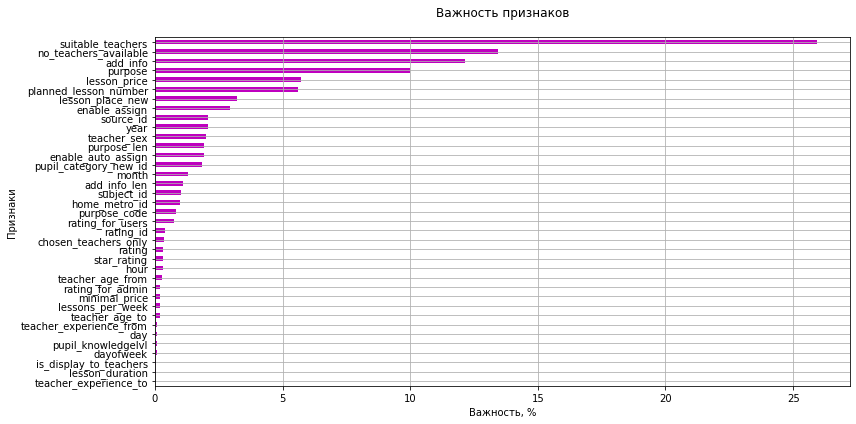

In [231]:
cb_imp = pd.Series(
    cb_search.best_estimator_[-1].get_feature_importance(),
    index = features_train.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(12,6))
cb_imp.plot.barh(ax=ax, color = 'm')
ax.set_title("Важность признаков\n")
ax.set_xlabel('Важность, %')
ax.set_ylabel('Признаки')
fig.tight_layout()
ax.grid(True)

In [232]:
important_features = cb_imp.sort_values(ascending = False).head(16)
display(important_features)
important_features = important_features.index
important_features

suitable_teachers        25.916046
no_teachers_available    13.439819
add_info                 12.143295
purpose                   9.997596
lesson_price              5.714302
planned_lesson_number     5.602240
lesson_place_new          3.214193
enable_assign             2.935708
source_id                 2.068836
year                      2.066214
teacher_sex               2.011501
purpose_len               1.934687
enable_auto_assign        1.914194
pupil_category_new_id     1.846634
month                     1.303832
add_info_len              1.105615
dtype: float64

Index(['suitable_teachers', 'no_teachers_available', 'add_info', 'purpose',
       'lesson_price', 'planned_lesson_number', 'lesson_place_new',
       'enable_assign', 'source_id', 'year', 'teacher_sex', 'purpose_len',
       'enable_auto_assign', 'pupil_category_new_id', 'month', 'add_info_len'],
      dtype='object')

- анализ важности признаков демонстрирует, что **наиболее значимый** признак - это признак количества учителей, подходящих для заявки `suitable_teachers `
- на **втором** месте находится признак `no_teachers_available`, затем текстовый признак `add_info`, затем идут текстовый признак `purpose`, `lesson_price` и `planned_lesson_number`

## Протестируем модель `CatBoostClassifier`

### Проверим значение метрики `AUC-ROC` на тестовой выборке, содержащей не обработанные данные

#### Создадим тестовую выборку из сырых данных

In [233]:
features_test = preprocessing(test_data)

In [234]:
features_test, target_test = features_creation(features_test, teacher_train_payability, 
                         suitable_teachers, teachers_info)

In [235]:
display(features_test.shape)
print(sorted(features_test.columns))
print(target_test.value_counts())

(153729, 37)

['add_info', 'add_info_len', 'chosen_teachers_only', 'day', 'dayofweek', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lesson_price', 'lessons_per_week', 'minimal_price', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose', 'purpose_code', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'source_id', 'star_rating', 'subject_id', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year']
0    128022
1     25707
Name: payment, dtype: int64


In [236]:
interval_cols, categorical_cols, text_cols = interval_categorical_text(features_train)


interval_cols
 ['add_info_len', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'lesson_price', 'minimal_price', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'star_rating', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to']

categorical_cols
 ['chosen_teachers_only', 'day', 'dayofweek', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lessons_per_week', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose_code', 'source_id', 'subject_id', 'teacher_sex', 'year']

text_cols
 ['add_info', 'purpose']


In [237]:
features_test[categorical_cols] = features_test[categorical_cols].astype('int64')

In [238]:
features_test.tail(3)

add_info  \
153726  Район: Ленинский район.\nМесто проведения занятий: у преподавателя.\nПредполагаемое число занятий в неделю: 1-2.\nОпыт репетитора: не имеет значения.\nВозраст репетитора: не имеет значения.\nПол репетитора: женский.\nСтатус репетитора: не имеет значения.\nЖелаемое время для занятий: вторник - 13.   
153727                                                            Желаемое время для занятий: понедельник - в любое время.\nКоличество занятий в неделю: больше 3.\nОпыт репетитора: без опыта.\nВозраст репетитора: от 16 лет до 90 лет.\nПол репетитора: Не важно.\nСтатус репетитора: частный преподаватель.\n   
153728                                         Желаемое время для занятий: понедельник - 15, 16, 17, 18, 19; вторник - 17, 18, 19; среда - 15, 16, 17, 18, 19; четверг - 17, 18, 19; пятница - 15, 16, 17, 18, 19.\nКоличество занятий в неделю: 1-2.\nВозраст репетитора: не важно.\nПол репетитора: Не важно.\n   

        chosen_teachers_only  home_metro_id  is_display_to_teachers  \
153726                     0           2262                       1   
153727                     0           1012                       1   
153728                     0           2276                       1   

        lesson_duration  lesson_place_new  lesson_price  lessons_per_week  \
153726               60                 2          1500                 3   
153727               60                 6           900                 7   
153728               60                 2           900                 3   

        minimal_price  no_teachers_available  planned_lesson_number  \
153726              0                      0                     10   
153727              0                      0                     10   
153728              0                      1                     10   

        pupil_category_new_id  pupil_knowledgelvl  \
153726                     15                   0   
153727                     12                   0   
153728                     10                   0   

                                                                                                                                                            purpose  \
153726                                                                                                 Категория ученика: взрослый.\nЦель занятий: поставить звуки.   
153727  Дополнения: ЕГЭ.\nКатегория ученика: 11 класс.\nПредполагаемая дата экзамена: 2024-06-30.\nЖелаемый балл на экзамене: 100.\nТекущий балл на экзамене: 80.\n   
153728                                                                                                            Разделы: черчение.\nКатегория ученика: 9 класс.\n   

        source_id  subject_id  teacher_age_from  teacher_age_to  \
153726         23          20                16              16   
153727         18           1                16              90   
153728         23          21                16              16   

        teacher_experience_from  teacher_experience_to  teacher_sex  \
153726                        0                      0            2   
153727                        0                      0            0   
153728                        0                      0            3   

        purpose_len  add_info_len  purpose_code  year  month  day  dayofweek  \
153726           59           290             0  2023     11    5          6   
153727          150           233             1  2023     11    5          6   
153728           47           254             0  2023     11    5          6   

        hour  enable_assign  enable_auto_assign  rating  rating_for_admin  \
153726    23            0.0                 0.0    0.00               0.0   
153727    23            0.0                 0.0    0.15               0.0   
153728    23            0.0                 0.0    0.00               0.0   

        rating_for_users  rating_id  star_rating  suitable_teachers  
153726               0.0       0.00      0.00

In [239]:
display(features_test.shape)
print(sorted(features_test.columns))
display(target_test.shape)

(153729, 37)

['add_info', 'add_info_len', 'chosen_teachers_only', 'day', 'dayofweek', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lesson_price', 'lessons_per_week', 'minimal_price', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose', 'purpose_code', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'source_id', 'star_rating', 'subject_id', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year']


(153729,)

In [240]:
target_test.value_counts()

0    128022
1     25707
Name: payment, dtype: int64

#### Загрузим с диска сохраненную лучшую модель

In [241]:
# load
cb_search = joblib.load("cb_model.pkl")

In [242]:
cb_search.best_estimator_.fit(
    features_train, target_train)

cb_predictions_test = cb_search.best_estimator_.predict(
    features_test)

cb_proba_one_test = cb_search.best_estimator_.predict_proba(
    features_test)[:, 1]

Learning rate set to 0.140573
0:	learn: 0.6542763	total: 1.11s	remaining: 18m 33s
1:	learn: 0.6187059	total: 2.34s	remaining: 19m 26s
2:	learn: 0.5958199	total: 3.36s	remaining: 18m 36s
3:	learn: 0.5781379	total: 4.68s	remaining: 19m 26s
4:	learn: 0.5662981	total: 5.82s	remaining: 19m 17s
5:	learn: 0.5568168	total: 7.2s	remaining: 19m 53s
6:	learn: 0.5510363	total: 8.44s	remaining: 19m 57s
7:	learn: 0.5475794	total: 9.49s	remaining: 19m 37s
8:	learn: 0.5437983	total: 10.7s	remaining: 19m 41s
9:	learn: 0.5419602	total: 11.9s	remaining: 19m 40s
10:	learn: 0.5392462	total: 13.1s	remaining: 19m 34s
11:	learn: 0.5376827	total: 14.2s	remaining: 19m 31s
12:	learn: 0.5357549	total: 15.5s	remaining: 19m 39s
13:	learn: 0.5343917	total: 16.6s	remaining: 19m 29s
14:	learn: 0.5330896	total: 17.8s	remaining: 19m 27s
15:	learn: 0.5307879	total: 19.2s	remaining: 19m 39s
16:	learn: 0.5297314	total: 20.3s	remaining: 19m 31s
17:	learn: 0.5286902	total: 21.7s	remaining: 19m 45s
18:	learn: 0.5268583	total:

153:	learn: 0.5038184	total: 2m 27s	remaining: 13m 28s
154:	learn: 0.5037287	total: 2m 28s	remaining: 13m 27s
155:	learn: 0.5035297	total: 2m 29s	remaining: 13m 27s
156:	learn: 0.5034568	total: 2m 30s	remaining: 13m 26s
157:	learn: 0.5033940	total: 2m 30s	remaining: 13m 24s
158:	learn: 0.5033339	total: 2m 31s	remaining: 13m 22s
159:	learn: 0.5032561	total: 2m 32s	remaining: 13m 22s
160:	learn: 0.5032053	total: 2m 33s	remaining: 13m 19s
161:	learn: 0.5031428	total: 2m 34s	remaining: 13m 18s
162:	learn: 0.5030166	total: 2m 35s	remaining: 13m 17s
163:	learn: 0.5029474	total: 2m 36s	remaining: 13m 16s
164:	learn: 0.5028691	total: 2m 37s	remaining: 13m 15s
165:	learn: 0.5027923	total: 2m 38s	remaining: 13m 15s
166:	learn: 0.5027439	total: 2m 38s	remaining: 13m 12s
167:	learn: 0.5026642	total: 2m 39s	remaining: 13m 11s
168:	learn: 0.5026034	total: 2m 40s	remaining: 13m 10s
169:	learn: 0.5025315	total: 2m 41s	remaining: 13m 10s
170:	learn: 0.5024804	total: 2m 42s	remaining: 13m 8s
171:	learn:

304:	learn: 0.4951175	total: 4m 34s	remaining: 10m 25s
305:	learn: 0.4950778	total: 4m 34s	remaining: 10m 23s
306:	learn: 0.4950241	total: 4m 35s	remaining: 10m 22s
307:	learn: 0.4949746	total: 4m 36s	remaining: 10m 21s
308:	learn: 0.4949263	total: 4m 37s	remaining: 10m 20s
309:	learn: 0.4948767	total: 4m 38s	remaining: 10m 19s
310:	learn: 0.4948164	total: 4m 39s	remaining: 10m 19s
311:	learn: 0.4947677	total: 4m 40s	remaining: 10m 18s
312:	learn: 0.4947127	total: 4m 41s	remaining: 10m 17s
313:	learn: 0.4946684	total: 4m 41s	remaining: 10m 15s
314:	learn: 0.4946238	total: 4m 42s	remaining: 10m 14s
315:	learn: 0.4945775	total: 4m 43s	remaining: 10m 13s
316:	learn: 0.4945488	total: 4m 44s	remaining: 10m 12s
317:	learn: 0.4944879	total: 4m 45s	remaining: 10m 11s
318:	learn: 0.4944607	total: 4m 45s	remaining: 10m 10s
319:	learn: 0.4944278	total: 4m 46s	remaining: 10m 9s
320:	learn: 0.4943817	total: 4m 47s	remaining: 10m 8s
321:	learn: 0.4943355	total: 4m 48s	remaining: 10m 7s
322:	learn: 0

457:	learn: 0.4886995	total: 6m 41s	remaining: 7m 54s
458:	learn: 0.4886612	total: 6m 41s	remaining: 7m 53s
459:	learn: 0.4886235	total: 6m 42s	remaining: 7m 52s
460:	learn: 0.4885833	total: 6m 43s	remaining: 7m 51s
461:	learn: 0.4885398	total: 6m 44s	remaining: 7m 50s
462:	learn: 0.4884967	total: 6m 44s	remaining: 7m 49s
463:	learn: 0.4884476	total: 6m 45s	remaining: 7m 48s
464:	learn: 0.4884104	total: 6m 46s	remaining: 7m 47s
465:	learn: 0.4883603	total: 6m 47s	remaining: 7m 47s
466:	learn: 0.4883267	total: 6m 48s	remaining: 7m 46s
467:	learn: 0.4882549	total: 6m 49s	remaining: 7m 45s
468:	learn: 0.4882239	total: 6m 50s	remaining: 7m 44s
469:	learn: 0.4881747	total: 6m 51s	remaining: 7m 43s
470:	learn: 0.4881412	total: 6m 51s	remaining: 7m 42s
471:	learn: 0.4881137	total: 6m 52s	remaining: 7m 41s
472:	learn: 0.4880927	total: 6m 53s	remaining: 7m 40s
473:	learn: 0.4880378	total: 6m 54s	remaining: 7m 39s
474:	learn: 0.4879834	total: 6m 55s	remaining: 7m 38s
475:	learn: 0.4879372	total:

610:	learn: 0.4826220	total: 8m 52s	remaining: 5m 39s
611:	learn: 0.4825876	total: 8m 53s	remaining: 5m 38s
612:	learn: 0.4825523	total: 8m 54s	remaining: 5m 37s
613:	learn: 0.4825320	total: 8m 55s	remaining: 5m 36s
614:	learn: 0.4825108	total: 8m 56s	remaining: 5m 35s
615:	learn: 0.4824605	total: 8m 57s	remaining: 5m 35s
616:	learn: 0.4824318	total: 8m 58s	remaining: 5m 34s
617:	learn: 0.4824008	total: 8m 59s	remaining: 5m 33s
618:	learn: 0.4823668	total: 8m 59s	remaining: 5m 32s
619:	learn: 0.4823286	total: 9m	remaining: 5m 31s
620:	learn: 0.4822925	total: 9m 1s	remaining: 5m 30s
621:	learn: 0.4822614	total: 9m 2s	remaining: 5m 29s
622:	learn: 0.4822266	total: 9m 2s	remaining: 5m 28s
623:	learn: 0.4822151	total: 9m 3s	remaining: 5m 27s
624:	learn: 0.4821731	total: 9m 4s	remaining: 5m 26s
625:	learn: 0.4821289	total: 9m 5s	remaining: 5m 25s
626:	learn: 0.4820988	total: 9m 6s	remaining: 5m 24s
627:	learn: 0.4820420	total: 9m 7s	remaining: 5m 24s
628:	learn: 0.4820004	total: 9m 8s	remai

762:	learn: 0.4771689	total: 11m 1s	remaining: 3m 25s
763:	learn: 0.4771297	total: 11m 2s	remaining: 3m 24s
764:	learn: 0.4770936	total: 11m 3s	remaining: 3m 23s
765:	learn: 0.4770578	total: 11m 4s	remaining: 3m 22s
766:	learn: 0.4770195	total: 11m 4s	remaining: 3m 21s
767:	learn: 0.4770069	total: 11m 5s	remaining: 3m 21s
768:	learn: 0.4769593	total: 11m 7s	remaining: 3m 20s
769:	learn: 0.4769271	total: 11m 7s	remaining: 3m 19s
770:	learn: 0.4768932	total: 11m 8s	remaining: 3m 18s
771:	learn: 0.4768526	total: 11m 9s	remaining: 3m 17s
772:	learn: 0.4768182	total: 11m 10s	remaining: 3m 16s
773:	learn: 0.4768034	total: 11m 11s	remaining: 3m 16s
774:	learn: 0.4767684	total: 11m 12s	remaining: 3m 15s
775:	learn: 0.4767538	total: 11m 13s	remaining: 3m 14s
776:	learn: 0.4767172	total: 11m 13s	remaining: 3m 13s
777:	learn: 0.4766790	total: 11m 14s	remaining: 3m 12s
778:	learn: 0.4766393	total: 11m 15s	remaining: 3m 11s
779:	learn: 0.4766170	total: 11m 16s	remaining: 3m 10s
780:	learn: 0.476576

913:	learn: 0.4721178	total: 13m 9s	remaining: 1m 14s
914:	learn: 0.4720837	total: 13m 9s	remaining: 1m 13s
915:	learn: 0.4720536	total: 13m 10s	remaining: 1m 12s
916:	learn: 0.4720265	total: 13m 11s	remaining: 1m 11s
917:	learn: 0.4719898	total: 13m 11s	remaining: 1m 10s
918:	learn: 0.4719540	total: 13m 12s	remaining: 1m 9s
919:	learn: 0.4719167	total: 13m 13s	remaining: 1m 9s
920:	learn: 0.4718813	total: 13m 14s	remaining: 1m 8s
921:	learn: 0.4718480	total: 13m 15s	remaining: 1m 7s
922:	learn: 0.4718127	total: 13m 15s	remaining: 1m 6s
923:	learn: 0.4717717	total: 13m 16s	remaining: 1m 5s
924:	learn: 0.4717586	total: 13m 17s	remaining: 1m 4s
925:	learn: 0.4717214	total: 13m 18s	remaining: 1m 3s
926:	learn: 0.4716842	total: 13m 19s	remaining: 1m 2s
927:	learn: 0.4716454	total: 13m 19s	remaining: 1m 2s
928:	learn: 0.4716164	total: 13m 20s	remaining: 1m 1s
929:	learn: 0.4715705	total: 13m 21s	remaining: 1m
930:	learn: 0.4715366	total: 13m 22s	remaining: 59.5s
931:	learn: 0.4714966	total:

#### Изучим диаграмму ROC - кривой

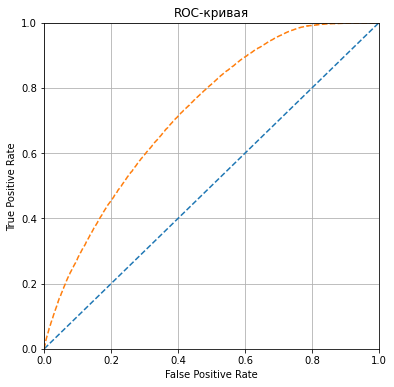


Значение метрики ROC-AUC на обучающей выборке = 0.7901:

Значение метрики ROC-AUC на тестовой выборке = 0.7232:

Значение метрики F1_macro на тестовой выборке = 0.5746


In [243]:
fpr, tpr, thresholds = roc_curve(target_test,
                                 cb_proba_one_test)


plt.figure(figsize = (6, 6))

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# ROC - кривая лучшей модели cb
plt.plot(fpr, tpr, linestyle='--')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()
roc_auc_test = roc_auc_score(target_test,
            cb_proba_one_test)
test_f1_score = f1_score(target_test, cb_predictions_test, average = 'macro')


print("\nЗначение метрики ROC-AUC на обучающей выборке = %0.4f:" % cb_search.best_score_)
print("\nЗначение метрики ROC-AUC на тестовой выборке = %0.4f:" % roc_auc_test)

print("\nЗначение метрики F1_macro на тестовой выборке = %0.4f" % test_f1_score)

###  Проверим модель на адекватность с помощью `DummyClassifier` на метрике `accuracy`

In [244]:
dummy_model = DummyClassifier() #strategy = 'most_frequent')
dummy_model.fit(features_train, target_train)
dummy_predict = dummy_model.predict(features_test)

acc_dummy = f1_score(target_test, dummy_predict, average = 'macro')
acc_cb = f1_score(target_test, cb_predictions_test, average = 'macro')

print("Метрика F1 macro фиктивной модели: %0.2f" % acc_dummy)
print("Метрика F1 macro модели CatBoostClassifier: %0.2f" % acc_cb)

Метрика F1 macro фиктивной модели: 0.45
Метрика F1 macro модели CatBoostClassifier: 0.57


- метрика `F1_macro` модели `CatBoostClassifier` на **12** пунктов лучше метрики фиктивной модели, которая всегда предсказывает наиболее частый класс
- выбранная модель **адекватна**

### Изучим метрики модели по результатам тестирования

#### Изучим матрицу ошибок и другие метрики

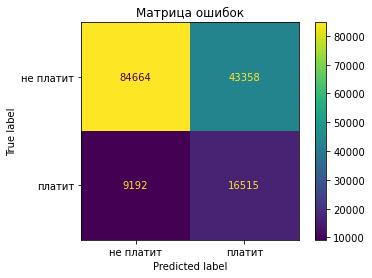

              precision    recall  f1-score   support

   не платит       0.90      0.66      0.76    128022
      платит       0.28      0.64      0.39     25707

    accuracy                           0.66    153729
   macro avg       0.59      0.65      0.57    153729
weighted avg       0.80      0.66      0.70    153729



In [245]:
cm = confusion_matrix(target_test, cb_predictions_test,
                      labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['не платит','платит']) 
disp.plot()
plt.title('Матрица ошибок')
plt.show()
print(classification_report(target_test,
                        cb_predictions_test, target_names = ['не платит','платит']))

- модель правильно определила **16396** заявок, которые будут оплачены и неверно классифицировала как не оплаченные **9311** заявок
- модель правильно определила **85235** тысяч заявок, которые **не будут** оплачены, и неверно определила **42787** не оплаченных заявок, как оплаченые

- безошибочность прогнозирования `accuracy` на тестовой выборке составляет **66%**
- при этом точность предсказания `precision` не оплаченных заявок составляет **90%** при правильном предсказании **67%** значений данного класса выборки
- точность предсказания `precision` оплаченных заявок составляет **28%** при правильном предсказании **64%** значений данного класса выборки

- модель демонстрирует **плохую** точность предсказаний `precision` для положительного класса и **хорошую** - для нулевого, при этом модель демонстрирует удовлетворительный охват выборки при предсказании как положительного, так и нулевого класса

Модель может быть использована как **вспомогательная** при принятии решения о подключении консультантов к обработке заявки

### Выводы по результатам тестирования модели `CatBoostClassifier`

- модель `CatBoostClassifier` на **тестовой** выборке показала значение метрики `AUC_ROC` = **0.72**, что сопоставимо со значением, полученным в ходе кросс-валидации **(0.79)**, и объясняется не стратифицированным, а хронологическим выделением тестовой выборки

- метрика `F1_macro` модели `CatBoostClassifier` на **12** пунктов превосходит метрику фиктивной модели, которая всегда предсказывает наиболее частый (нулевой) класс
- выбранная модель **адекватна**

- ROC-кривая плавная, стремится к левому верхнему углу, то есть к максимальному значению **True Positive Rate** при минимальном значении **False Positive Rate**, модель превосходит случайную модель, но значение метрики среднее

- модель `CatBoostClassifier` с гиперпараметрами:
    - `auto_class_weights`: 'Balanced'

    может быть **рекомендована** как **вспомогательный** инструмент при прогнозировании целесообразности подключения консультантов для увеличения конверсии оплаты заявок на обучение

## Отчет

### Описание задачи

Сервис **Repetit.ru** работает с большим количеством заявок от клиентов с данными о предмете, желаемой стоимости, возрасте ученика, целью занятий и тд. К сожалению, 7 из 8 не доходят до оплаты, при этом обработка заявки консультантом увеличивает конверсию в оплату на 30%.
Проблема в том, что консультантов не хватает на все заявки и получается, что чем больше заявок — тем меньше конверсия из заявки в оплату и консультанты тратят время на бесперспективные заявки.

**Задача:**

- Разработать модель, которая по имеющейся информации о клиенте и заявке будет предсказывать вероятность оплаты заявки клиентом. Заказчик хочет понять, какие заявки будут оплачены, а какие нет, чтобы одни обрабатывать вручную консультантами, а другие нет.

**Метрика:**

- Оценка качества модели производится с использованием `precision` и `ROC-AUC`.

### Предварительная обработка данных

В основном датасете `data`, содержащем информацию о заявках:
- исправлен `индекс`
- **удалены** столбцы `additional_status_id`, `amount_to_pay`, `client_id`, `estimated_fee`, `first_lesson_date`, `payment_date`, `start_date`, `comments` `creator_id`, `prefered_teacher_id` с данными, ведущими к утечке целевого признака, либо не нужными для моделирования
-  **удалены** строки с ошибочными данными
- формат столбца с датами **приведены** к `datetime`
- значения возраста **приведены** к диапазону от 16 до 90 лет
- числовые данные **приведены** к `целочисленному` типу
- **cоздан** столбец с **целевым** признаком `payment`, в котором 1 означает, что оплата произведена, и **удален** столбец `status_id`, из которого был сформирован целевой признак

- из датасета `suitable_teachers` **удалены** столбец `contact_result` и полные дубликаты

- удалены полные дубликаты из датасета `prefered_teachers`

- в датасете `teachers_info` оставлены только столбцы с рейтингами `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `star_rating`

### Конструирование признаков

- создан массив признаков `features_train` и вектор целевого признака `target_train`, в котором:
    - **удалены дубликаты заявок**
    - в случае, если хотя бы один из дубликатов был **оплачен**, первичной заявке присваивается статус `оплачена` (**целевой признак** = 1)
    - созданы новые признаки длины полей `purpose_len` и `add_info_len`, содержащие длину признаков `purpose` и `add_info`
    - создан новый признак цели занятий `purpose_code`, содержащий цель занятий
    - созданы новые признаки `года`, `месяца`, `дня`, `дня недели` и `часа` создания заявки
    - созданы новые признаки `suitable_teachers` (количество подходящих к заявке учителей), `enable_assign` (средняя возможность назначиться), `enable_auto_assign` (средняя возможность автоматического назначения)
    - созданы новые признаки `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `source_id`, `star_rating`, содержащие **средние** рейтинги учителей, подходящих к заявке
    - из массива признаков удалены столбцы `order_date`, `client_id`, `creator_id`, `id`, `original_order_id`, `working_teacher_id` и `payment`, содержащие **утечку целевого признака**

### Исследовательский анализ данных

- имеется **сильный** дисбаланс классов: в векторе **целевого признака**  22% значений единичного класса (оплачено) и 78% нулевых значений (не оплачено), что необходимо учесть при обучении моделей (нужна балансировка)

- **Анализ распределения категориальных признаков в зависимости от целевого признака** показывает практически идентичное распределение значений категориальных признаков в оплаченных и не оплаченных заявках, в поправкой на дисбаланс классов, за исключением признаков `no_teachers_available` - в оплаченных заявках удельный вес нулевого значения признака (есть доступные учителя) значительно превышает удельный вес признака в неоплаченных заявках, а также `planned_lesson_number` - в оплаченных заявках доля количества уроков = 10 значительно больше доли этого количества уроков в неоплаченных заявках

- **Анализ распределения количественных признаков в зависимости от значения целевого признака показывает следующее:**

    - имеются многочисленные выбросы, при использовании линейных моделей нужно будет использовать **RobustScaler**
    
    - в распределении признаков `teacher_age_from`, `teacher_age_to`, `teacher_experience_from`, `teacher_experience_to` **отсутствуют** различия между оплаченными и неоплаченными заявками
    - наиболее заметным различия между оплаченными и неоплаченными заявками в распределениях следующих признаков:
        - `suitable_teachers` - 50% не оплаченных заявок имеют значение этого рейтинга менее 3, в то же время как 75% оплаченных имеет значение рейтинга более 4
        - `star_rating` - половина не оплаченных заявок имеет значение этого рейтинга менее 0.7, в то же время более 75% оплаченных заявок имеет значение этого рейтинга более 1
       - `rating_id` - половина не оплаченных заявок имеет значение этого рейтинга менее 1, при этом 75% оплаченных заявок имеет значение рейтинга более 2
       - `rating for users`- половина не оплаченных заявок имеет значение этого рейтинга менее 2, при этом 75% оплаченных заявок имеет значение рейтинга более 10       

       
- **Можно нарисовать следующий портрет потенциально оплаченной заявки**:
    - `suitable_teachers` более 3
    - `stars_rating` более 1
    - `rating_id` более 1
    - `rating for users` более 2

### Корреляция и мультиколлинеарность

- наблюдается **умеренная корреляция** целевого признака со следующими признаками: `star_rating`, `no_teachers_available`, `lesson_place_new`, `add_info_len`, `purpose_code`,
- наблюдается **слабая корреляция** целевого признака со следующими признаками: `rating_id`, `enable_auto_assign`, `lessons_per_week`, `pupil_category_new_id`, `suitable_teachers`, `lesson_price`, `enable_assign`,   `home_metro_id`, `planned_lesson_number`, `source_id`,  `teacher_sex`,  `teacher_age_from`
- с остальными признаками корреляция **отсутствует**
- наблюдается **сильная мультиколлинеарность** между признаками `rating_for_admin` и `rating_for_users`, что необходимо учесть при обучении в случае использования линейных моделей

### Обучение моделей и сравнение метрик

**Были обучены и проверены методом кросс-валидации две модели: `RandomForestClassifier` и `CatBoostClassifier`**:
- модель `RandomForestClassifier` показала значение метрики `AUC-ROC` = **0.77**, что хуже, чем значение метрики **AUC-ROC = 0.79** модели `CatBoostClassifier`
- модель `CatBoostClassifier` была отобрана для последующего тестирования

### Анализ важности признаков

- анализ важности признаков для модели ` CatBoostClassifier` демонстрирует, что **наиболее значимый** признак - это синтезированный признак `suitable_teachers`



### Тестирование модели `CatBoostClassifier`

- модель `CatBoostClassifier` на **тестовой** выборке показала значение метрики `AUC-ROC` = **0.72**

- метрика `F1_macro` модели `CatBoostClassifier` на **12** пунктов превосходит метрику фиктивной модели, которая всегда предсказывает наиболее частый (нулевой) класс
- выбранная модель **адекватна**

- модель правильно определила **16396** заявок, которые будут оплачены и неверно классифицировала как не оплаченные **9311** заявок
- модель правильно определила **85235** тысяч заявок, которые **не будут** оплачены, и неверно определила **42787** не оплаченных заявок, как оплаченые

- безошибочность прогнозирования `accuracy` на тестовой выборке составляет **66%**
- при этом точность предсказания `precision` не оплаченных заявок составляет **90%** при правильном предсказании **67%** значений данного класса выборки
- точность предсказания `precision` оплаченных заявок составляет **28%** при правильном предсказании **64%** значений данного класса выборки

- модель демонстрирует **плохую** точность предсказаний `precision` для положительного класса и **хорошую** - для нулевого, при этом модель демонстрирует удовлетворительный охват выборки при предсказании как положительного, так и нулевого класса

Модель может быть использована как **вспомогательная** при принятии решения о подключении консультантов к обработке заявки

### Заключение

- модель `CatBoostClassifier` с гиперпараметрами:
    - `auto_class_weights`: 'Balanced'

    может быть **рекомендована** как **вспомогательный** инструмент при прогнозировании целесообразности подключения консультантов для увеличения конверсии оплаты заявок на обучение

### Пути улучшения прогнозирования

- предлагается внимательно изучить отказные заявки, когда ученик отказывается от занятий **после** получения контактов учителей
- предлагается добавить такие заявки в положительный целевой признак и изучить изменение точности прогноза

## Рекомендации

- заказчику при поступлении новых заявок следует в первую очередь обращать внимание на заявки с высоким значением количества учителей, подходящих заявке `suitable_teachers`

**Также заказчику предлагается рассмотреть изменение способа взимания платы, например перейти на абонементную плату  за нахождение учителя на сайте, вместо взимания суммы первого занятия с коэффициентом** так как действующая система оплаты стимулирует учителей договариваться напрямую